<a href="https://colab.research.google.com/github/Pratyushk2003/healthcare/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset to a Pandas DataFrame
df = pd.read_excel('/content/Copy_epileptic_seizures_Responses_New.xlsx')
df.head(5)

CaseNo  PatientAge  Gender            EventDuration  \
0  569502_C        18.0  Female  d. More than 10 minutes   
1  569498_C        26.0    Male           b. 1-5 minutes   
2  546077_C        17.0    Male          c. 5-10 minutes   
3  498260_C        40.0    Male           b. 1-5 minutes   
4  408708_C        17.0  Female           b. 1-5 minutes   

            Stereotypic                     events_occur_time  \
0  a. Yes, all are same            b. Only during wakefulness   
1  a. Yes, all are same            b. Only during wakefulness   
2  a. Yes, all are same  c. Both during wakefulness and sleep   
3  a. Yes, all are same  c. Both during wakefulness and sleep   
4  a. Yes, all are same  c. Both during wakefulness and sleep   

  wandering_headbanging_observation eyes_closed_during_event  \
0                             b. No                   a. Yes   
1                             b. No                   a. Yes   
2                               NaN                    b. No   
3                               NaN                    b. No   
4                               NaN                   a. Yes   

  weeping_before_during_after_episode  \
0                              a. Yes   
1                               b. No   
2                               b. No   
3                               b. No   
4                               b. No   

  patient_fall_suddenly_without_limb_movements  ... fixed_Aura_Premonition  \
0                                        b. No  ...                 a. Yes   
1                                        b. No  ...                  b. No   
2                                        b. No  ...                  b. No   
3                                        b. No  ...                 a. Yes   
4                                        b. No  ...                 a. Yes   

  staring_blankly_chewing_smacking_lips posturing_limbeyehead_deviation  \
0                                 b. No                          a. Yes   
1                                 b. No                           b. No   
2                                 b. No                          a. Yes   
3                                a. Yes                          a. Yes   
4                                a. Yes                           b. No   

  violent_thrashing_movements                               recovery  \
0                       b. No                      a. Gradual/Slowly   
1                       b. No                      a. Gradual/Slowly   
2                       b. No                      a. Gradual/Slowly   
3                       b. No  b. Abrupt/Sudden (less than a minute)   
4                       b. No                      a. Gradual/Slowly   

  bittentongue urine_without_knowledge dislocated_shoulder other_injuries  \
0        a. No                   b. No               b. No          b. No   
1        a. No                   b. No               b. No          b. No   
2        a. No                   b. No               b. No         a. Yes   
3        a. No                   b. No               b. No         a. Yes   
4        a. No                   b. No               b. No          b. No   

          Final_Diagnosis  
0  b. Non epileptic spell  
1    a. Epileptic Seizure  
2    a. Epileptic Seizure  
3    a. Epileptic Seizure  
4    a. Epileptic Seizure  

[5 rows x 27 columns]

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(['wandering_headbanging_observation'], axis=1, inplace=True)


In [4]:
df

PatientAge  Gender            EventDuration  \
0          18.0  Female  d. More than 10 minutes   
1          26.0    Male           b. 1-5 minutes   
2          17.0    Male          c. 5-10 minutes   
3          40.0    Male           b. 1-5 minutes   
4          17.0  Female           b. 1-5 minutes   
..          ...     ...                      ...   
494        33.0    Male           b. 1-5 minutes   
495        30.0    Male           b. 1-5 minutes   
496        22.0    Male           b. 1-5 minutes   
497        44.0    Male           b. 1-5 minutes   
498        20.0    Male           b. 1-5 minutes   

                                          Stereotypic  \
0                                a. Yes, all are same   
1                                a. Yes, all are same   
2                                a. Yes, all are same   
3                                a. Yes, all are same   
4                                a. Yes, all are same   
..                                                ...   
494  b. Two different types (small ones and big ones)   
495  b. Two different types (small ones and big ones)   
496                              a. Yes, all are same   
497  b. Two different types (small ones and big ones)   
498                              a. Yes, all are same   

                        events_occur_time eyes_closed_during_event  \
0              b. Only during wakefulness                   a. Yes   
1              b. Only during wakefulness                   a. Yes   
2    c. Both during wakefulness and sleep                    b. No   
3    c. Both during wakefulness and sleep                    b. No   
4    c. Both during wakefulness and sleep                   a. Yes   
..                                    ...                      ...   
494  c. Both during wakefulness and sleep                    b. No   
495  c. Both during wakefulness and sleep                    b. No   
496                      a. Only in Sleep                    b. No   
497  c. Both during wakefulness and sleep                    b. No   
498            b. Only during wakefulness                    b. No   

    weeping_before_during_after_episode  \
0                                a. Yes   
1                                 b. No   
2                                 b. No   
3                                 b. No   
4                                 b. No   
..                                  ...   
494                               b. No   
495                               b. No   
496                               b. No   
497                               b. No   
498                               b. No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                          b. No                       a. Yes   
1                                          b. No                        b. No   
2                                          b. No                        b. No   
3                                          b. No                        b. No   
4                                          b. No                        b. No   
..                                           ...                          ...   
494                                        b. No                        b. No   
495                                        b. No                        b. No   
496                                        b. No                        b. No   
497                                        b. No                        b. No   
498                                        b. No                        b. No   

    loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                           b. No  ...                 a. Yes   
1                                           b. No  ...                  b. No   
2                                           b. No  ...                  b. No   
3                                       

In [5]:
import string

def cleanString():
  alphabet = list(string.ascii_lowercase)
  columns = list(df)
  for col in columns:
    for i, j in enumerate(df[col]):
      if type(j)==type('aaaa'):
        if len(j)<3:
          continue
        if j[0] in alphabet and j[1:3]==". ":
          df[col][i]=j[3:]

cleanString()
df.head()

PatientAge  Gender         EventDuration        Stereotypic  \
0        18.0  Female  More than 10 minutes  Yes, all are same   
1        26.0    Male           1-5 minutes  Yes, all are same   
2        17.0    Male          5-10 minutes  Yes, all are same   
3        40.0    Male           1-5 minutes  Yes, all are same   
4        17.0  Female           1-5 minutes  Yes, all are same   

                   events_occur_time eyes_closed_during_event  \
0            Only during wakefulness                      Yes   
1            Only during wakefulness                      Yes   
2  Both during wakefulness and sleep                       No   
3  Both during wakefulness and sleep                       No   
4  Both during wakefulness and sleep                      Yes   

  weeping_before_during_after_episode  \
0                                 Yes   
1                                  No   
2                                  No   
3                                  No   
4                                  No   

  patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                           No                          Yes   
1                                           No                           No   
2                                           No                           No   
3                                           No                           No   
4                                           No                           No   

  loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                            No  ...                    Yes   
1                                            No  ...                     No   
2                                            No  ...                     No   
3                                            No  ...                    Yes   
4                                            No  ...                    Yes   

  staring_blankly_chewing_smacking_lips posturing_limbeyehead_deviation  \
0                                    No                             Yes   
1                                    No                              No   
2                                    No                             Yes   
3                                   Yes                             Yes   
4                                   Yes                              No   

  violent_thrashing_movements                            recovery  \
0                          No                      Gradual/Slowly   
1                          No                      Gradual/Slowly   
2                          No                      Gradual/Slowly   
3                          No  Abrupt/Sudden (less than a minute)   
4                          No                      Gradual/Slowly   

  bittentongue urine_without_knowledge dislocated_shoulder other_injuries  \
0           No                      No                  No             No   
1           No                      No                  No             No   
2           No                      No                  No            Yes   
3           No                      No                  No            Yes   
4           No                      No                  No             No   

       Final_Diagnosis  
0  Non epileptic spell  
1    Epileptic Seizure  
2    Epileptic Seizure  
3    Epileptic Seizure  
4    Epileptic Seizure  

[5 rows x 25 columns]

In [6]:
for i,age in enumerate(df['PatientAge']):


    if type(age)==type('aa'):
        s=""
        s1=""
        #print(age)
        for alpha in age:
          if alpha >='0' and alpha<='9':
            s+=alpha
          elif alpha >='a' and alpha<='z':
            s1+=alpha

        s1=s1.lower()

        if s1=='month' or s1=='months':
          df['PatientAge'][i]=float(s)/12
        else:
           df['PatientAge'][i]=float(s)

In [7]:
df.shape
df.info()
df.describe(include='all')
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   PatientAge                                                         499 non-null    float64
 1   Gender                                                             499 non-null    object 
 2   EventDuration                                                      499 non-null    object 
 3   Stereotypic                                                        499 non-null    object 
 4   events_occur_time                                                  499 non-null    object 
 5   eyes_closed_during_event                                           499 non-null    object 
 6   weeping_before_during_after_episode                                499 non-null    object 
 7   patient_fall_suddenly_with

PatientAge
PatientAge         1.0

In [8]:
df['PatientAge'] = df['PatientAge'].astype(float)

In [9]:
df.isna().sum() #checking for more  missing null values

PatientAge                                                           0
Gender                                                               0
EventDuration                                                        0
Stereotypic                                                          0
events_occur_time                                                    0
eyes_closed_during_event                                             0
weeping_before_during_after_episode                                  0
patient_fall_suddenly_without_limb_movements                         0
Was_patient_hyperventilating                                         0
loss_consciousness_after_urination_defecation                        0
side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing    0
observation_limbjerking                                              0
observe_postevent_stridulous_laboured_breathing                      0
upper_limb_jerks_observation                                         0
briefl

In [10]:
!pip install dython

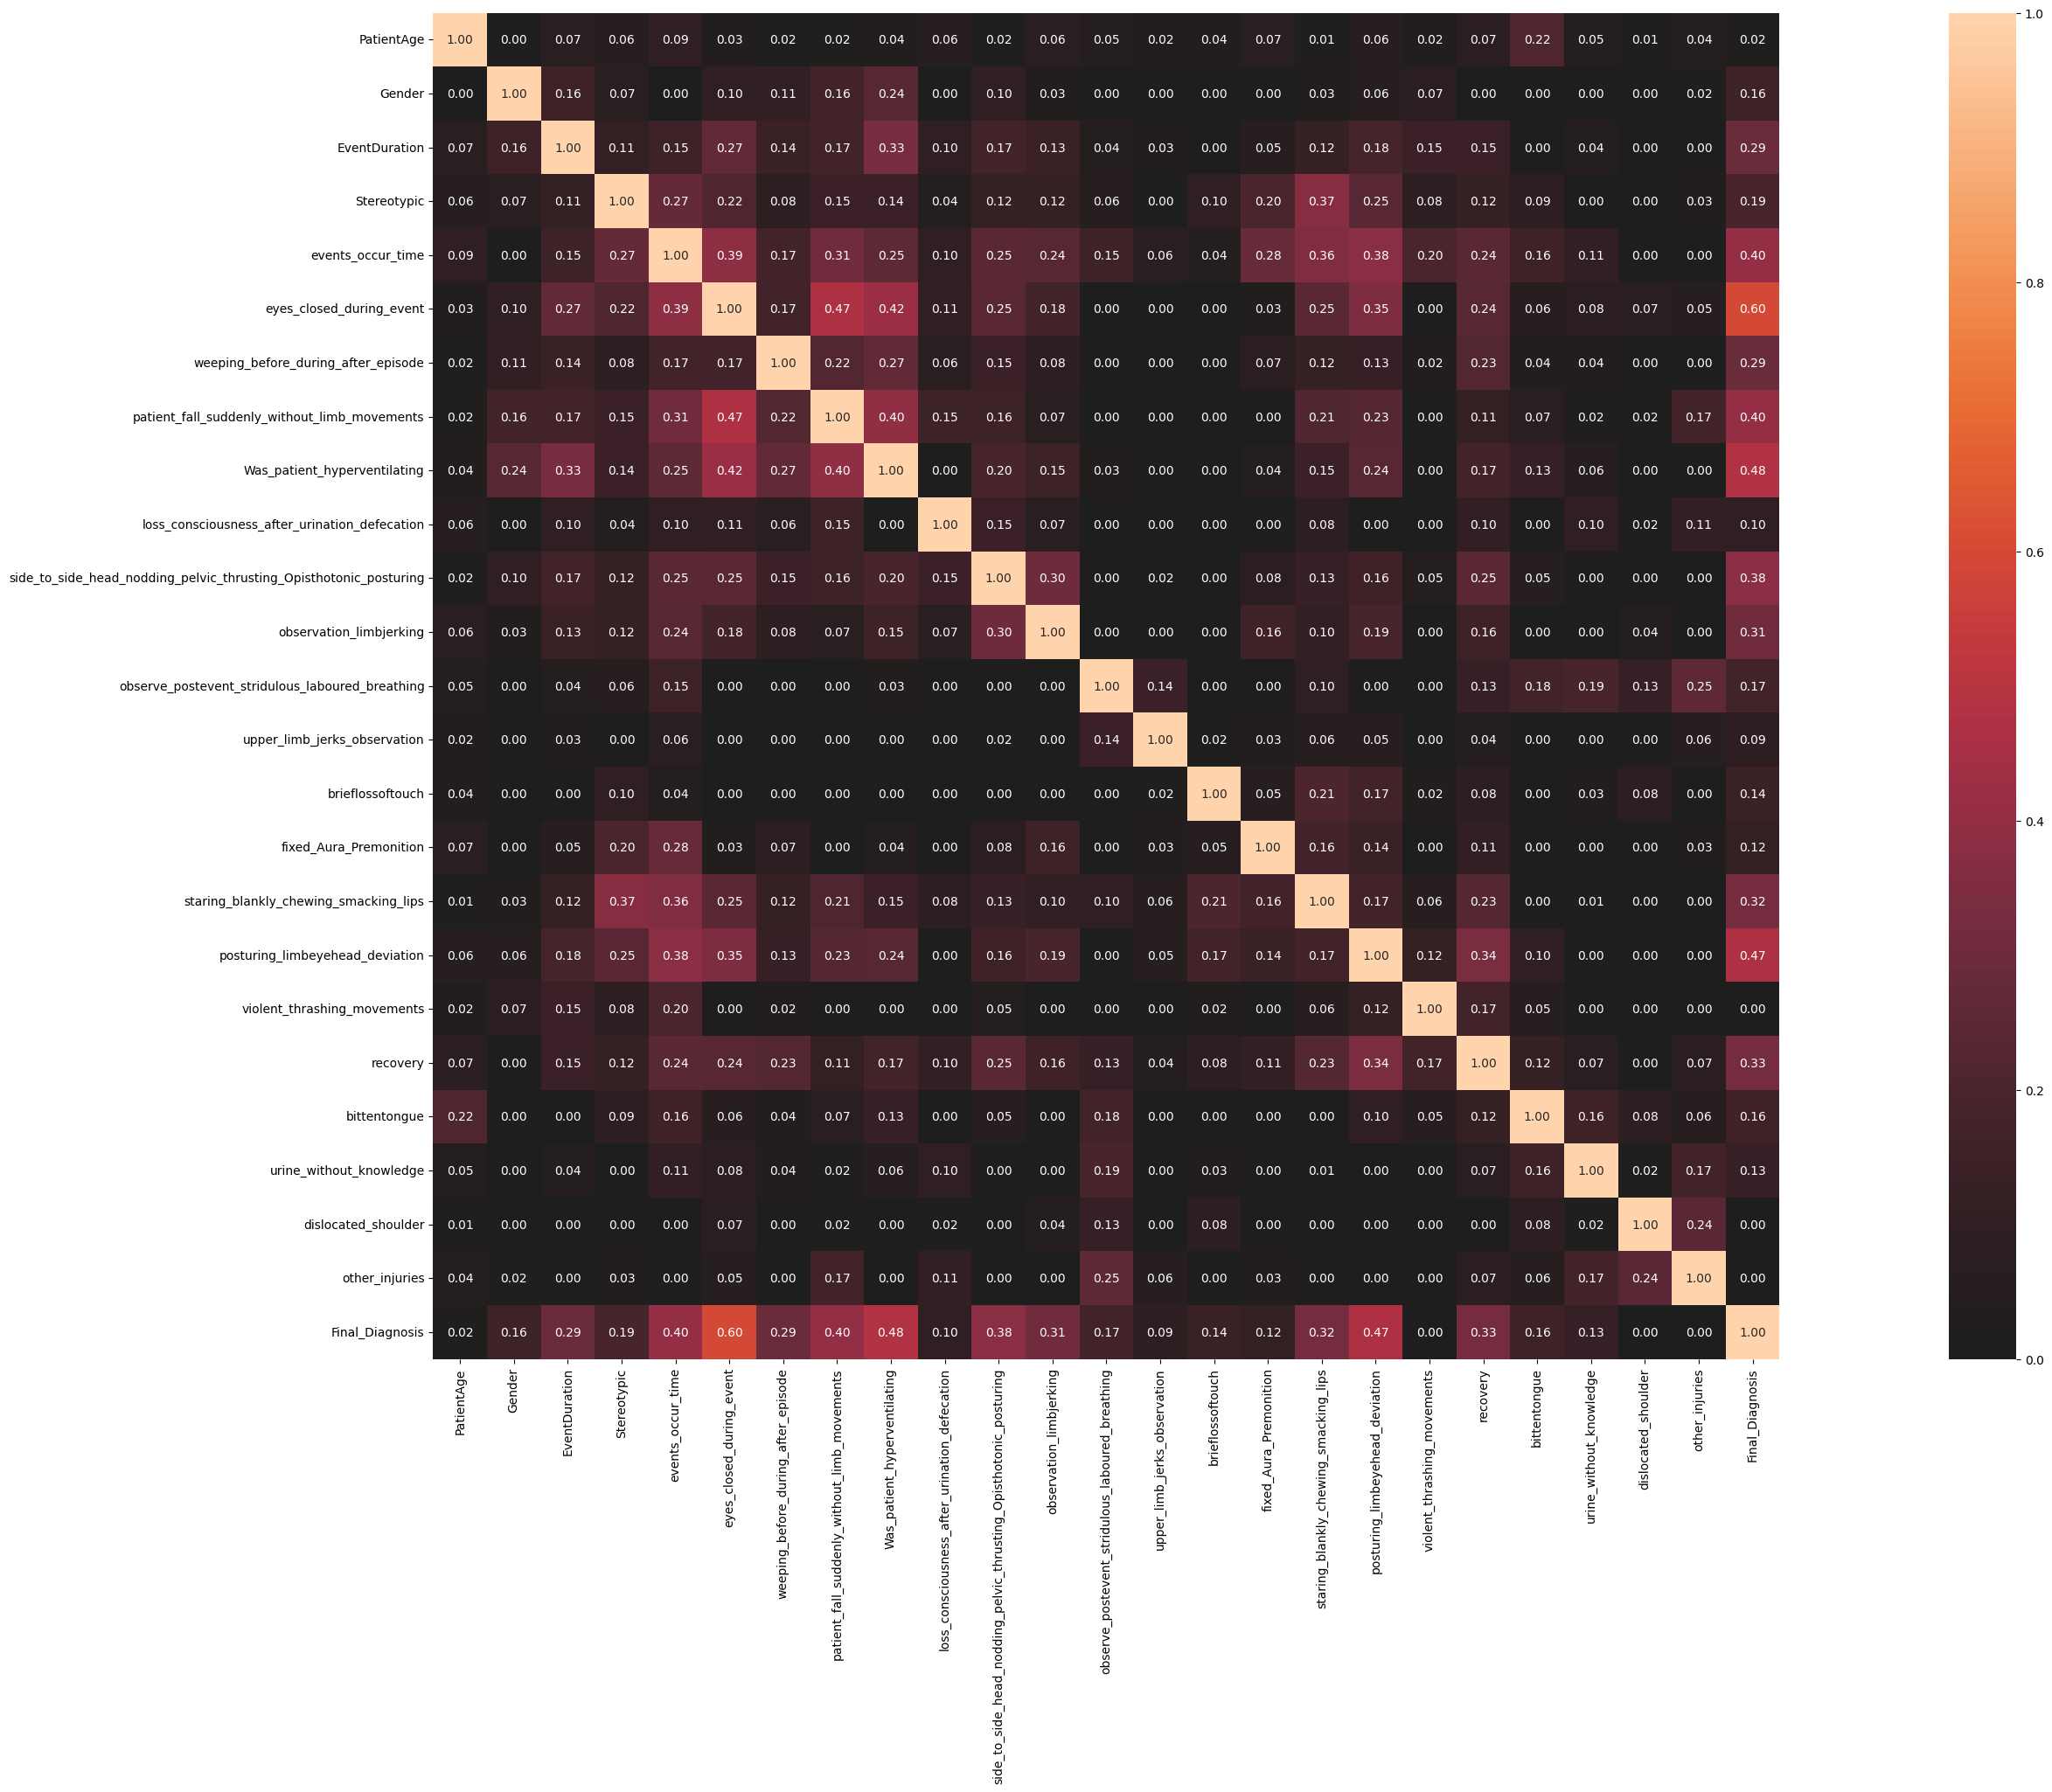

Final_Diagnosis                                                      1.000000
eyes_closed_during_event                                             0.599215
Was_patient_hyperventilating                                         0.482815
posturing_limbeyehead_deviation                                      0.474235
patient_fall_suddenly_without_limb_movements                         0.404282
events_occur_time                                                    0.402523
side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing    0.378964
recovery                                                             0.326129
staring_blankly_chewing_smacking_lips                                0.324035
observation_limbjerking                                              0.310874
EventDuration                                                        0.290785
weeping_before_during_after_episode                                  0.289621
Stereotypic                                                     

In [11]:
from dython.nominal import associations

complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(50,20))
complete_correlation['corr']['Final_Diagnosis'].abs().sort_values(ascending=False)

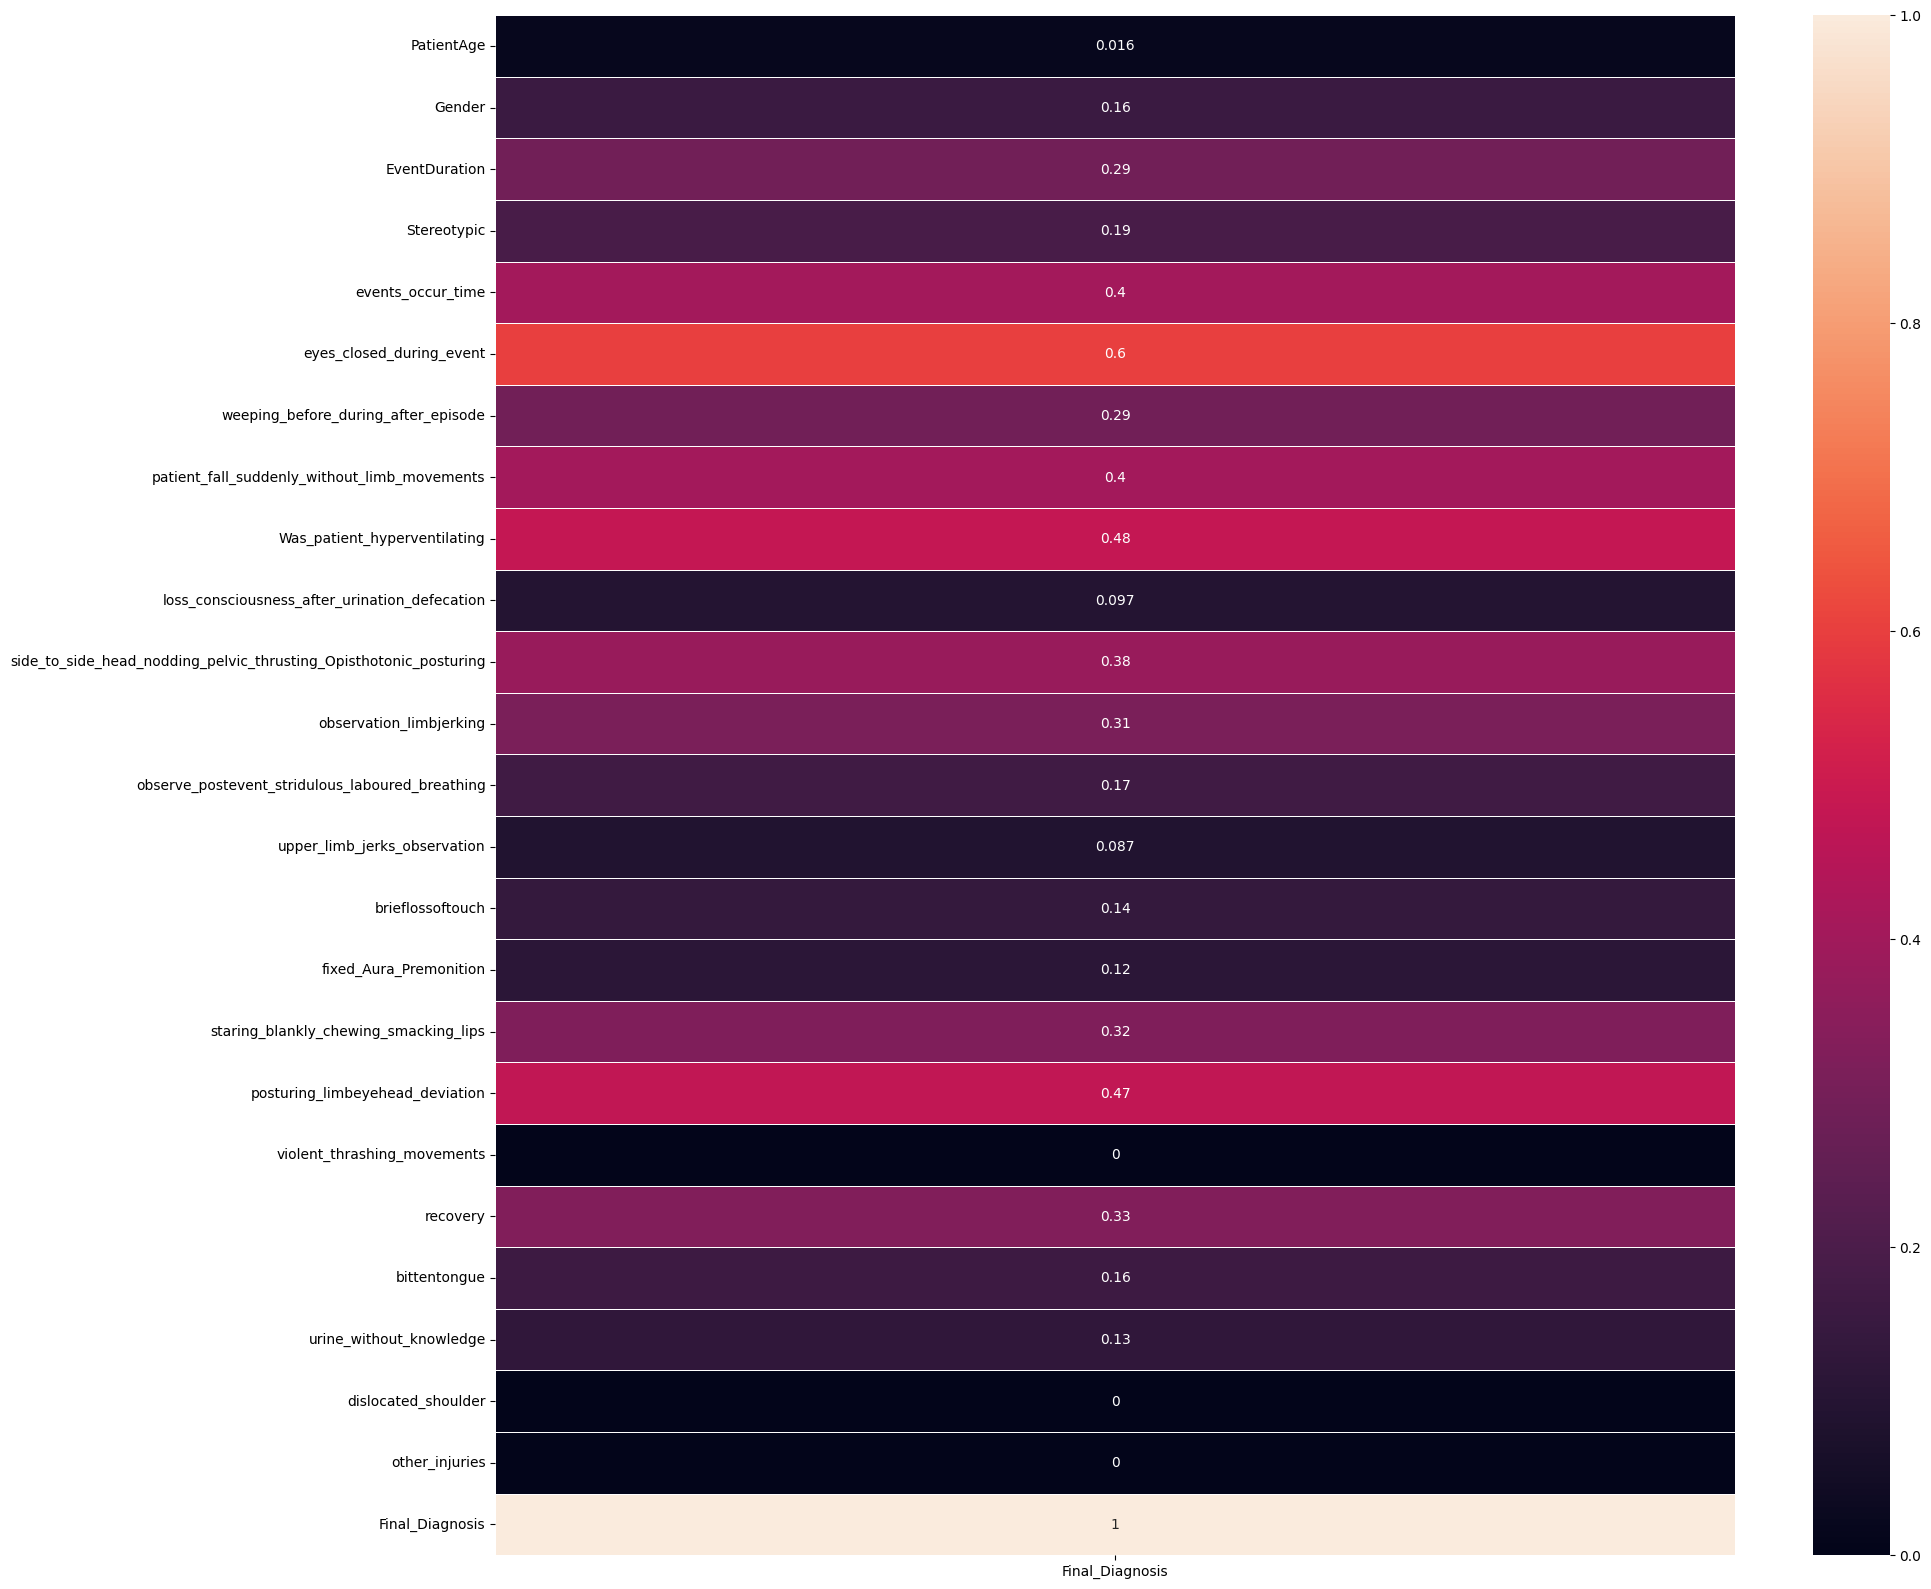

In [12]:
from pprint import pprint
# pprint(c_mat)
# c_mat['corr']

fig, ax = plt.subplots(figsize = (20,20))

columns = list(df)
result_cols = ['Final_Diagnosis']

for col in result_cols:
  columns.remove(col)

sns.heatmap(complete_correlation['corr'][result_cols], annot = True, linewidths = .5, ax = ax)
plt.show()

<Axes: title={'center': 'Final diagnosis'}>

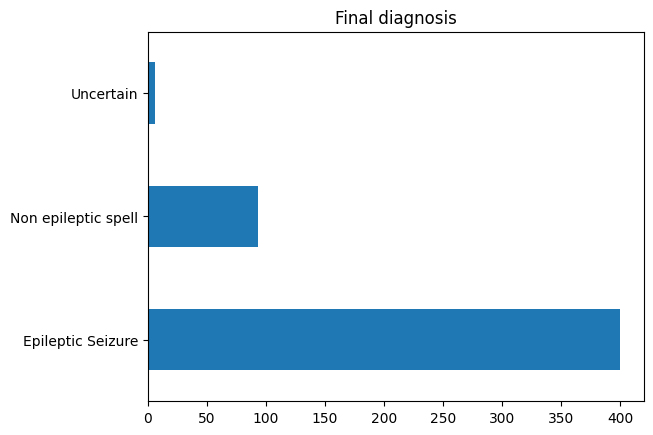

In [13]:
#checking for how many patients were epileptic/ uncertain/not epileptic
df['Final_Diagnosis'].value_counts().plot(kind='barh',title="Final diagnosis")

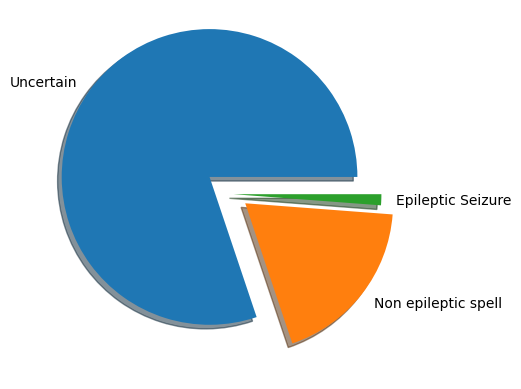

In [14]:
ss = df['Final_Diagnosis'].value_counts()
mylabels = ["Uncertain", "Non epileptic spell","Epileptic Seizure"]
myexplode = [0.2, 0.1, 0]
plt.pie(ss, labels = mylabels, explode = myexplode, shadow = True)

plt.show()

In [15]:
# observation list for the patients having answer yes or No
cols =list(df)

In [ ]:
# results = (df
#     .melt(value_vars=cols)
#     .groupby(['variable', 'value'])
#     .agg({'value': 'count'})
#     .unstack()
#     .reset_index()
#     .droplevel(level=0, axis=1)
#     .assign(total = lambda x: x.sum(axis=1))
# )
# results

<Axes: title={'center': 'Recovery of the patients'}>

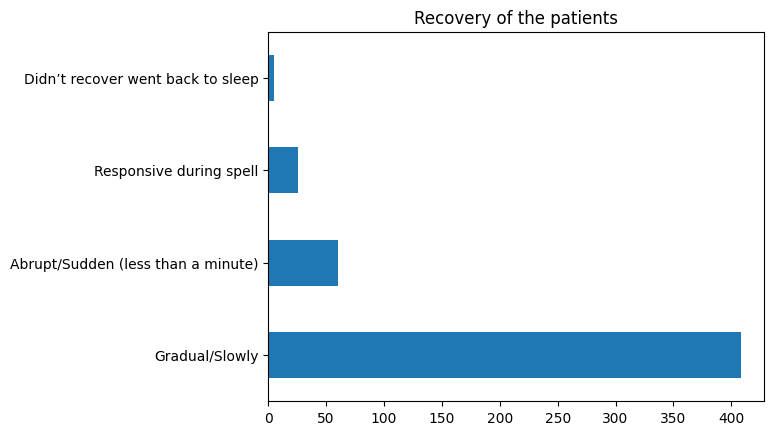

In [16]:
df['recovery'].value_counts().plot(kind='barh',title="Recovery of the patients")

<Axes: title={'center': 'bitter tongue status of the patients'}>

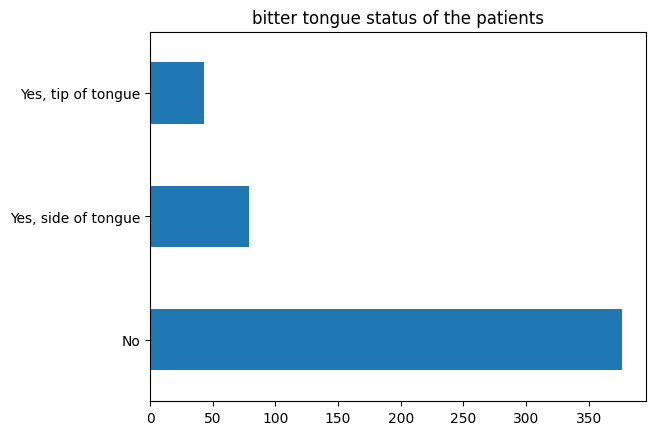

In [17]:
df['bittentongue'].value_counts().plot(kind='barh',title="bitter tongue status of the patients")

<Axes: title={'center': 'eyes closed during occurance of event'}>

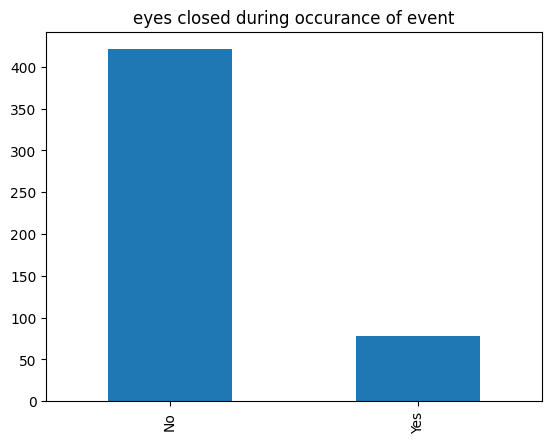

In [18]:
df['eyes_closed_during_event'].value_counts().plot(kind='bar',title="eyes closed during occurance of event")

In [ ]:
#checking for some observation of value yes/no
#df['wandering_headbanging_observation'].value_counts().plot(kind='bar',title="wandering movements or headbanging observation",color = "#4CAF50")


<Axes: title={'center': 'weeping_before_during_after_episode'}>

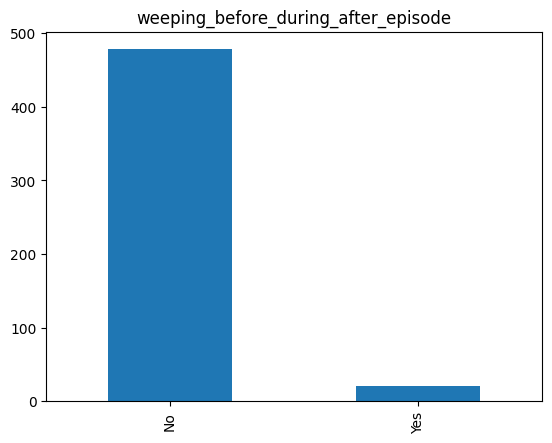

In [19]:
df['weeping_before_during_after_episode'].value_counts().plot(kind='bar',title="weeping_before_during_after_episode")

<Axes: title={'center': 'patient_fall_suddenly_without_limb_movements'}>

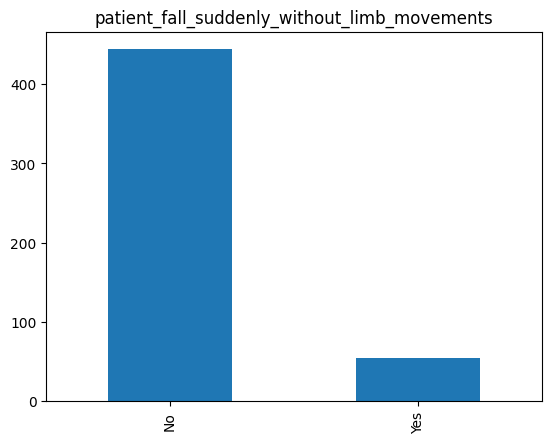

In [20]:
df['patient_fall_suddenly_without_limb_movements'].value_counts().plot(kind='bar',title="patient_fall_suddenly_without_limb_movements")

In [21]:
# # mapping to numerical value
# numeric_mappings = {}

# import string
# columns = list(df)
# columns=columns[1:]
# def replace():

#   for col in columns:
#     rowval=set()
#     for j in df[col]:
#       rowval.add(j)

#     enumval=[i for i in range(len(rowval))]
#     df[col].replace(list(rowval),enumval,inplace =True)
#     ind = 0
#     for rowvals in rowval:
#       numeric_mappings[rowvals] = enumval[ind]
#       ind+=1

# replace()
# df.head()

df.replace(np.nan, 0)
#making a deep copy of DF
#df_copy = df.copy(deep=True)
#df_copy

PatientAge  Gender         EventDuration  \
0          18.0  Female  More than 10 minutes   
1          26.0    Male           1-5 minutes   
2          17.0    Male          5-10 minutes   
3          40.0    Male           1-5 minutes   
4          17.0  Female           1-5 minutes   
..          ...     ...                   ...   
494        33.0    Male           1-5 minutes   
495        30.0    Male           1-5 minutes   
496        22.0    Male           1-5 minutes   
497        44.0    Male           1-5 minutes   
498        20.0    Male           1-5 minutes   

                                       Stereotypic  \
0                                Yes, all are same   
1                                Yes, all are same   
2                                Yes, all are same   
3                                Yes, all are same   
4                                Yes, all are same   
..                                             ...   
494  Two different types (small ones and big ones)   
495  Two different types (small ones and big ones)   
496                              Yes, all are same   
497  Two different types (small ones and big ones)   
498                              Yes, all are same   

                     events_occur_time eyes_closed_during_event  \
0              Only during wakefulness                      Yes   
1              Only during wakefulness                      Yes   
2    Both during wakefulness and sleep                       No   
3    Both during wakefulness and sleep                       No   
4    Both during wakefulness and sleep                      Yes   
..                                 ...                      ...   
494  Both during wakefulness and sleep                       No   
495  Both during wakefulness and sleep                       No   
496                      Only in Sleep                       No   
497  Both during wakefulness and sleep                       No   
498            Only during wakefulness                       No   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
494                                  No   
495                                  No   
496                                  No   
497                                  No   
498                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
494                                           No                           No   
495                                           No                           No   
496                                           No                           No   
497                                           No                           No   
498                                           No                           No   

    loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                              No  ...                    Yes   
1                                              No  ...                     No   
2                                              No  ...                     No   
3                                              No  ...                    Yes   
4                                              No  ...             

In [22]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['Gender',
 'EventDuration',
 'Stereotypic',
 'events_occur_time',
 'eyes_closed_during_event',
 'weeping_before_during_after_episode',
 'patient_fall_suddenly_without_limb_movements',
 'Was_patient_hyperventilating',
 'loss_consciousness_after_urination_defecation',
 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
 'observation_limbjerking',
 'observe_postevent_stridulous_laboured_breathing',
 'upper_limb_jerks_observation',
 'brieflossoftouch',
 'fixed_Aura_Premonition',
 'staring_blankly_chewing_smacking_lips',
 'posturing_limbeyehead_deviation',
 'violent_thrashing_movements',
 'recovery',
 'bittentongue',
 'urine_without_knowledge',
 'dislocated_shoulder',
 'other_injuries',
 'Final_Diagnosis']

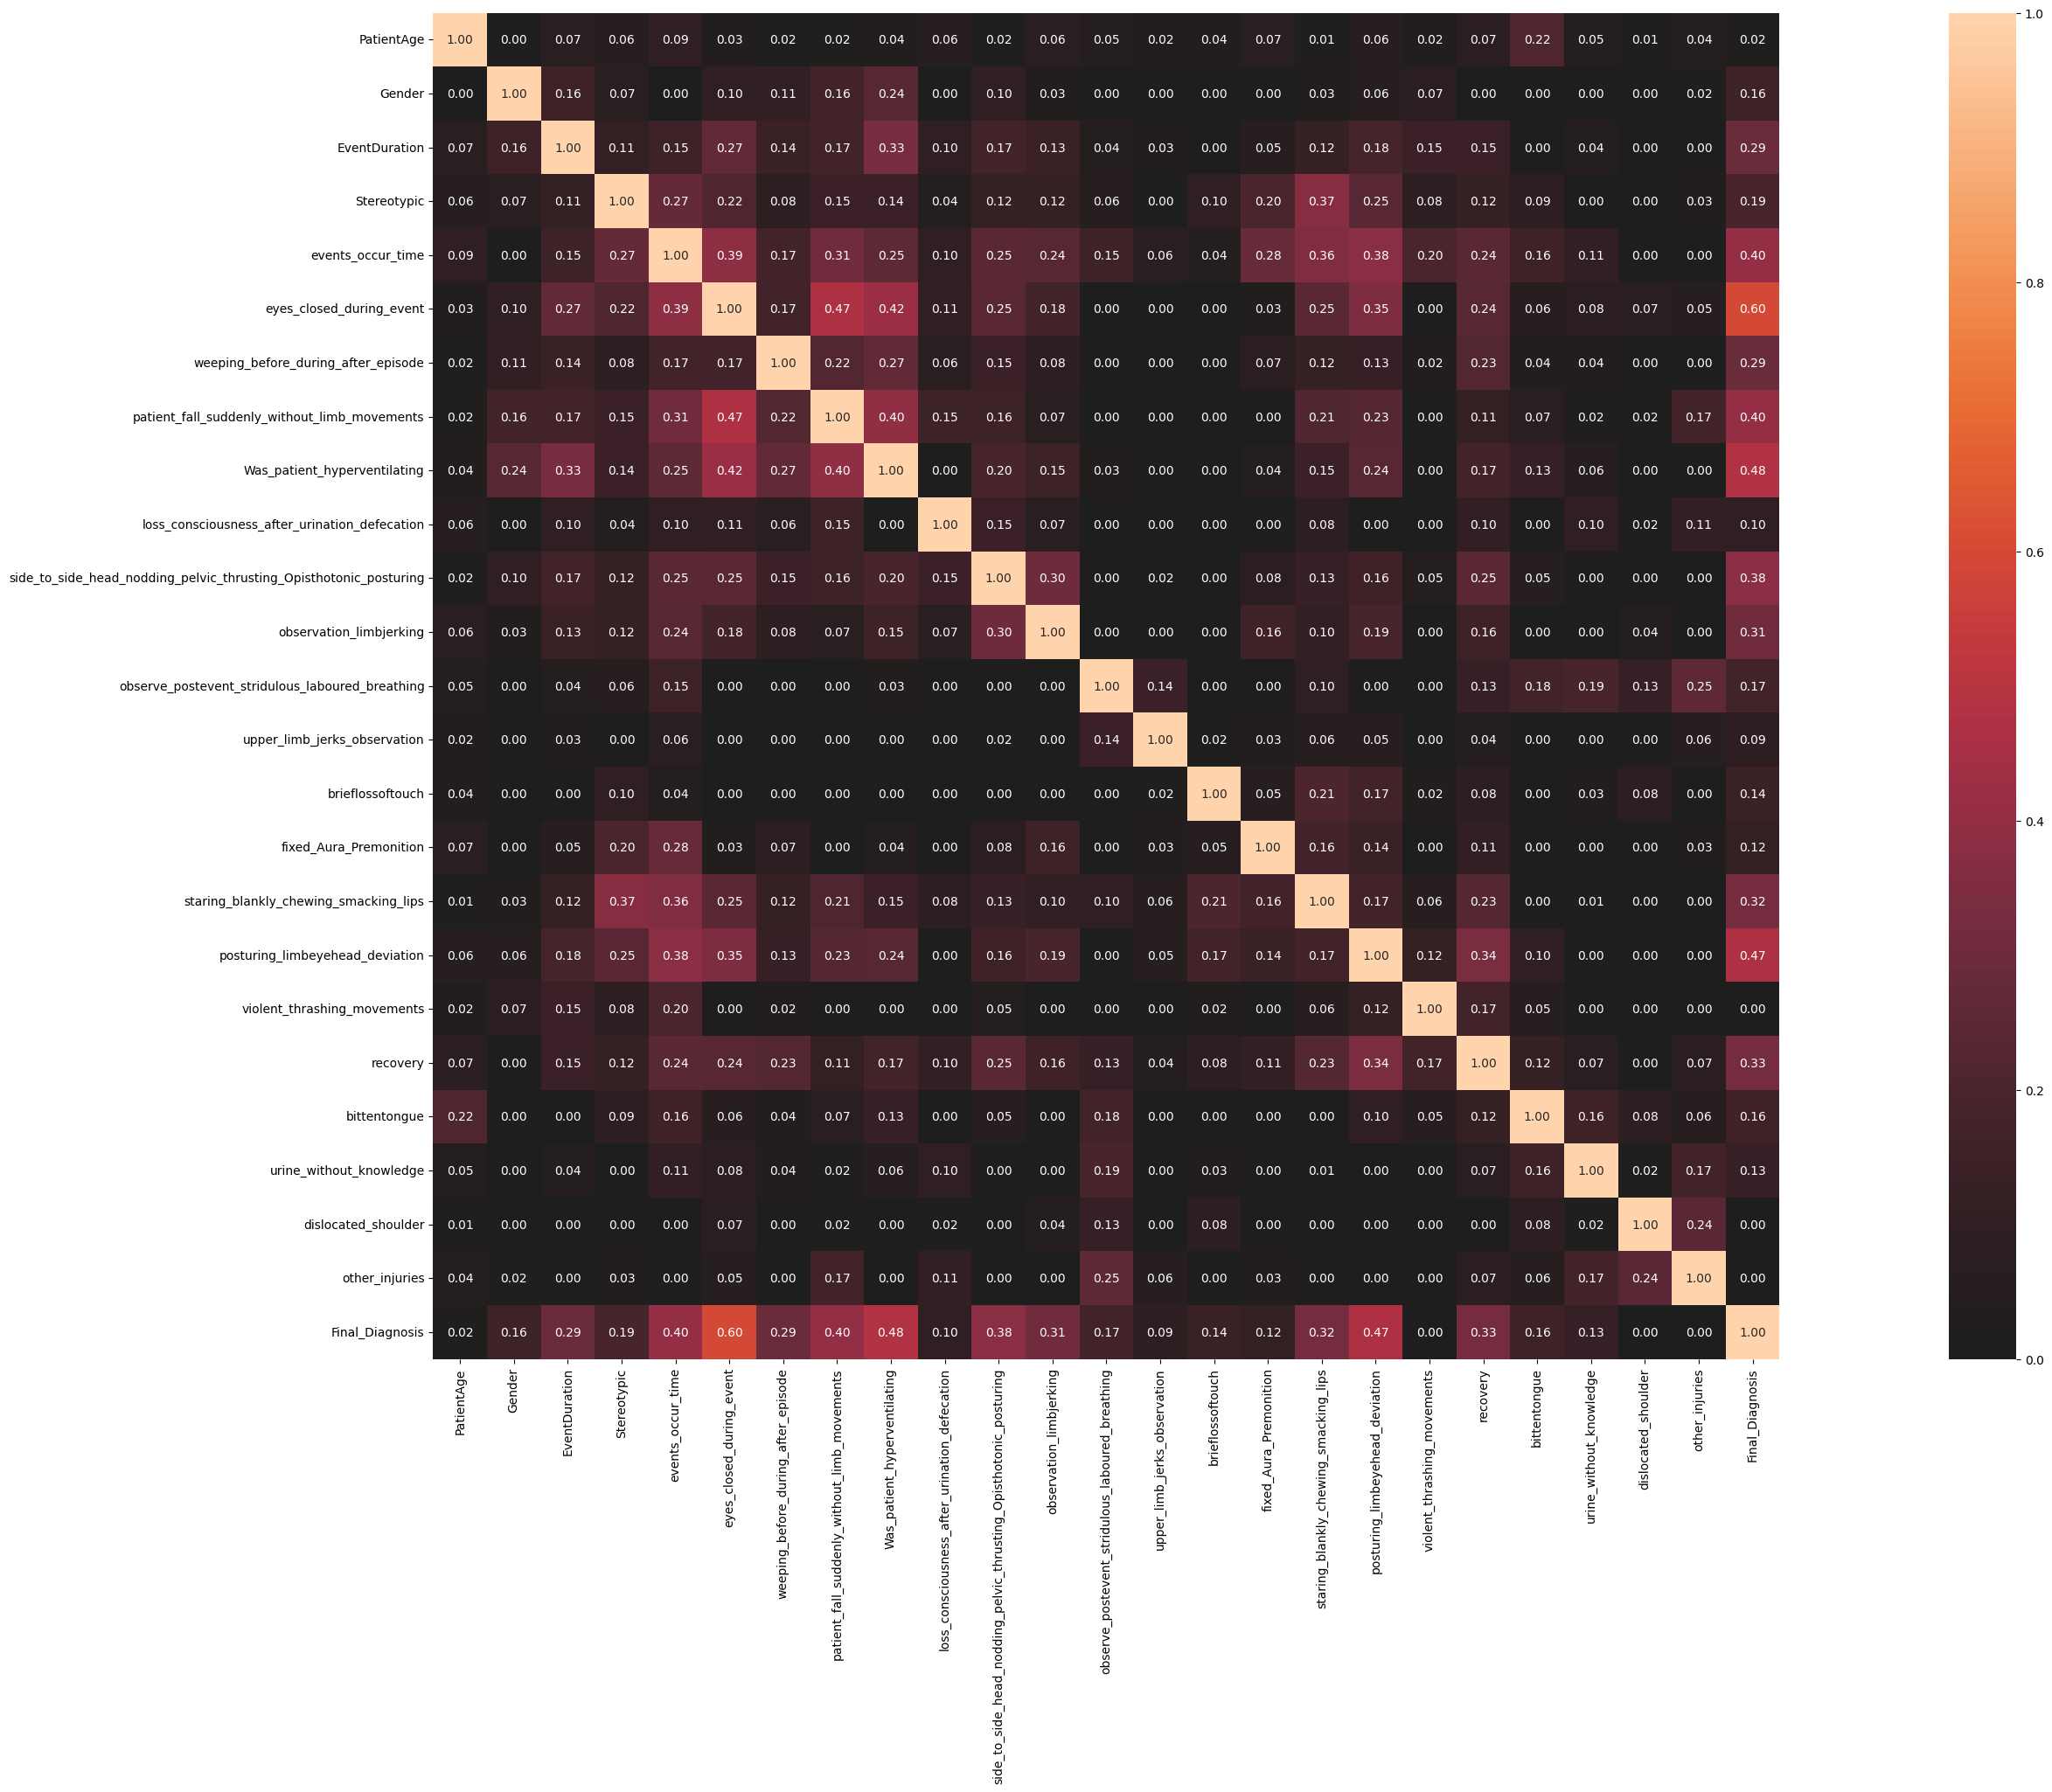

In [23]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(50,20))

In [24]:
complete_correlation['corr']['Final_Diagnosis'].abs().sort_values(ascending=False)

Final_Diagnosis                                                      1.000000
eyes_closed_during_event                                             0.599215
Was_patient_hyperventilating                                         0.482815
posturing_limbeyehead_deviation                                      0.474235
patient_fall_suddenly_without_limb_movements                         0.404282
events_occur_time                                                    0.402523
side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing    0.378964
recovery                                                             0.326129
staring_blankly_chewing_smacking_lips                                0.324035
observation_limbjerking                                              0.310874
EventDuration                                                        0.290785
weeping_before_during_after_episode                                  0.289621
Stereotypic                                                     

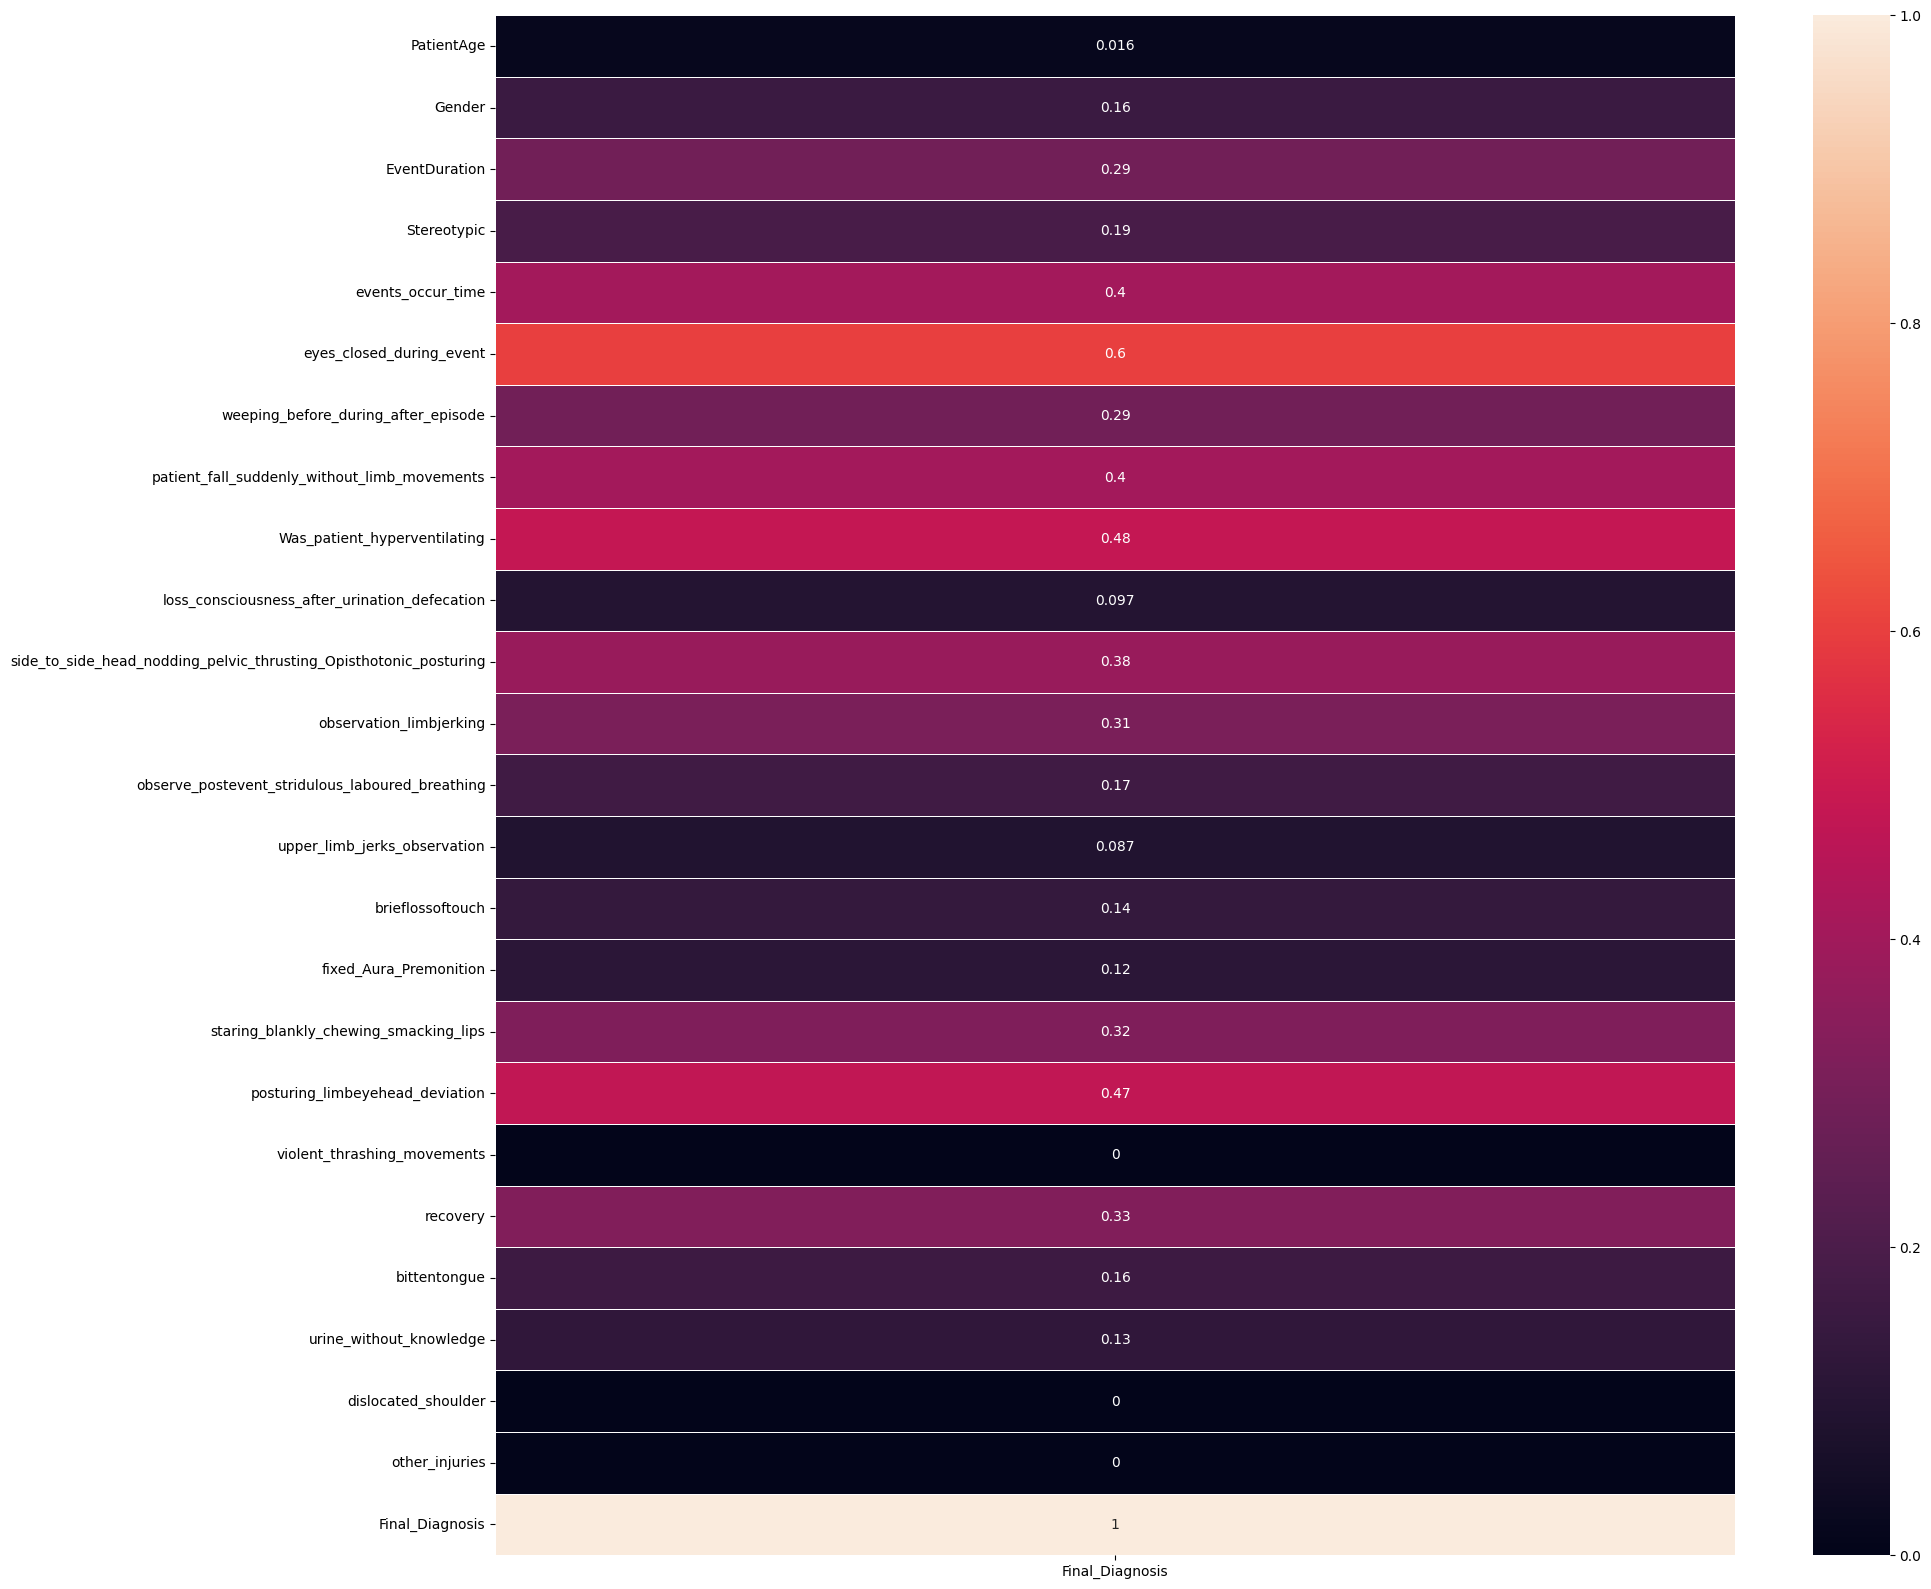

In [25]:
from pprint import pprint
# pprint(c_mat)
# c_mat['corr']

fig, ax = plt.subplots(figsize = (20,20))

columns = list(df)
result_cols = ['Final_Diagnosis']

for col in result_cols:
  columns.remove(col)

sns.heatmap(complete_correlation['corr'][result_cols], annot = True, linewidths = .5, ax = ax)
plt.show()

In [ ]:
#removing starting case col
#df_copy.drop(df_copy.columns[0], axis=1, inplace=True)
#removing last 2 col
##df_copy.drop(df_copy.columns[len(df_copy.columns)-1], axis=1, inplace=True)
#print df_copy
#df_copy

In [26]:
df['Final_Diagnosis'].value_counts()

Epileptic Seizure      400
Non epileptic spell     93
Uncertain                6
Name: Final_Diagnosis, dtype: int64

In [27]:
#index of values with 0 (uncertain value)
f = df.loc[df['Final_Diagnosis'] == 'Uncertain'].index
f

Int64Index([369, 394, 421, 445, 455, 488], dtype='int64')

In [28]:
#remove 0 values
df.drop(f, inplace = True)
df

PatientAge  Gender         EventDuration  \
0          18.0  Female  More than 10 minutes   
1          26.0    Male           1-5 minutes   
2          17.0    Male          5-10 minutes   
3          40.0    Male           1-5 minutes   
4          17.0  Female           1-5 minutes   
..          ...     ...                   ...   
494        33.0    Male           1-5 minutes   
495        30.0    Male           1-5 minutes   
496        22.0    Male           1-5 minutes   
497        44.0    Male           1-5 minutes   
498        20.0    Male           1-5 minutes   

                                       Stereotypic  \
0                                Yes, all are same   
1                                Yes, all are same   
2                                Yes, all are same   
3                                Yes, all are same   
4                                Yes, all are same   
..                                             ...   
494  Two different types (small ones and big ones)   
495  Two different types (small ones and big ones)   
496                              Yes, all are same   
497  Two different types (small ones and big ones)   
498                              Yes, all are same   

                     events_occur_time eyes_closed_during_event  \
0              Only during wakefulness                      Yes   
1              Only during wakefulness                      Yes   
2    Both during wakefulness and sleep                       No   
3    Both during wakefulness and sleep                       No   
4    Both during wakefulness and sleep                      Yes   
..                                 ...                      ...   
494  Both during wakefulness and sleep                       No   
495  Both during wakefulness and sleep                       No   
496                      Only in Sleep                       No   
497  Both during wakefulness and sleep                       No   
498            Only during wakefulness                       No   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
494                                  No   
495                                  No   
496                                  No   
497                                  No   
498                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
494                                           No                           No   
495                                           No                           No   
496                                           No                           No   
497                                           No                           No   
498                                           No                           No   

    loss_consciousness_after_urination_defecation  ... fixed_Aura_Premonition  \
0                                              No  ...                    Yes   
1                                              No  ...                     No   
2                                              No  ...                     No   
3                                              No  ...                    Yes   
4                                              No  ...             

In [ ]:
#storing df_copy to xl file in csv file
# from google.colab import files
# brandname = 'df_copy'
# df_copy.to_csv(brandname + '-subdirs_from_sitemap.csv', sep='\t')
# brandname = 'df_copy'
# files.download(brandname + '-subdirs_from_sitemap.csv')
#storing it in the google sheet
#Export to Google Sheets(Doing the Auth)
# !pip install --upgrade --quiet gspread
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# #from oauth2client.client import GoogleCredentials
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)

#Export to Google Sheets / Part 2 Export
#!pip uninstall gspread-dataframe
# !pip install --upgrade --quiet gspread_dataframe
#pip install gspread_dataframe
# from gspread_dataframe import get_as_dataframe, set_with_dataframe

# sh = gc.create(brandname + '-subdirs_from_sitemap')
# worksheet = gc.open(brandname + '-subdirs_from_sitemap').sheet1

# set_with_dataframe(worksheet, df_copy)
# print(
#     p9.ggplot(df, p9.aes(x='events_occur_time', y='PatientAge')) +
#     p9.geom_point(p9.aes(color='Final_Diagnosis')) +
#     p9.theme_bw())

In [29]:
# one hot encoding

new_cols = dict()
old_cols = []

for col in df:
  unique = set()
  for entry in df[col]:
    unique.add(entry)
  if len(unique) > 2 and type(list(unique)[0]) != type(1.0):
    old_cols.append(col)
    for category in unique:
      col_name = f"{col} {category}"
      new_cols[col_name] = []

      for entry in df[col]:
        if entry == category:
          new_cols[col_name].append('Yes')
        else:
          new_cols[col_name].append('No')

In [30]:
df.drop(old_cols, axis = 1,inplace=True)
for col_name in new_cols.keys():
  df[col_name] = new_cols[col_name]

In [31]:
df

PatientAge  Gender eyes_closed_during_event  \
0          18.0  Female                      Yes   
1          26.0    Male                      Yes   
2          17.0    Male                       No   
3          40.0    Male                       No   
4          17.0  Female                      Yes   
..          ...     ...                      ...   
494        33.0    Male                       No   
495        30.0    Male                       No   
496        22.0    Male                       No   
497        44.0    Male                       No   
498        20.0    Male                       No   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
494                                  No   
495                                  No   
496                                  No   
497                                  No   
498                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
494                                           No                           No   
495                                           No                           No   
496                                           No                           No   
497                                           No                           No   
498                                           No                           No   

    loss_consciousness_after_urination_defecation  \
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   
..                                            ...   
494                                            No   
495                                            No   
496                                            No   
497                                            No   
498                                            No   

    side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                                   No                  
1                                                   No                  
2                                                   No                  
3                                                   No                  
4                                                   No                  
..                                                 ...                  
494                                                 No                  
495                                                 No                  
496                                                 No                  
497                                                 No                  
498                                                 No                  

    observation_limbjerking observe_postevent_stridulous_laboured_breathing  \
0                        No                                             Yes   
1                        No                                              No   
2                        No                                             Yes   
3                        No                                 

In [32]:
df.to_excel('/content/Epilepsy after one hot encoding.xlsx')

In [33]:
from sklearn.model_selection import train_test_split

y= df.Final_Diagnosis
x=df.drop('Final_Diagnosis',axis=1)

#X_train, X_test, y_train, y_test = train_test_split(df_copy[X_cols], df_copy[Y_col],test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y

0      Non epileptic spell
1        Epileptic Seizure
2        Epileptic Seizure
3        Epileptic Seizure
4        Epileptic Seizure
              ...         
494      Epileptic Seizure
495      Epileptic Seizure
496      Epileptic Seizure
497      Epileptic Seizure
498    Non epileptic spell
Name: Final_Diagnosis, Length: 493, dtype: object

In [34]:
#from google.colab import files
#uploaded = files.upload()
#from google.colab import drive
#drive.mount('/content/drive')
#path = "https://docs.google.com/spreadsheets/d/1w_Cv0-Hjal9KMStRTuLkPOc2JOfCAk-q6rKRisgArAY/edit?usp=sharing"
#df_bonus = pd.read_csv(path)
#df_bonus
df

PatientAge  Gender eyes_closed_during_event  \
0          18.0  Female                      Yes   
1          26.0    Male                      Yes   
2          17.0    Male                       No   
3          40.0    Male                       No   
4          17.0  Female                      Yes   
..          ...     ...                      ...   
494        33.0    Male                       No   
495        30.0    Male                       No   
496        22.0    Male                       No   
497        44.0    Male                       No   
498        20.0    Male                       No   

    weeping_before_during_after_episode  \
0                                   Yes   
1                                    No   
2                                    No   
3                                    No   
4                                    No   
..                                  ...   
494                                  No   
495                                  No   
496                                  No   
497                                  No   
498                                  No   

    patient_fall_suddenly_without_limb_movements Was_patient_hyperventilating  \
0                                             No                          Yes   
1                                             No                           No   
2                                             No                           No   
3                                             No                           No   
4                                             No                           No   
..                                           ...                          ...   
494                                           No                           No   
495                                           No                           No   
496                                           No                           No   
497                                           No                           No   
498                                           No                           No   

    loss_consciousness_after_urination_defecation  \
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   
..                                            ...   
494                                            No   
495                                            No   
496                                            No   
497                                            No   
498                                            No   

    side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                                   No                  
1                                                   No                  
2                                                   No                  
3                                                   No                  
4                                                   No                  
..                                                 ...                  
494                                                 No                  
495                                                 No                  
496                                                 No                  
497                                                 No                  
498                                                 No                  

    observation_limbjerking observe_postevent_stridulous_laboured_breathing  \
0                        No                                             Yes   
1                        No                                              No   
2                        No                                             Yes   
3                        No                                 

In [35]:
# #%pip install statsmodels --upgrade
# !pip show matplotlib   #enables you to check version
# !pip install matplotlib==3.5

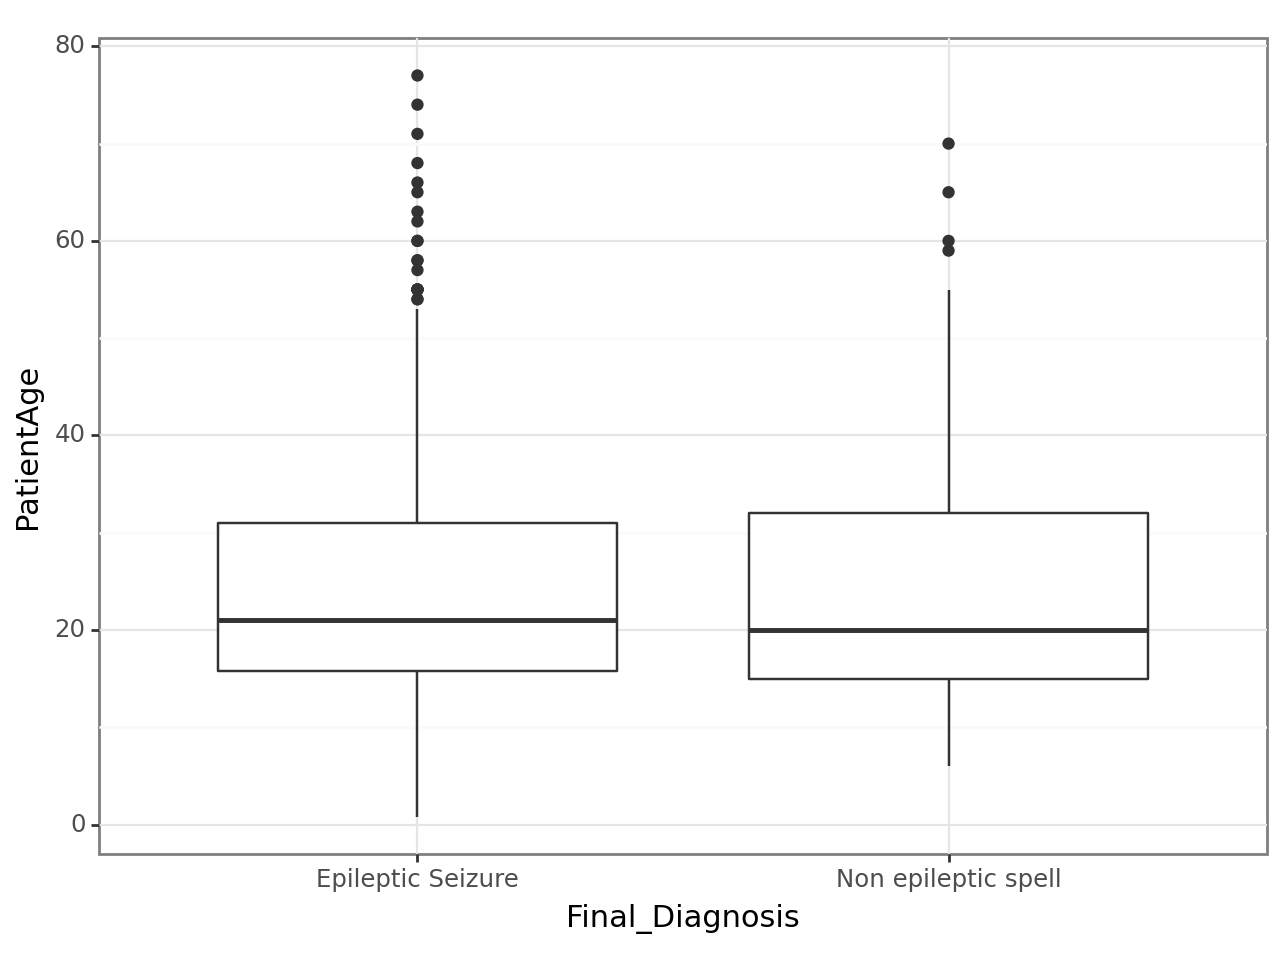

In [36]:
import plotnine as p9

print(
    p9.ggplot(df, p9.aes(x='Final_Diagnosis', y='PatientAge')) +
    p9.geom_boxplot() +
    p9.theme_bw())

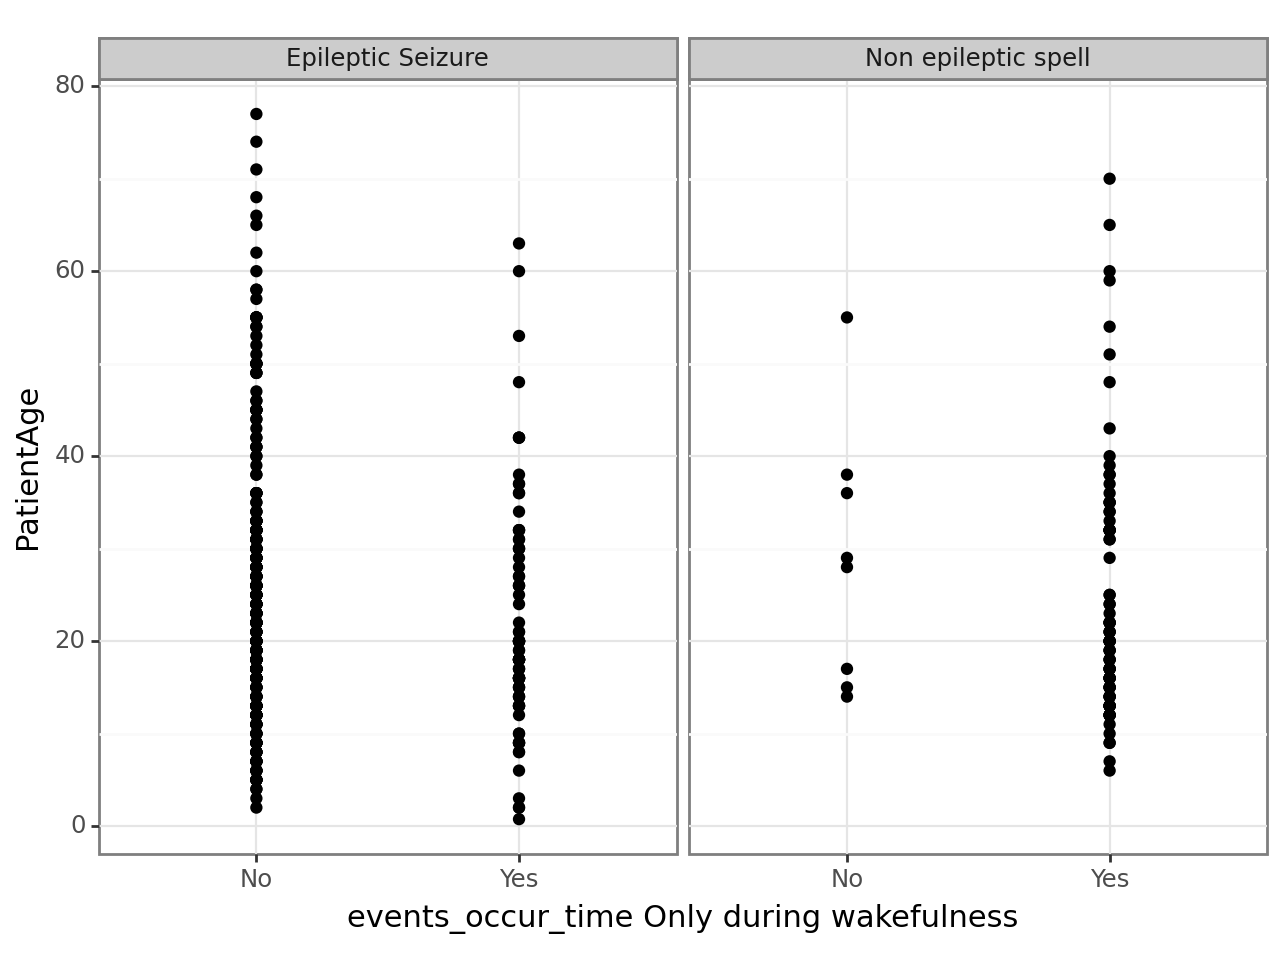

In [37]:
print(
    p9.ggplot(df, p9.aes(x='events_occur_time Only during wakefulness', y='PatientAge')) +
    p9.geom_point() +
    p9.facet_wrap('~ Final_Diagnosis') +
    p9.theme_bw())

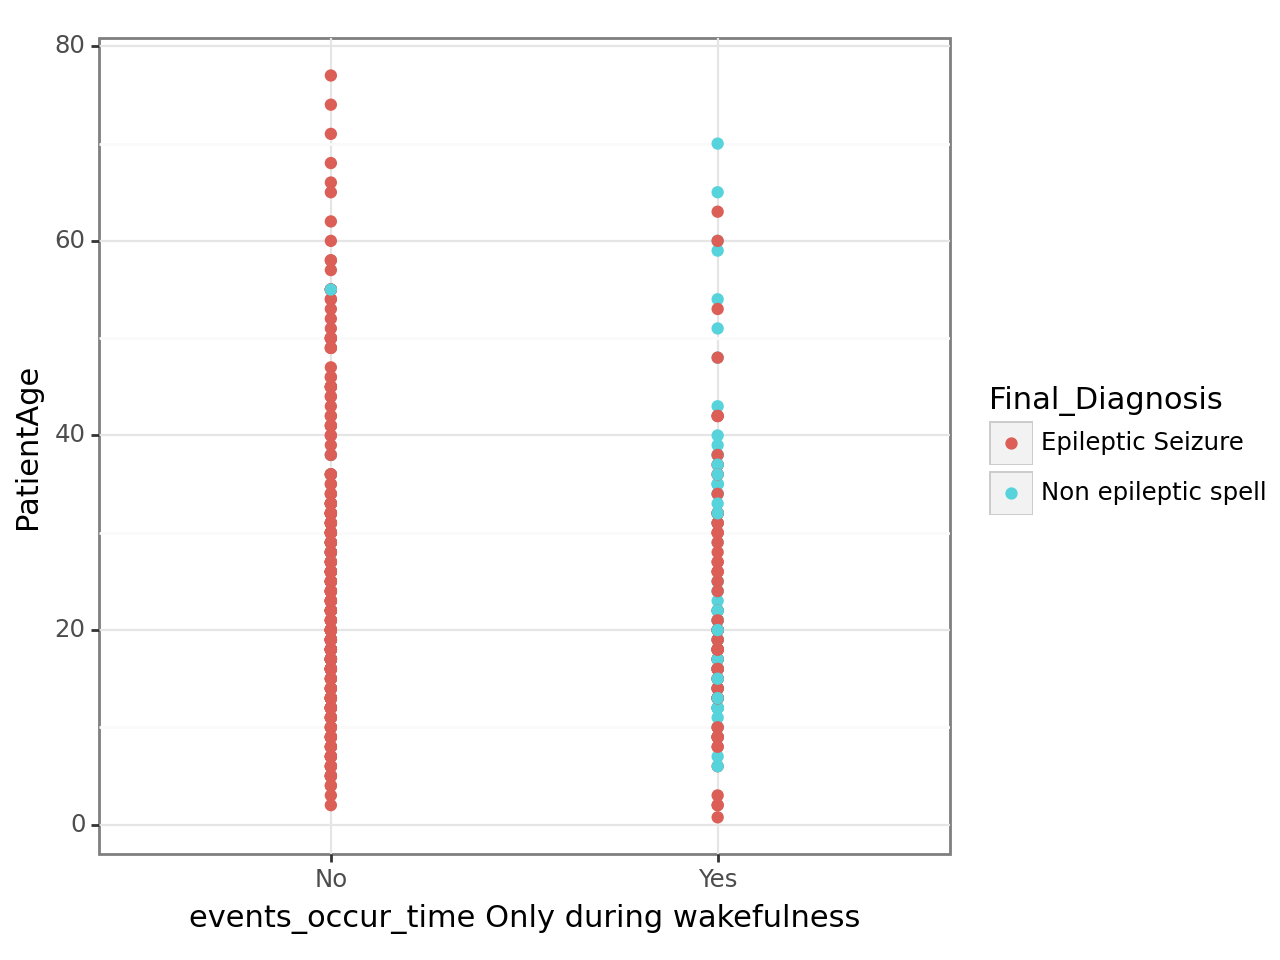

In [38]:
print(
    p9.ggplot(df, p9.aes(x='events_occur_time Only during wakefulness', y='PatientAge')) +
    p9.geom_point(p9.aes(color='Final_Diagnosis')) +
    p9.theme_bw())

In [39]:
print(x_train['PatientAge'].dtype)

cat_cols = []
for col in x_train.columns:
    if col!='PatientAge':
        cat_cols.append(True)
    else:
      cat_cols.append(False)


float64


In [40]:

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your systhem)
!pip install --upgrade --quiet imblearn
from imblearn.over_sampling import SMOTENC

sm = SMOTENC( categorical_features = cat_cols, random_state = 10)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())


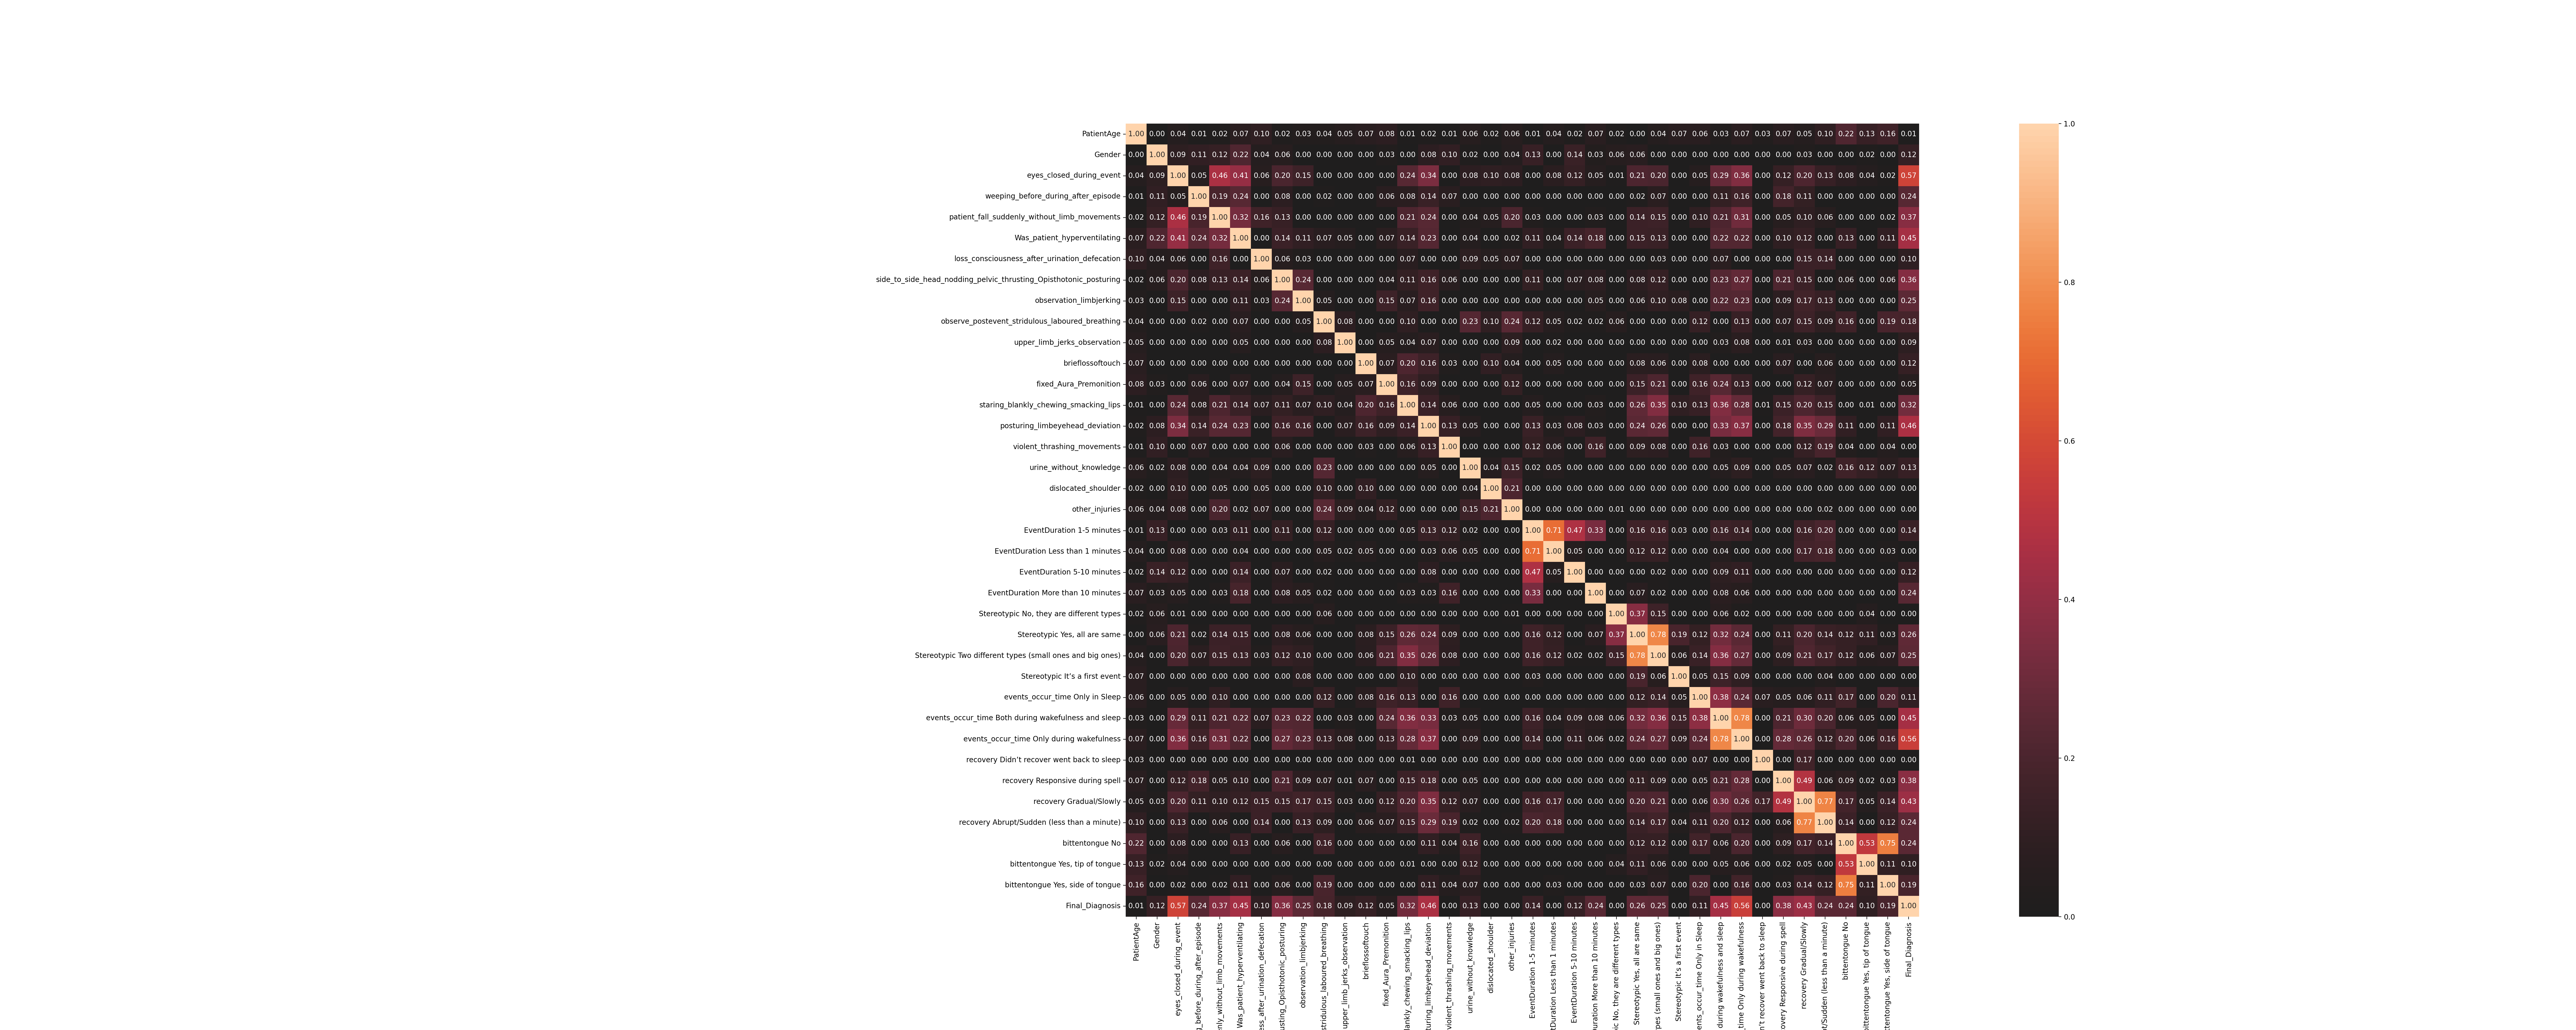

In [41]:
x_original = x_train.copy()
x_original['Final_Diagnosis'] = y_train.tolist()
correlations = {}
complete_correlation= associations(x_original, filename= 'complete_correlation.png', figsize=(50,20))

correlations['original'] = (complete_correlation['corr']["Final_Diagnosis"].abs().copy())

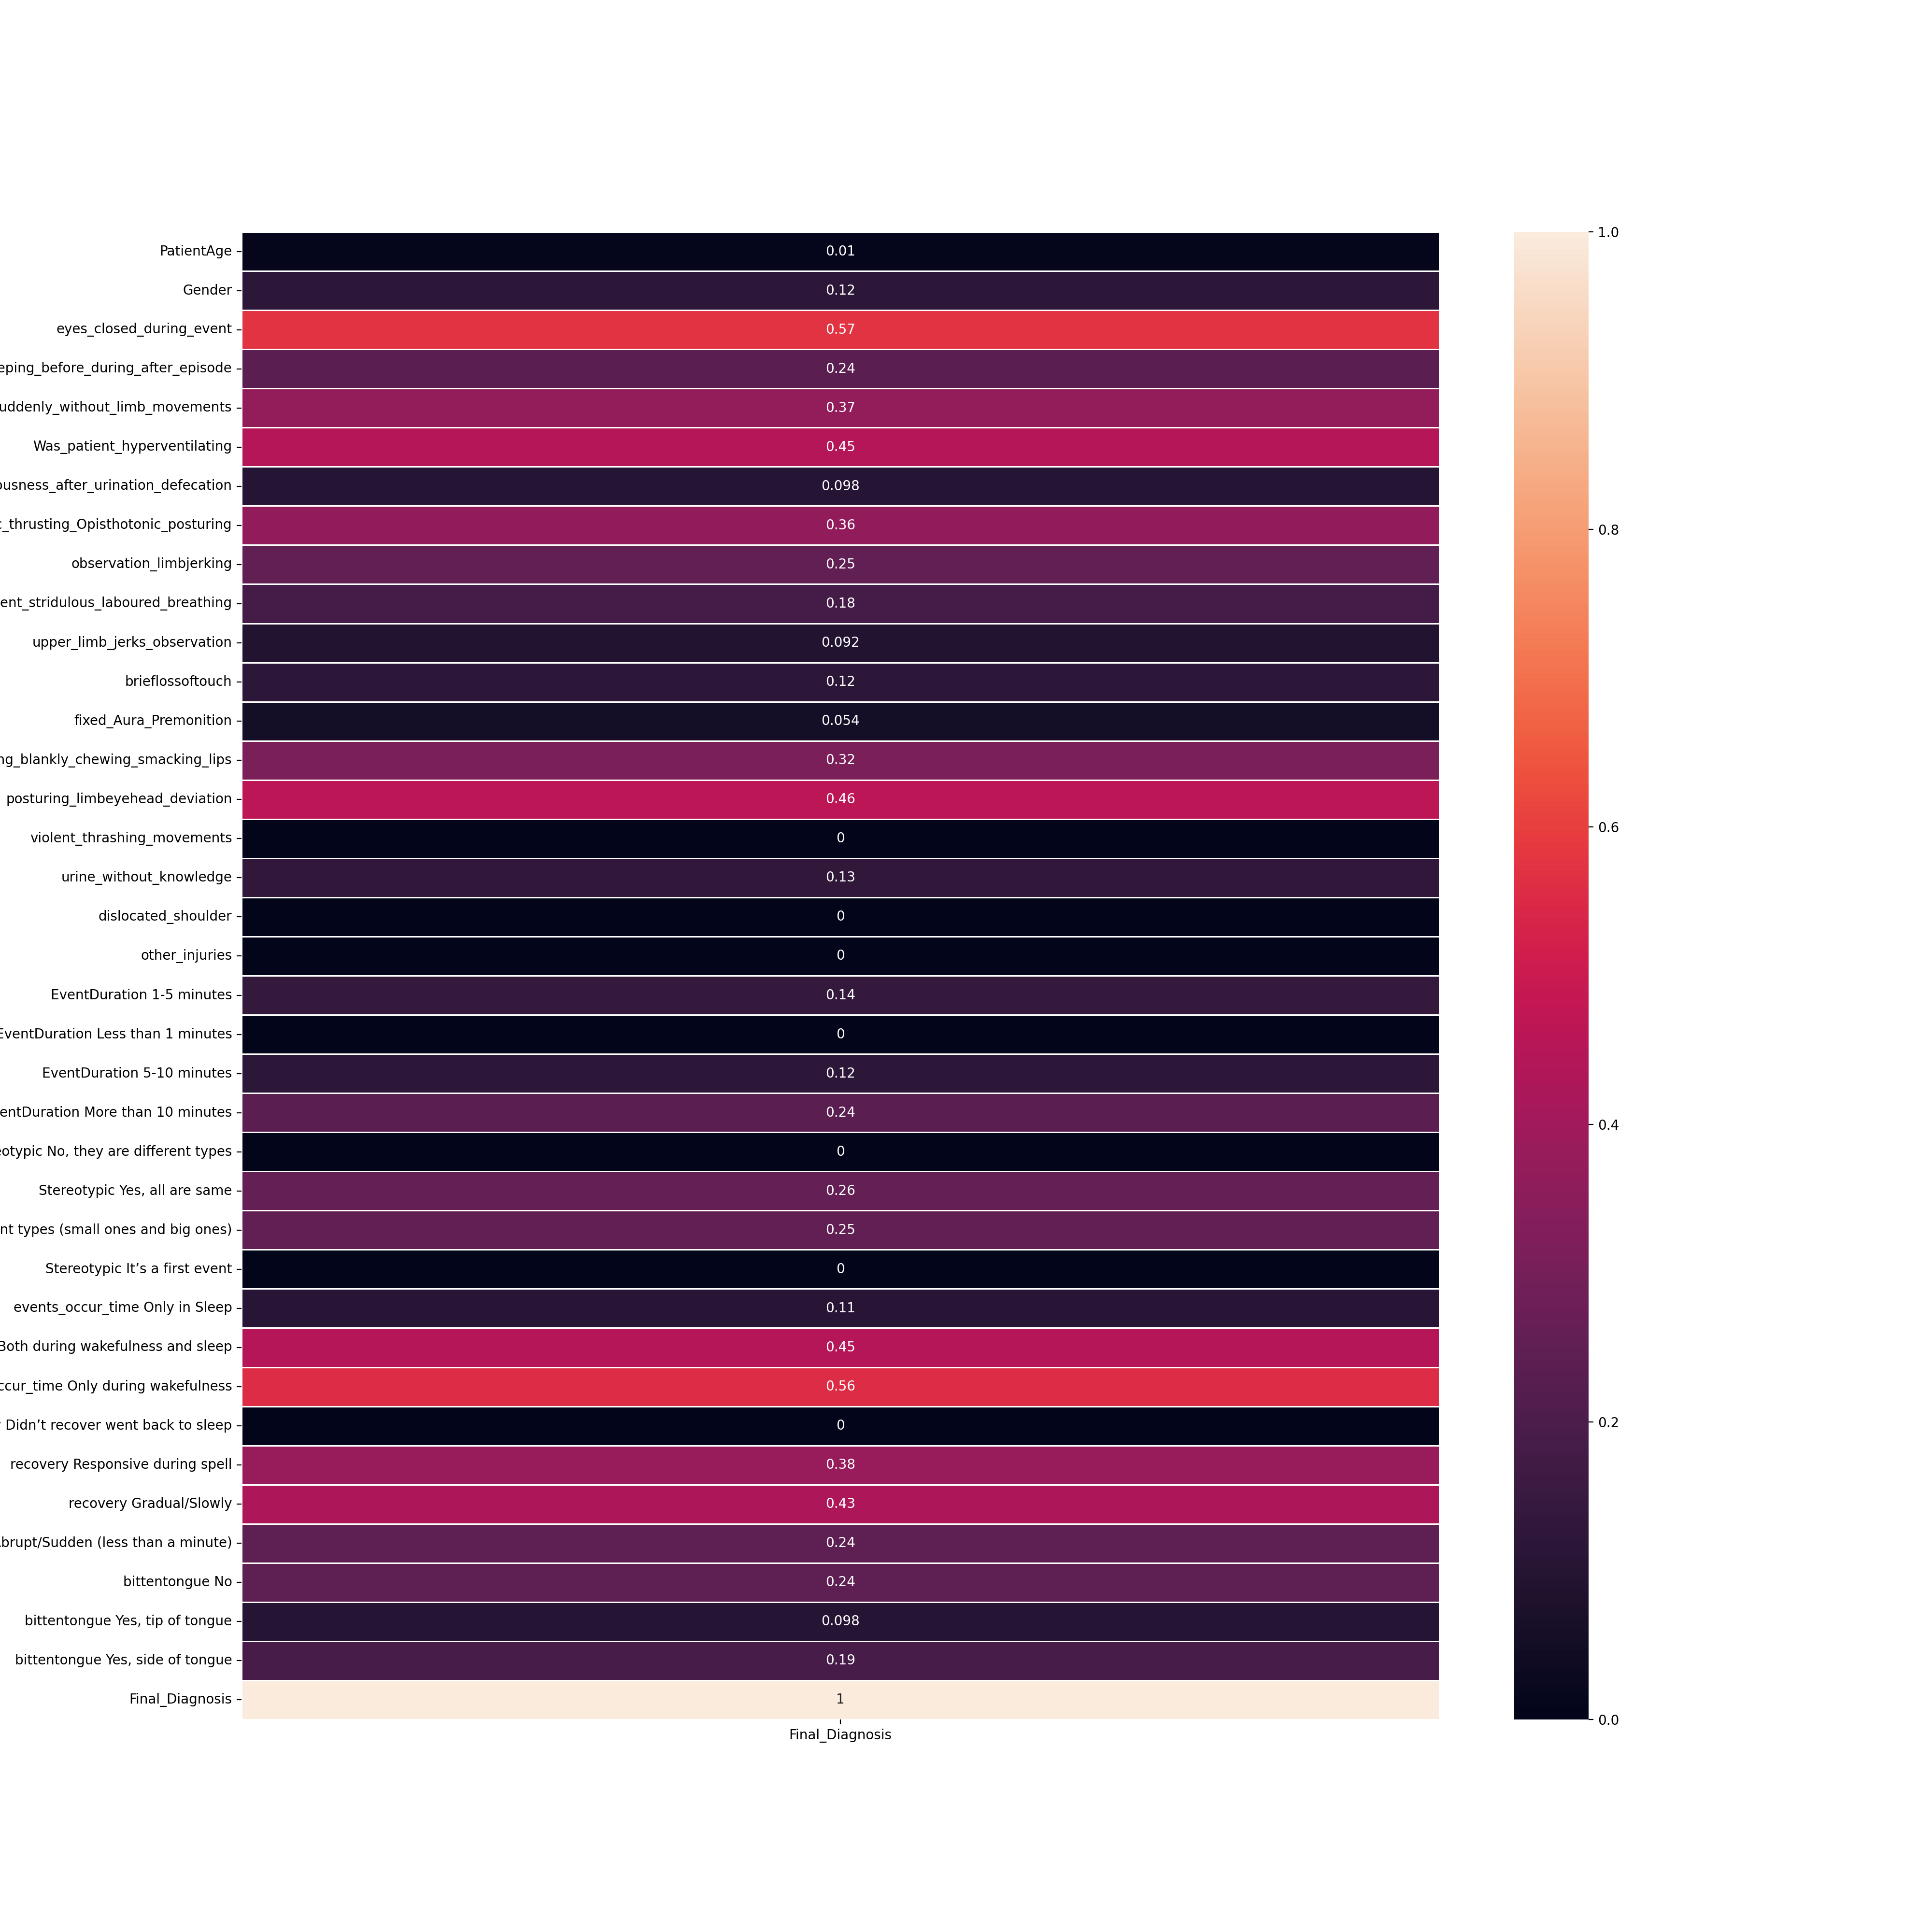

In [42]:
from pprint import pprint
# pprint(c_mat)
# c_mat['corr']

fig, ax = plt.subplots(figsize = (20,20))

columns = list(df)
result_cols = ['Final_Diagnosis']

for col in result_cols:
  columns.remove(col)

sns.heatmap(complete_correlation['corr'][result_cols], annot = True, linewidths = .5, ax = ax)
plt.show()

In [43]:
cor_mp = complete_correlation['corr']["Final_Diagnosis"].abs().sort_values(ascending=False)

Index(['Final_Diagnosis', 'eyes_closed_during_event',
       'events_occur_time Only during wakefulness',
       'posturing_limbeyehead_deviation', 'Was_patient_hyperventilating',
       'events_occur_time Both during wakefulness and sleep',
       'recovery Gradual/Slowly', 'recovery Responsive during spell',
       'patient_fall_suddenly_without_limb_movements',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'staring_blankly_chewing_smacking_lips',
       'Stereotypic Yes, all are same', 'observation_limbjerking',
       'Stereotypic Two different types (small ones and big ones)',
       'recovery Abrupt/Sudden (less than a minute)', 'bittentongue No',
       'EventDuration More than 10 minutes',
       'weeping_before_during_after_episode',
       'bittentongue Yes, side of tongue',
       'observe_postevent_stridulous_laboured_breathing',
       'EventDuration 1-5 minutes', 'urine_without_knowledge',
       'brieflossoftouch', 'Gender', 'EventDur

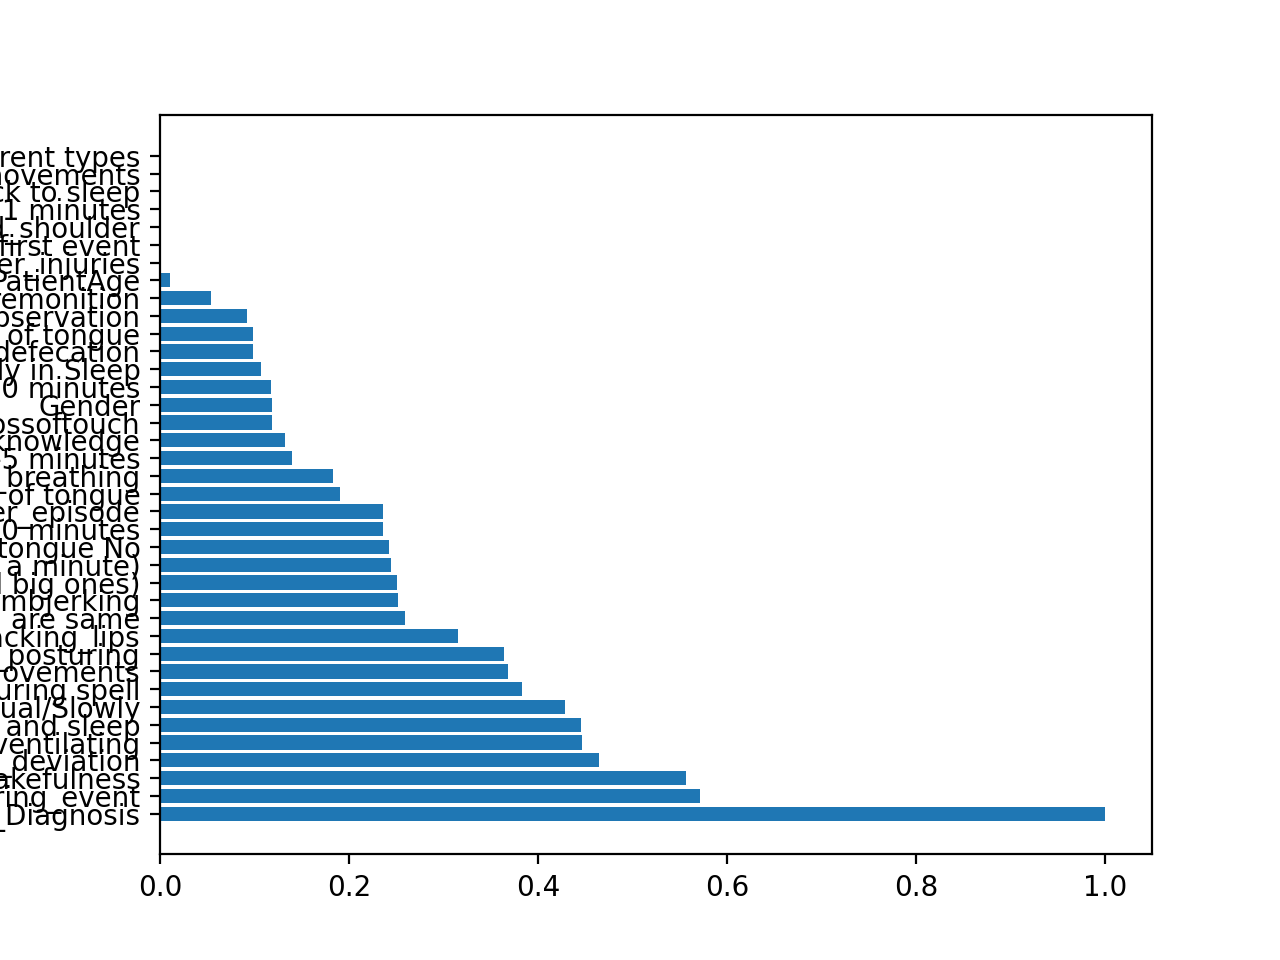

In [44]:
feature = cor_mp.keys()

print(feature)

plt.barh([feature[i] for i in range(len(feature))], cor_mp)
plt.rcParams['figure.figsize'] = [10, 11]
plt.show()

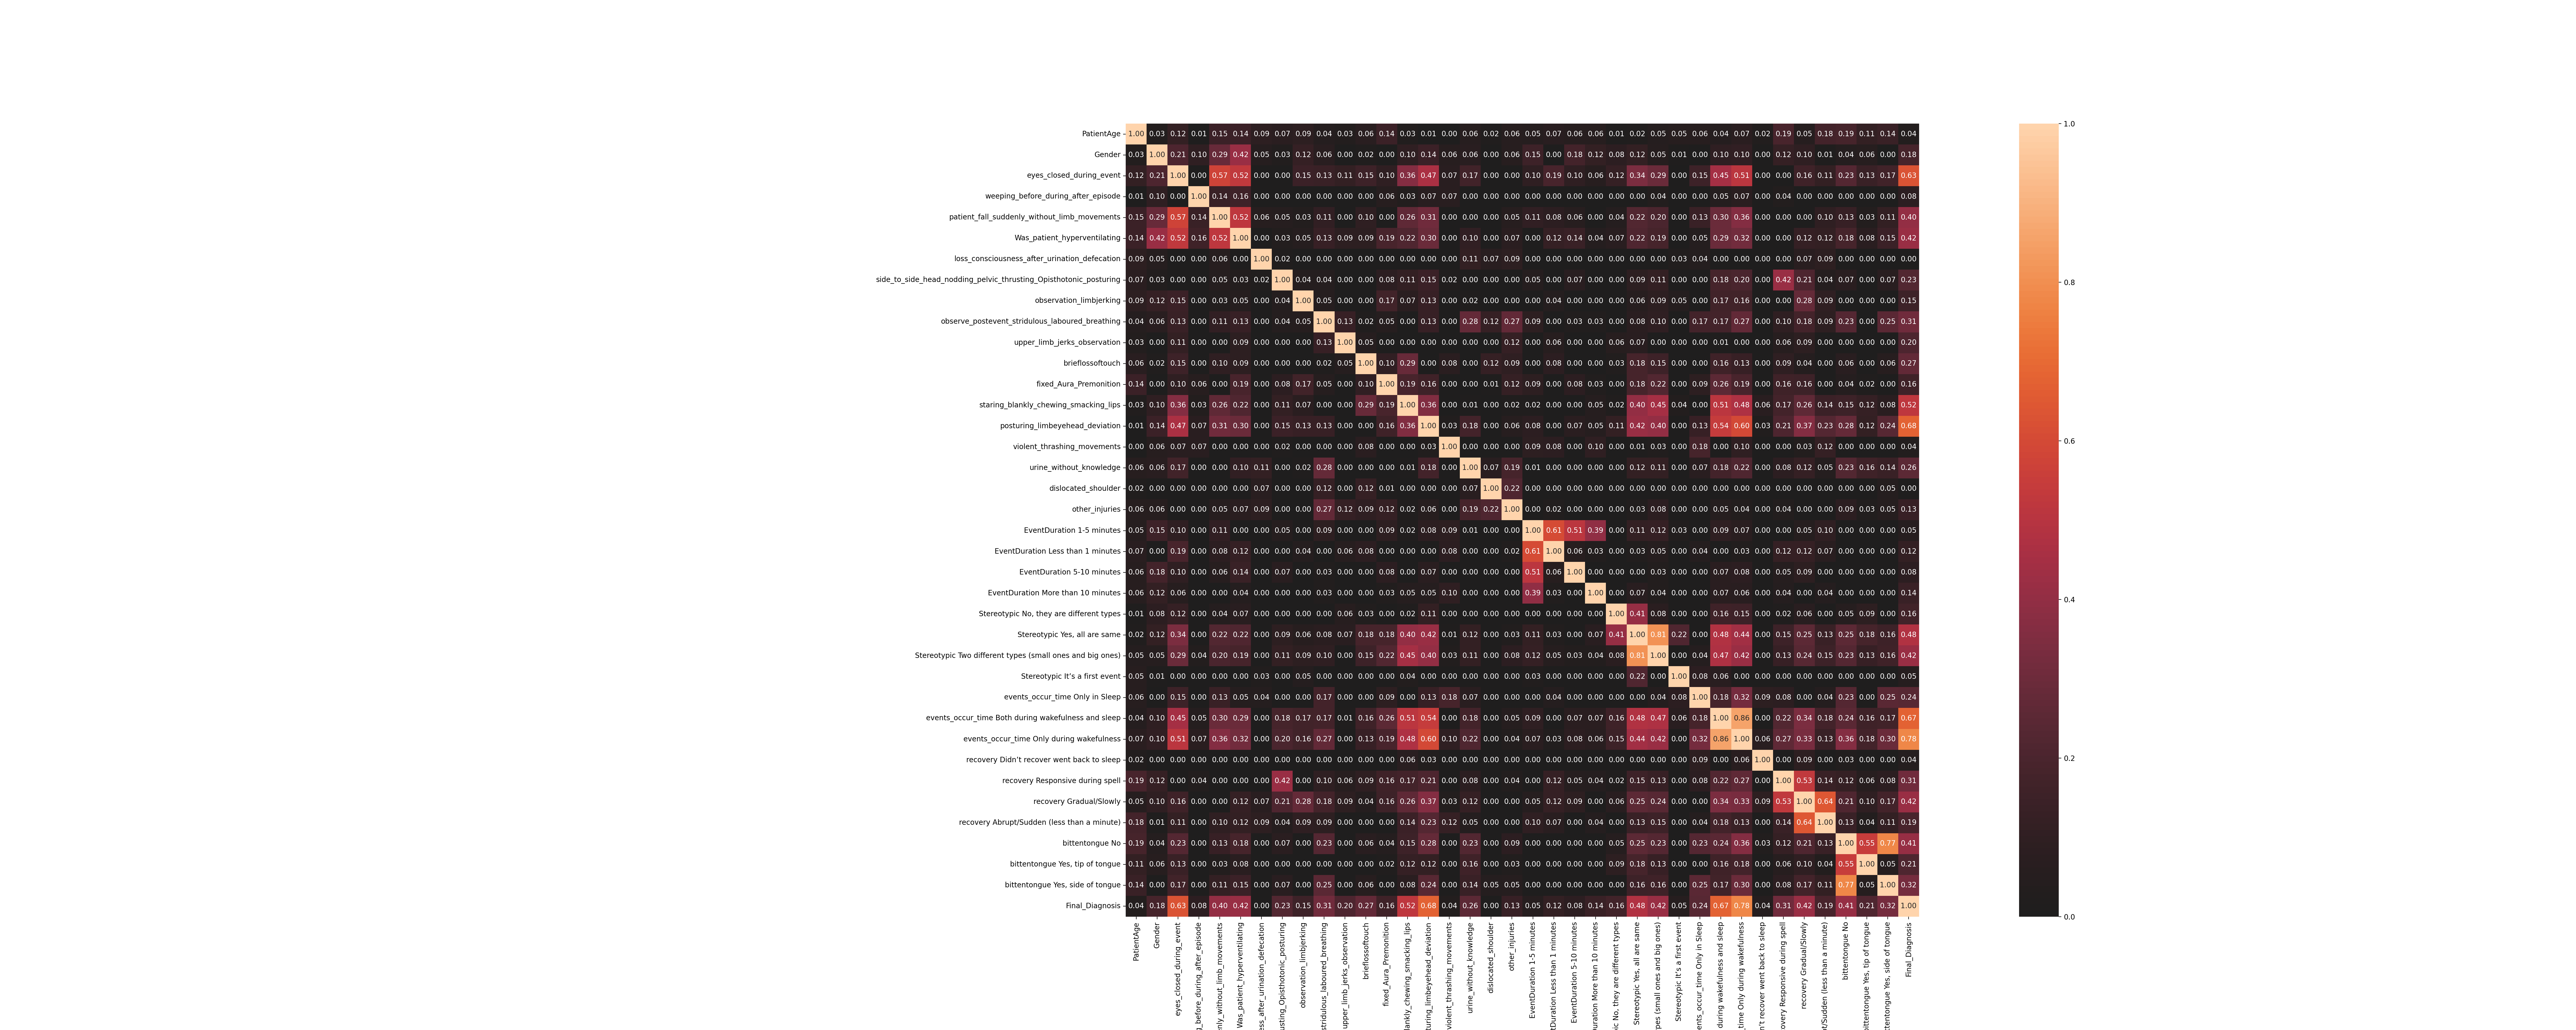

In [45]:
x_corr = x_train_smote.copy()
x_corr['Final_Diagnosis'] = y_train_smote.tolist()

complete_correlation= associations(x_corr, filename= 'complete_correlation.png', figsize=(50,20))
correlations['smote'] =(complete_correlation['corr']["Final_Diagnosis"].abs().copy())

In [46]:
cor_mp = complete_correlation['corr']["Final_Diagnosis"].abs().sort_values(ascending=False)

In [47]:
cor_mp

Final_Diagnosis                                                      1.000000
events_occur_time Only during wakefulness                            0.777669
posturing_limbeyehead_deviation                                      0.679274
events_occur_time Both during wakefulness and sleep                  0.673595
eyes_closed_during_event                                             0.632433
staring_blankly_chewing_smacking_lips                                0.519320
Stereotypic Yes, all are same                                        0.479388
recovery Gradual/Slowly                                              0.420315
Was_patient_hyperventilating                                         0.417192
Stereotypic Two different types (small ones and big ones)            0.416933
bittentongue No                                                      0.406489
patient_fall_suddenly_without_limb_movements                         0.404615
bittentongue Yes, side of tongue                                

Index(['Final_Diagnosis', 'events_occur_time Only during wakefulness',
       'posturing_limbeyehead_deviation',
       'events_occur_time Both during wakefulness and sleep',
       'eyes_closed_during_event', 'staring_blankly_chewing_smacking_lips',
       'Stereotypic Yes, all are same', 'recovery Gradual/Slowly',
       'Was_patient_hyperventilating',
       'Stereotypic Two different types (small ones and big ones)',
       'bittentongue No', 'patient_fall_suddenly_without_limb_movements',
       'bittentongue Yes, side of tongue',
       'observe_postevent_stridulous_laboured_breathing',
       'recovery Responsive during spell', 'brieflossoftouch',
       'urine_without_knowledge', 'events_occur_time Only in Sleep',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'bittentongue Yes, tip of tongue', 'upper_limb_jerks_observation',
       'recovery Abrupt/Sudden (less than a minute)', 'Gender',
       'Stereotypic No, they are different types', 'fi

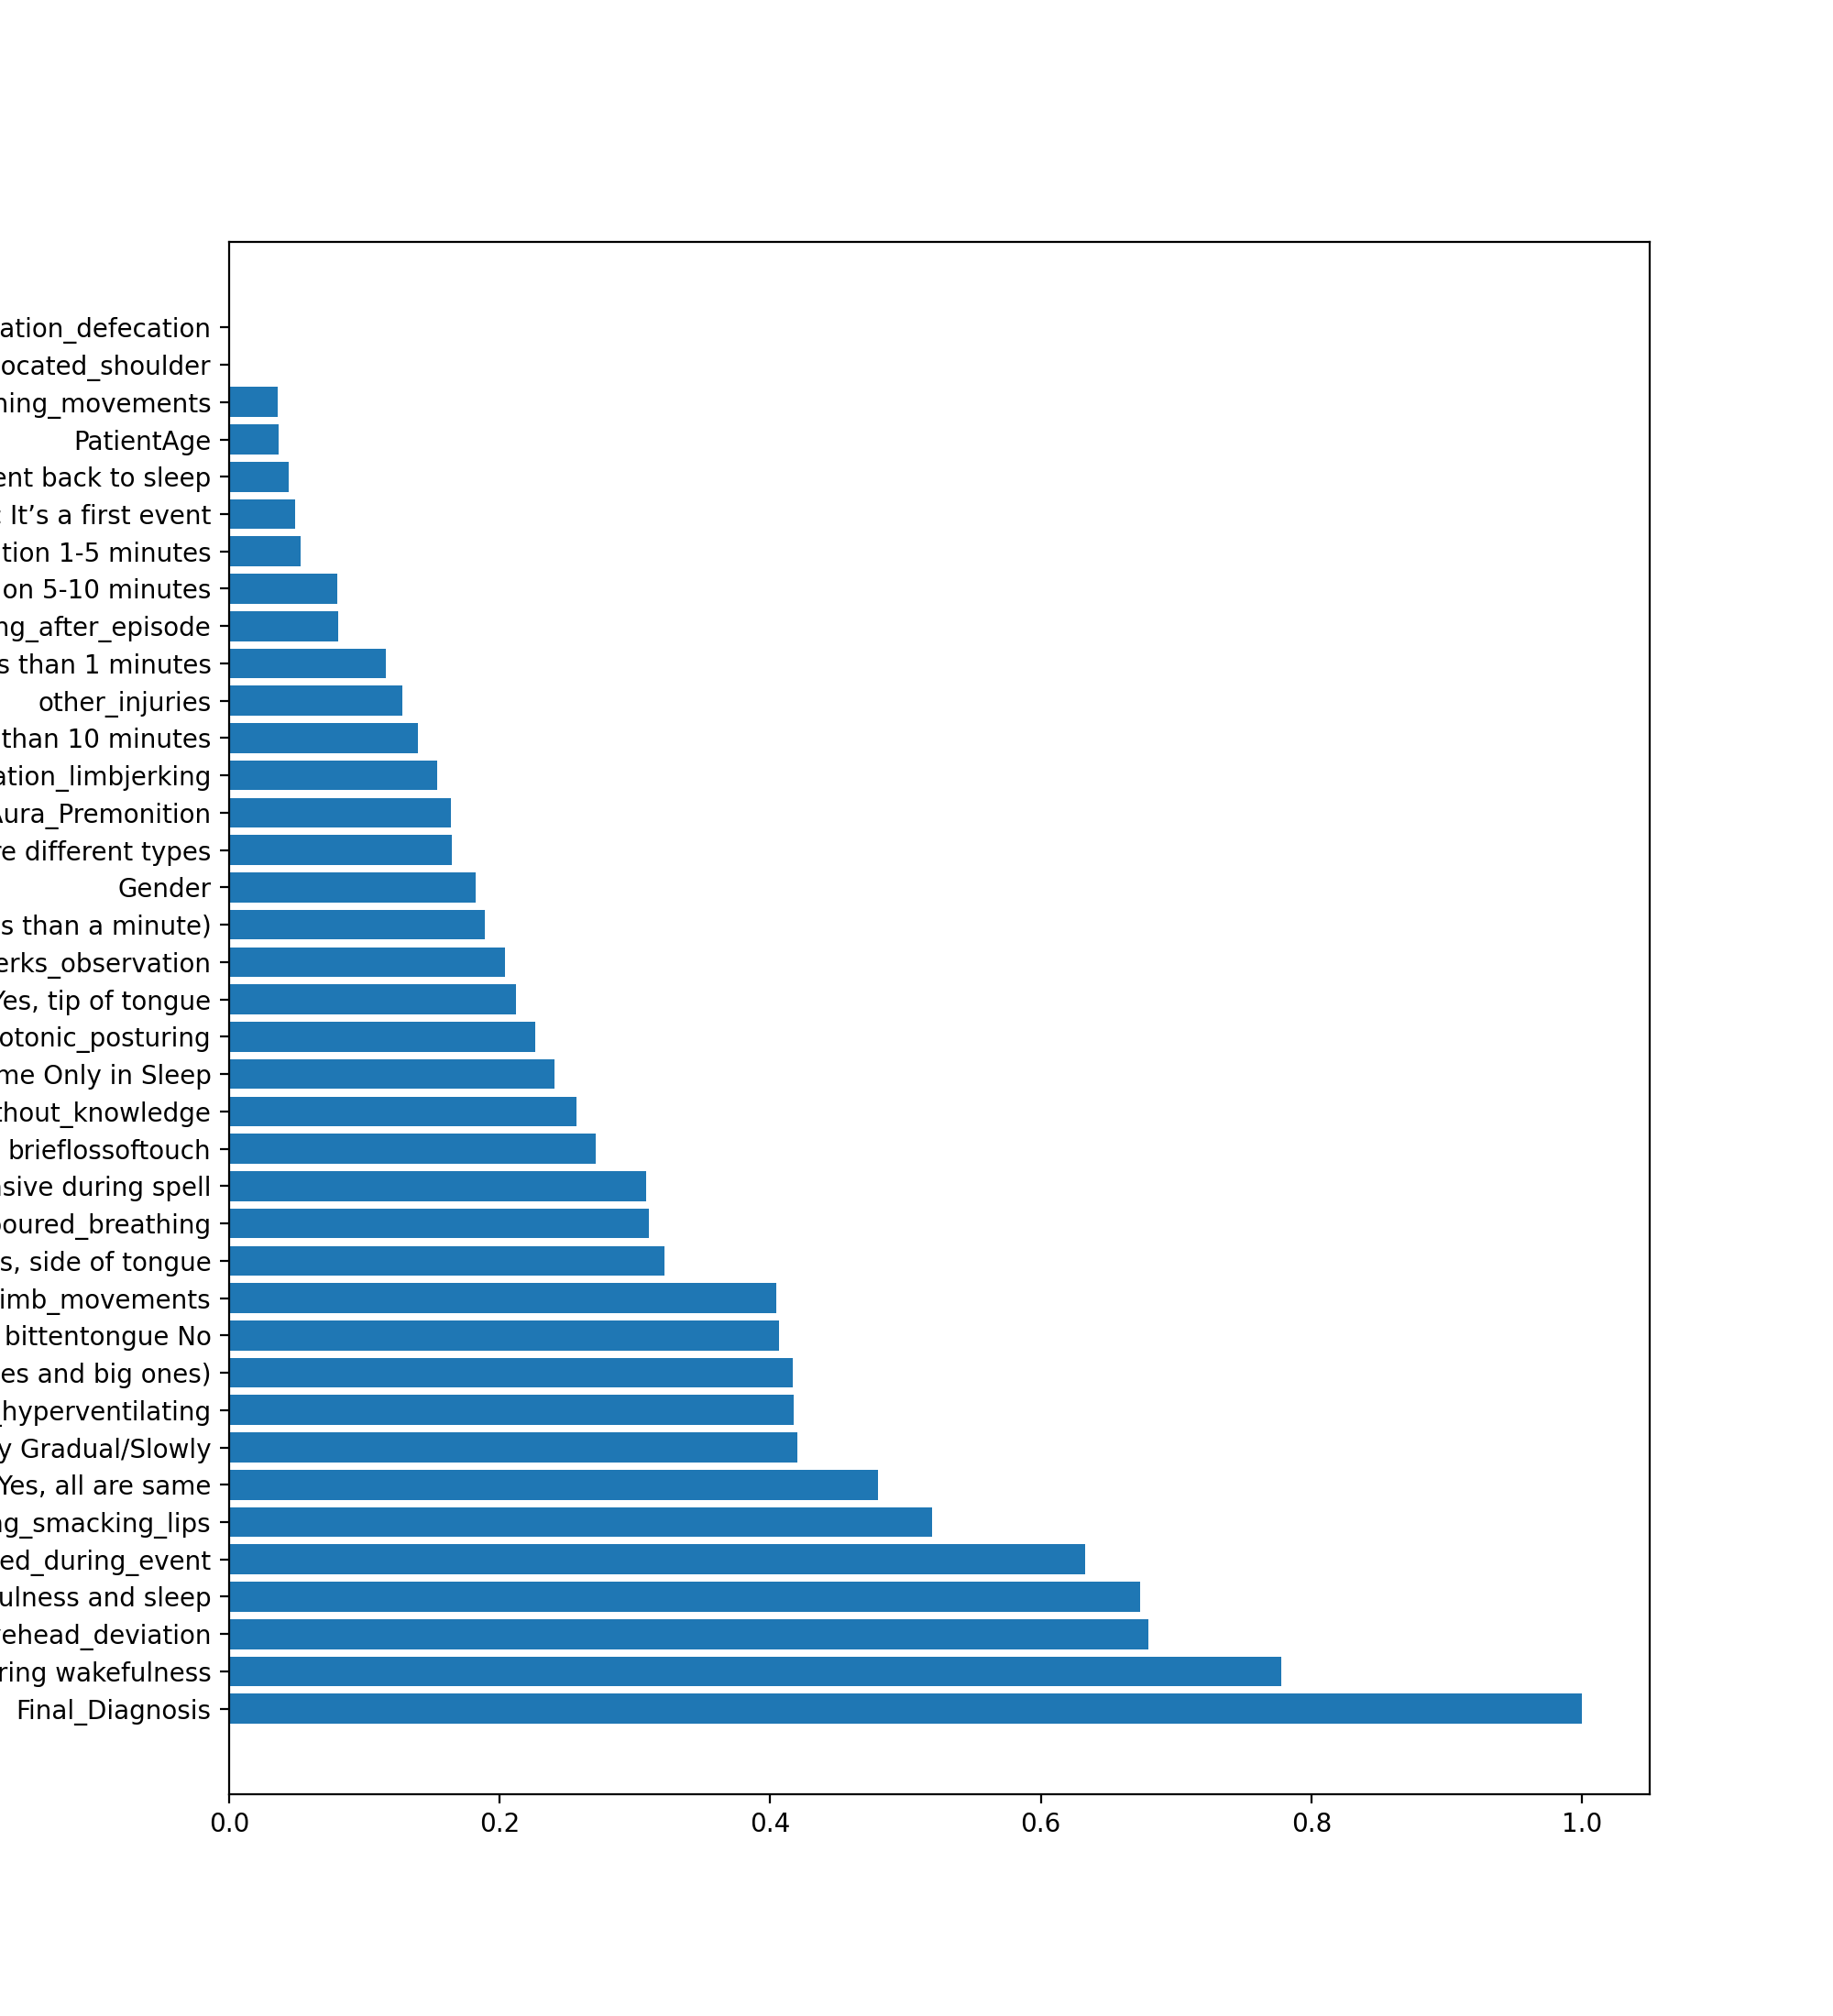

In [48]:
feature = cor_mp.keys()

print(feature)

plt.barh([feature[i] for i in range(len(feature))], cor_mp)
plt.rcParams['figure.figsize'] = [10, 11]
plt.show()

In [49]:
compare_original_smote = dict()

for k in correlations['original'].keys():
  compare_original_smote[k] = [correlations['original'][k]]

for k in correlations['smote'].keys():
  compare_original_smote[k].append(correlations['smote'][k])


In [50]:
# ask if age is relevant
less_correlation = []

for k in correlations['smote'].keys():
  if correlations['smote'][k] < 0.05:
    less_correlation.append(k)

print(less_correlation)

['PatientAge', 'loss_consciousness_after_urination_defecation', 'violent_thrashing_movements', 'dislocated_shoulder', 'Stereotypic It’s a first event', 'recovery Didn’t recover went back to sleep']


In [ ]:
# x_corr = x_train_smote.copy()
# x_corr['Final_Diagnosis'] = y_train_smote

# complete_correlation= associations(x_corr, filename= 'complete_correlation.png', figsize=(50,20))
# correlations['smote'] =(complete_correlation['corr']["Final_Diagnosis"].abs())

<Axes: title={'center': 'patient_fall_suddenly_without_limb_movements'}>

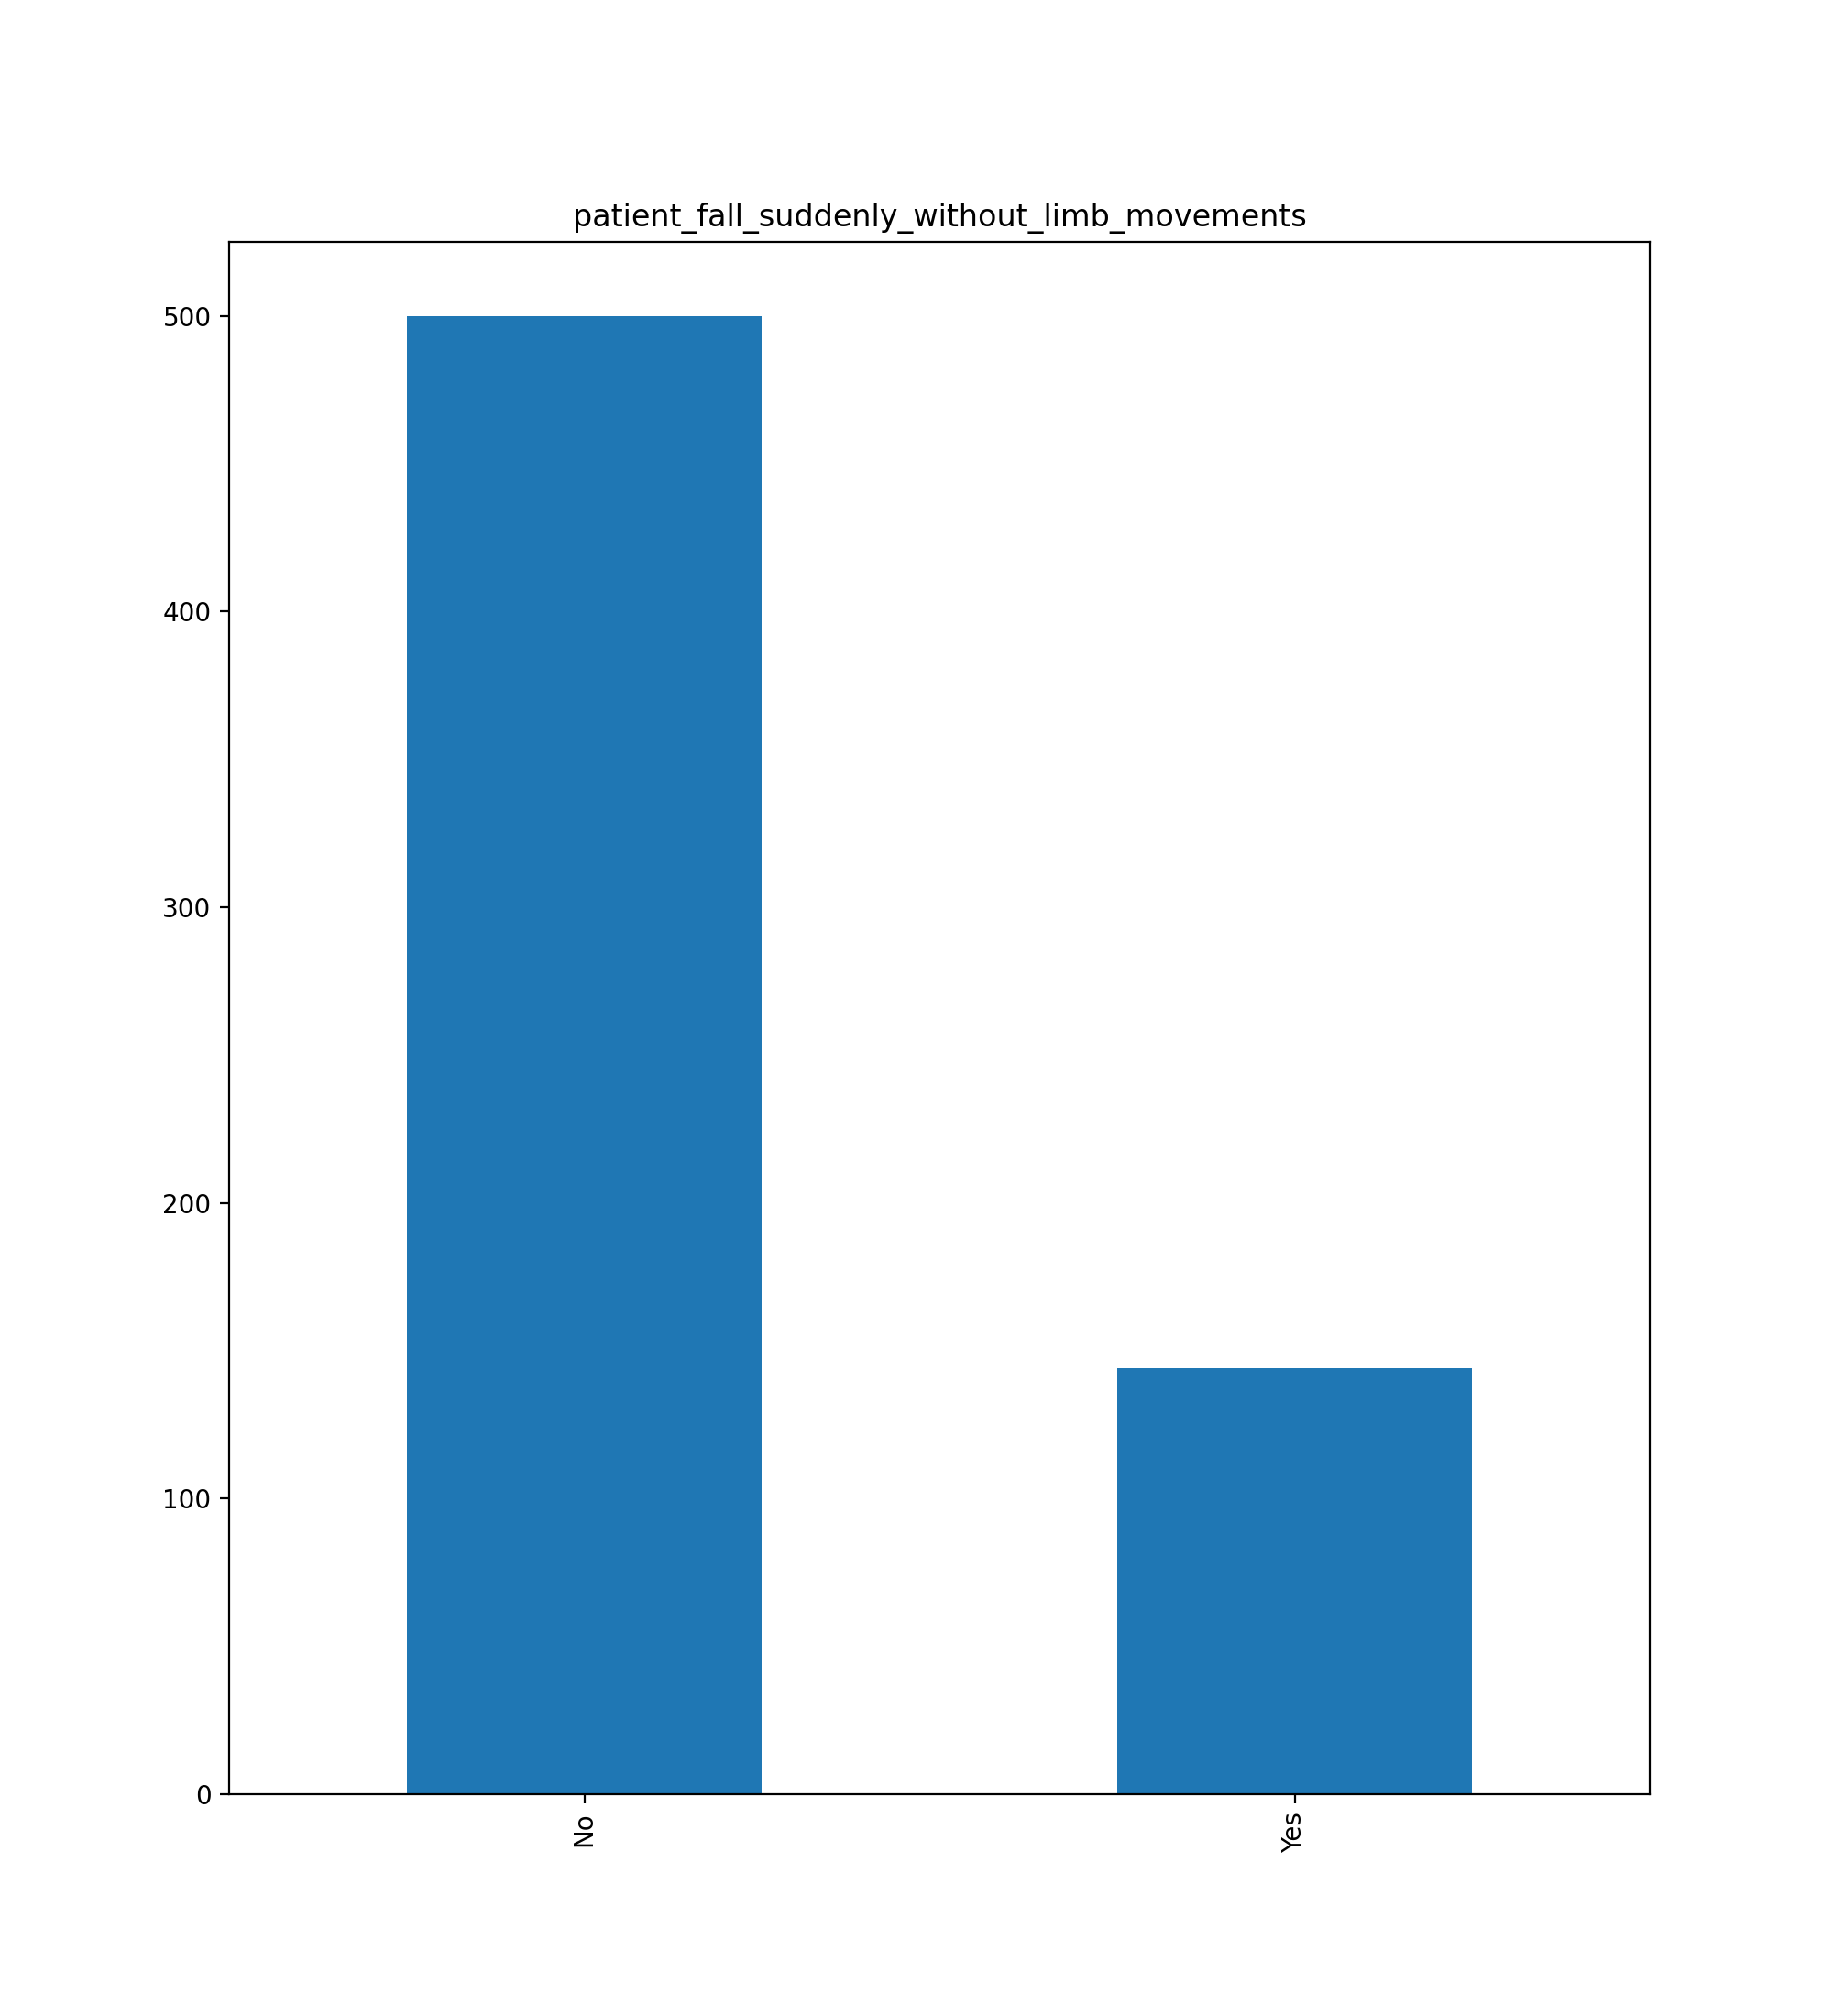

In [51]:
x_corr['patient_fall_suddenly_without_limb_movements'].value_counts().plot(kind='bar',title="patient_fall_suddenly_without_limb_movements")


<Axes: title={'center': 'weeping_before_during_after_episode'}>

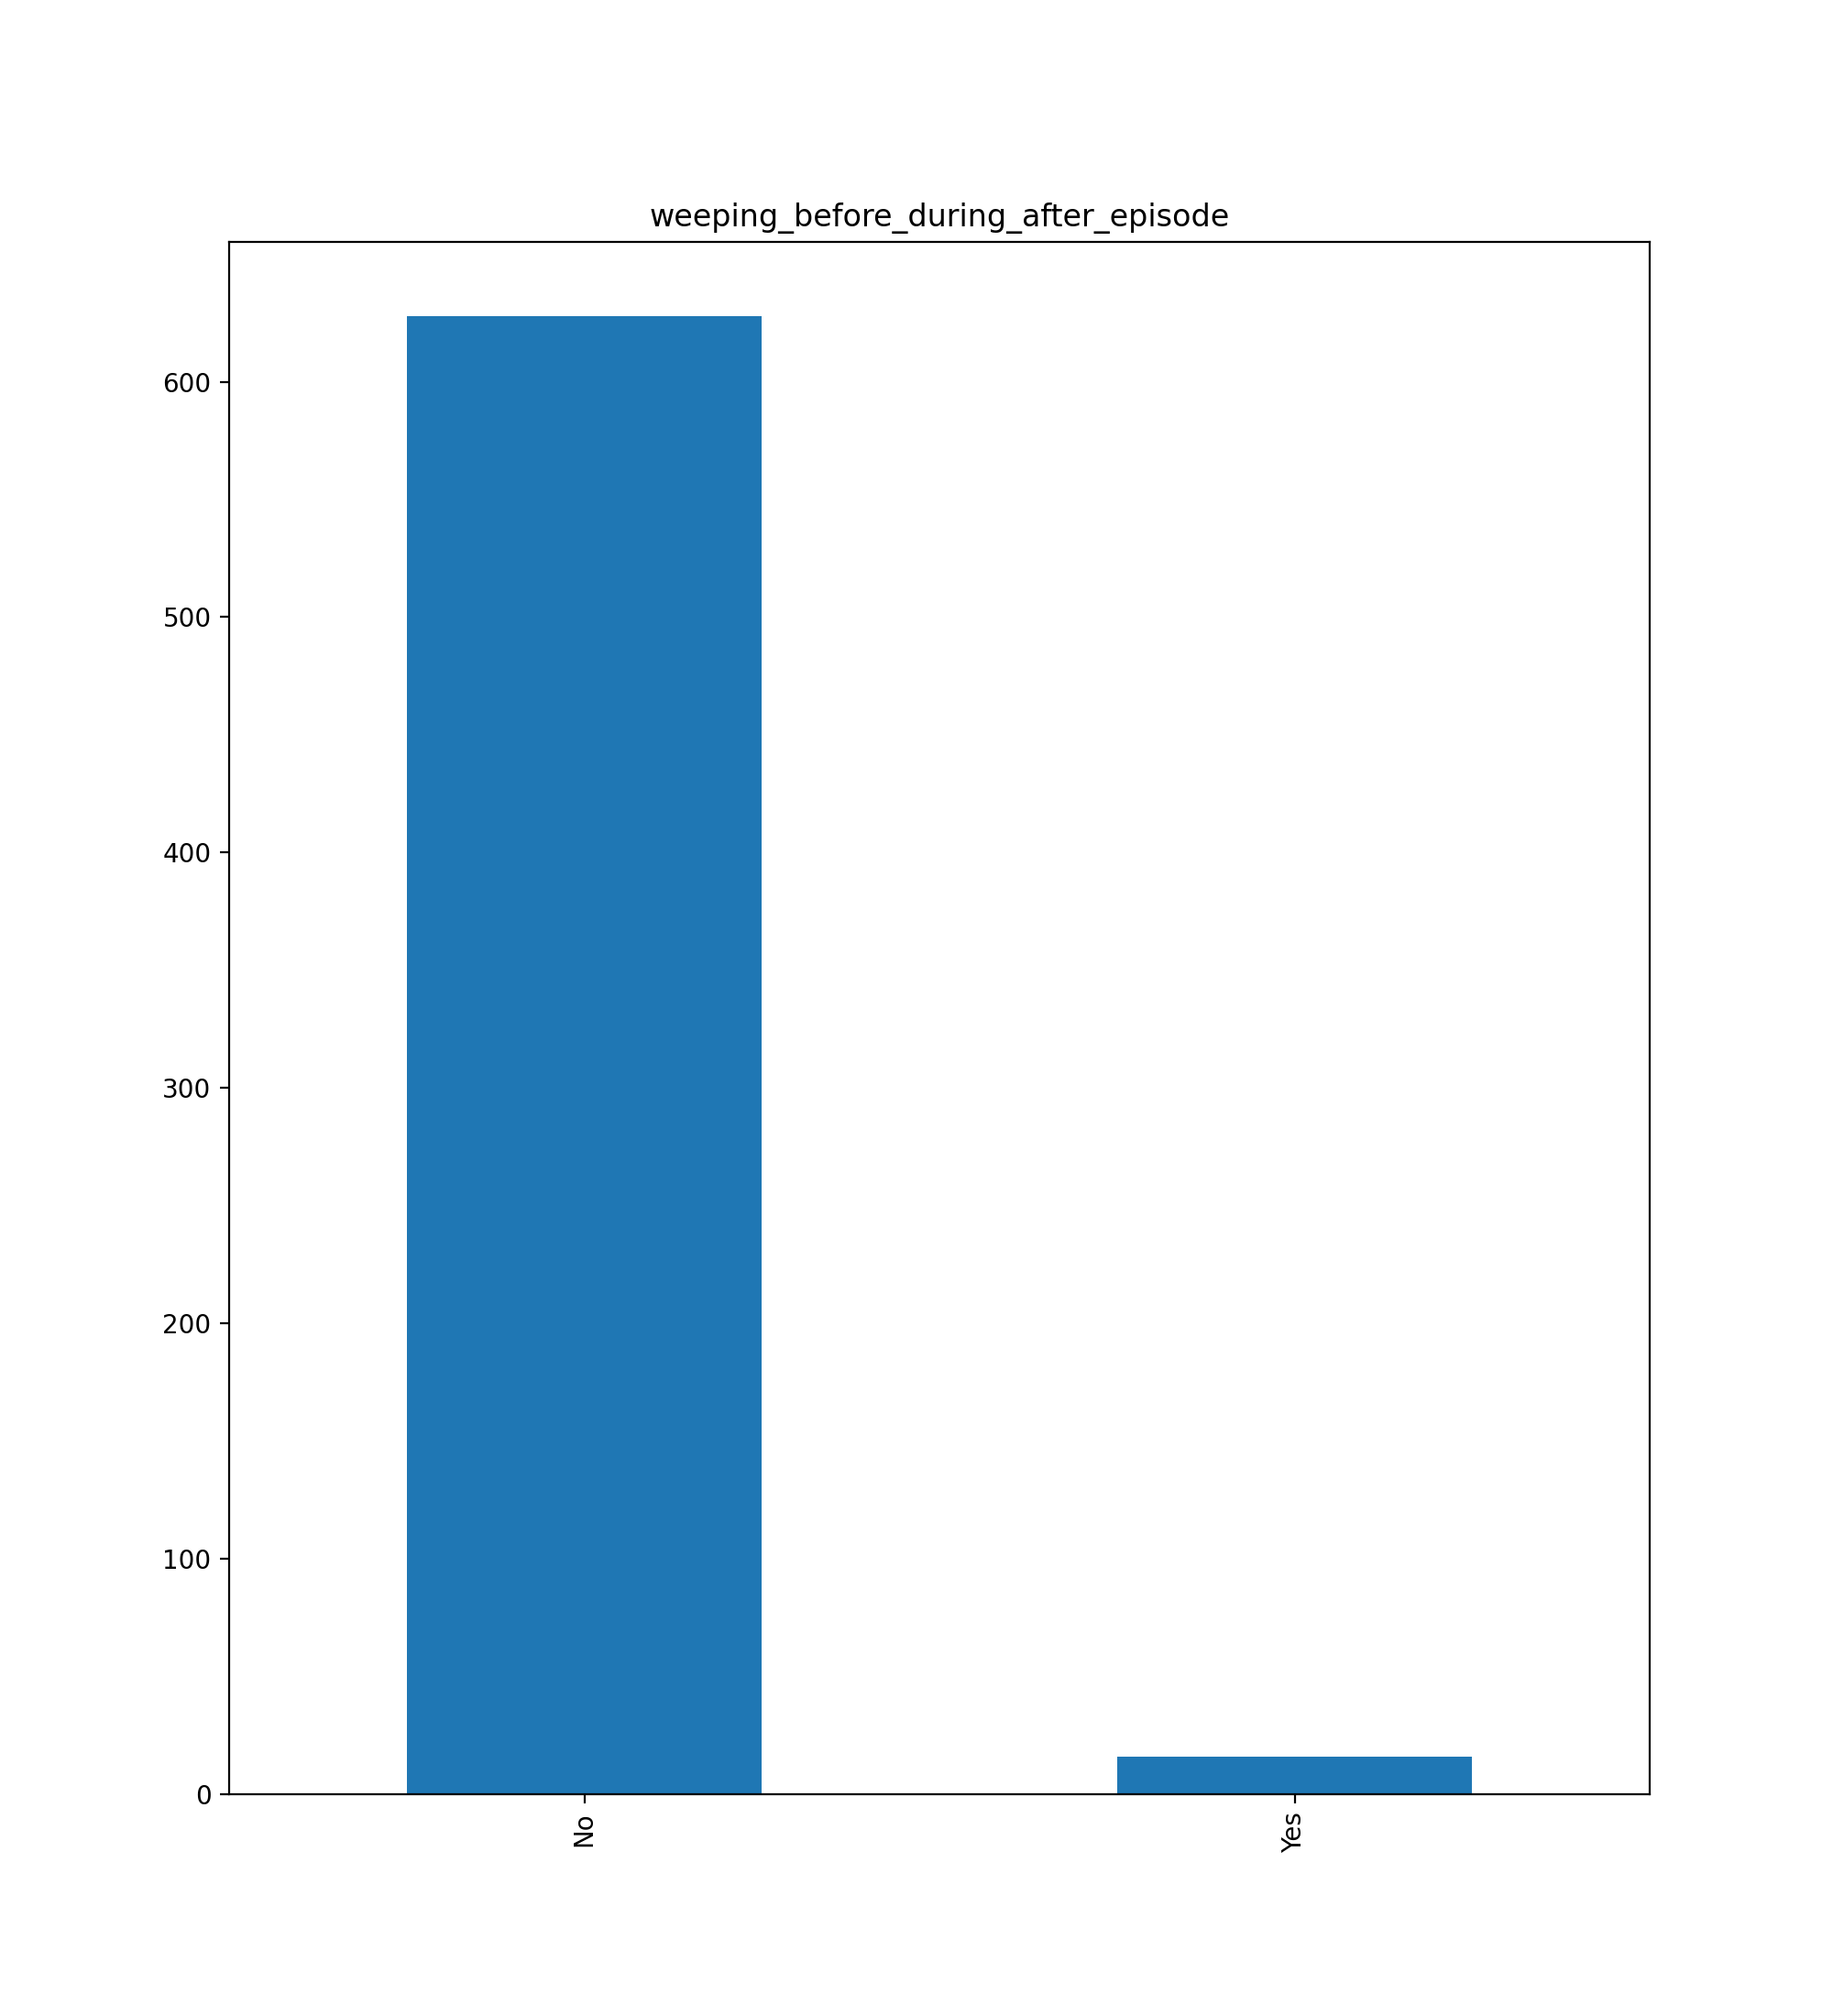

In [52]:
x_corr['weeping_before_during_after_episode'].value_counts().plot(kind='bar',title="weeping_before_during_after_episode")


In [ ]:
#x_corr['wandering_headbanging_observation'].value_counts().plot(kind='bar',title="wandering movements or headbanging observation",color = "#4CAF50")


<Axes: title={'center': 'eyes closed during occurance of event'}>

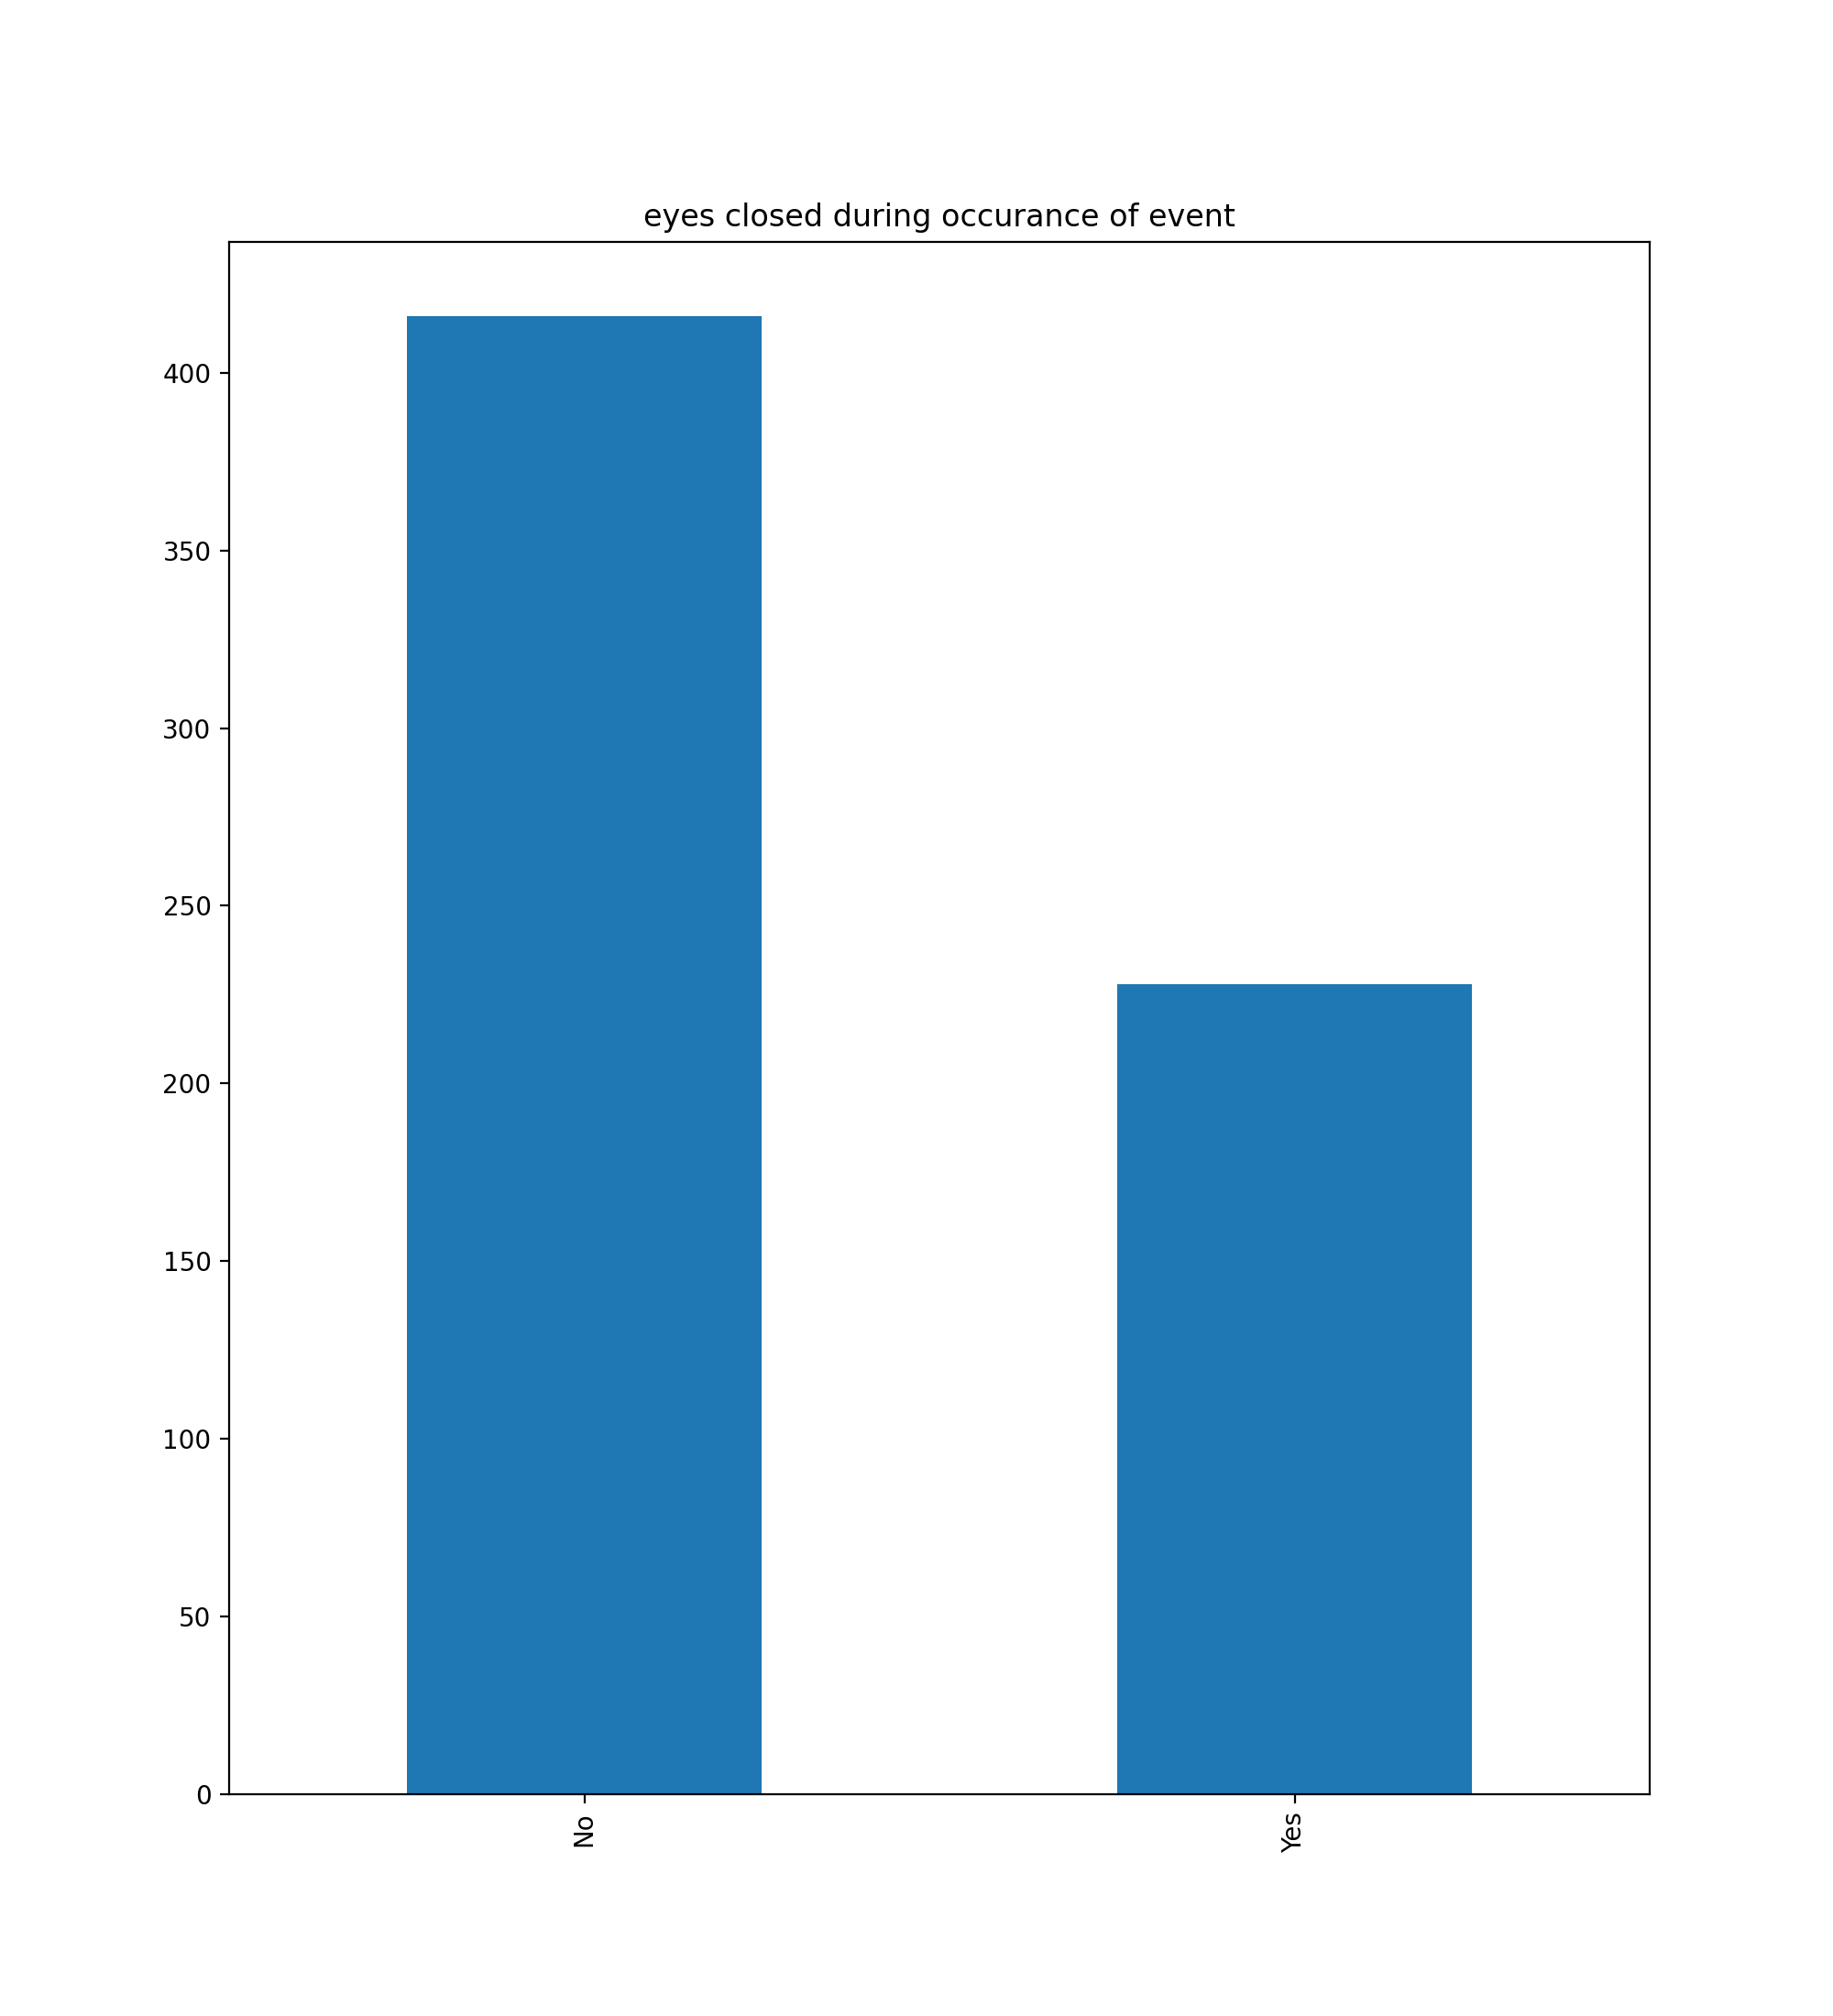

In [53]:
x_corr['eyes_closed_during_event'].value_counts().plot(kind='bar',title="eyes closed during occurance of event")


<Axes: title={'center': 'bitter tongue status of the patients'}>

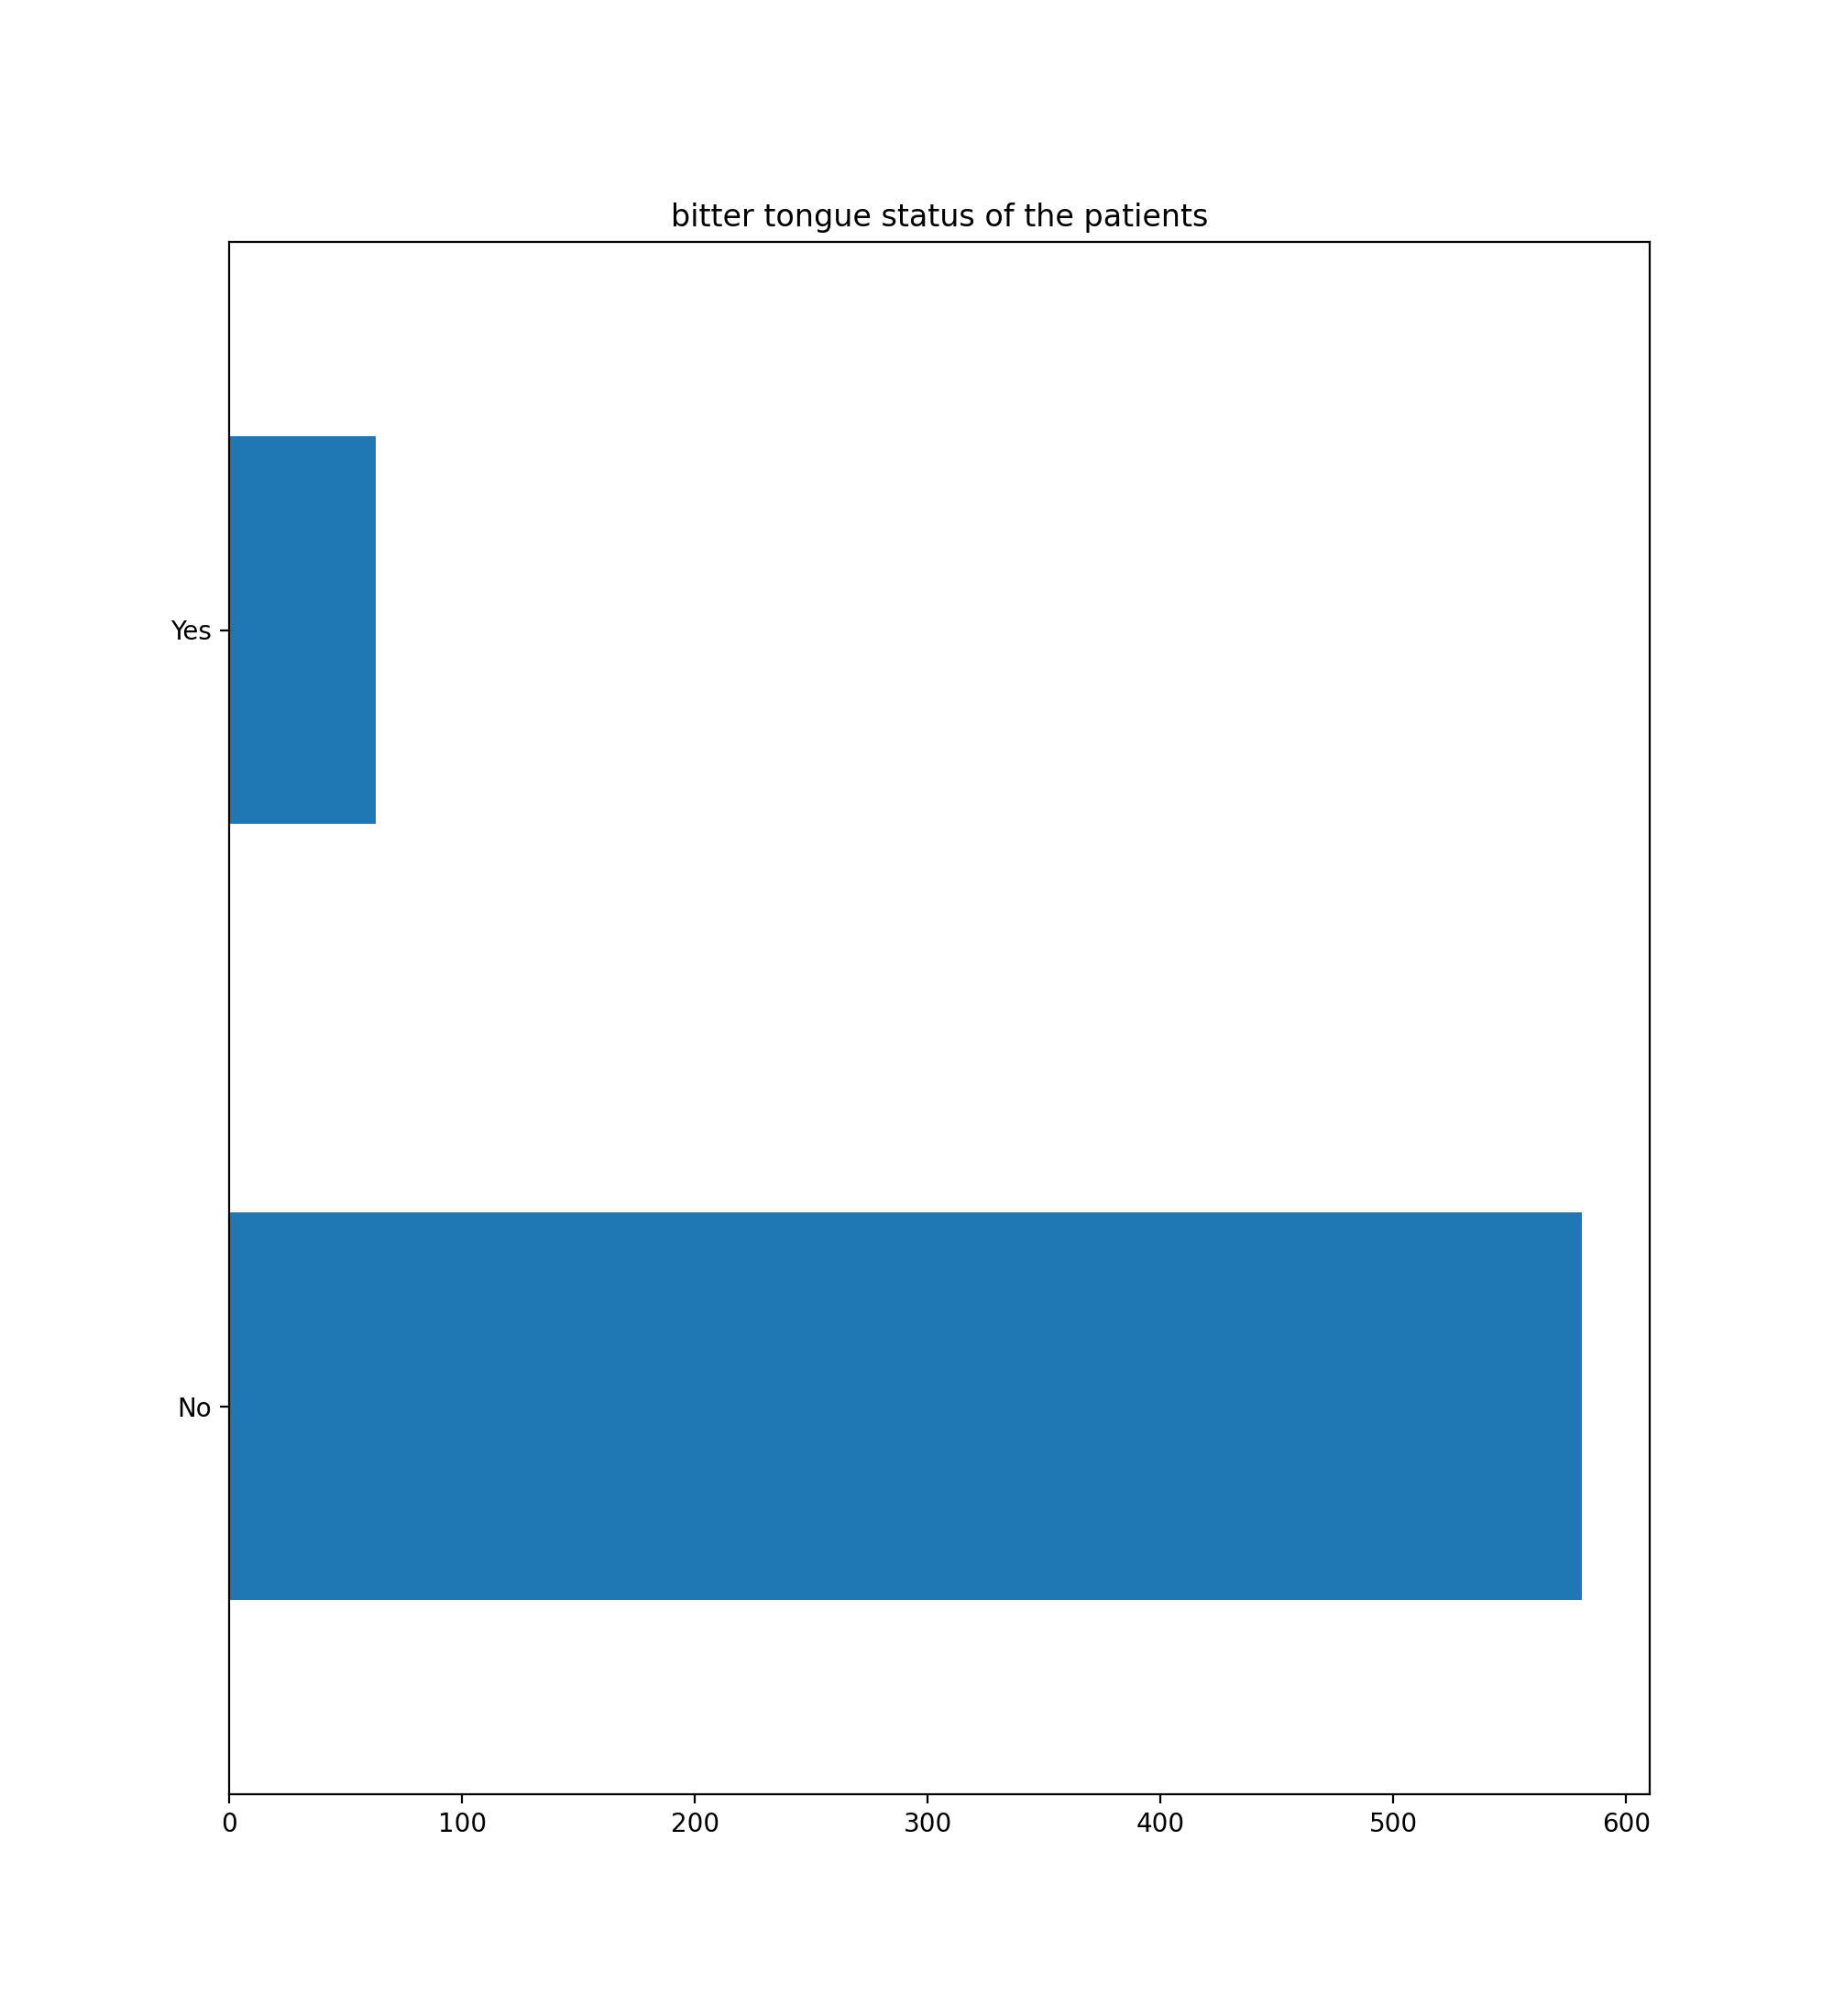

In [54]:
x_corr['bittentongue Yes, side of tongue'].value_counts().plot(kind='barh',title="bitter tongue status of the patients")

<Axes: title={'center': 'Recovery of the patients'}>

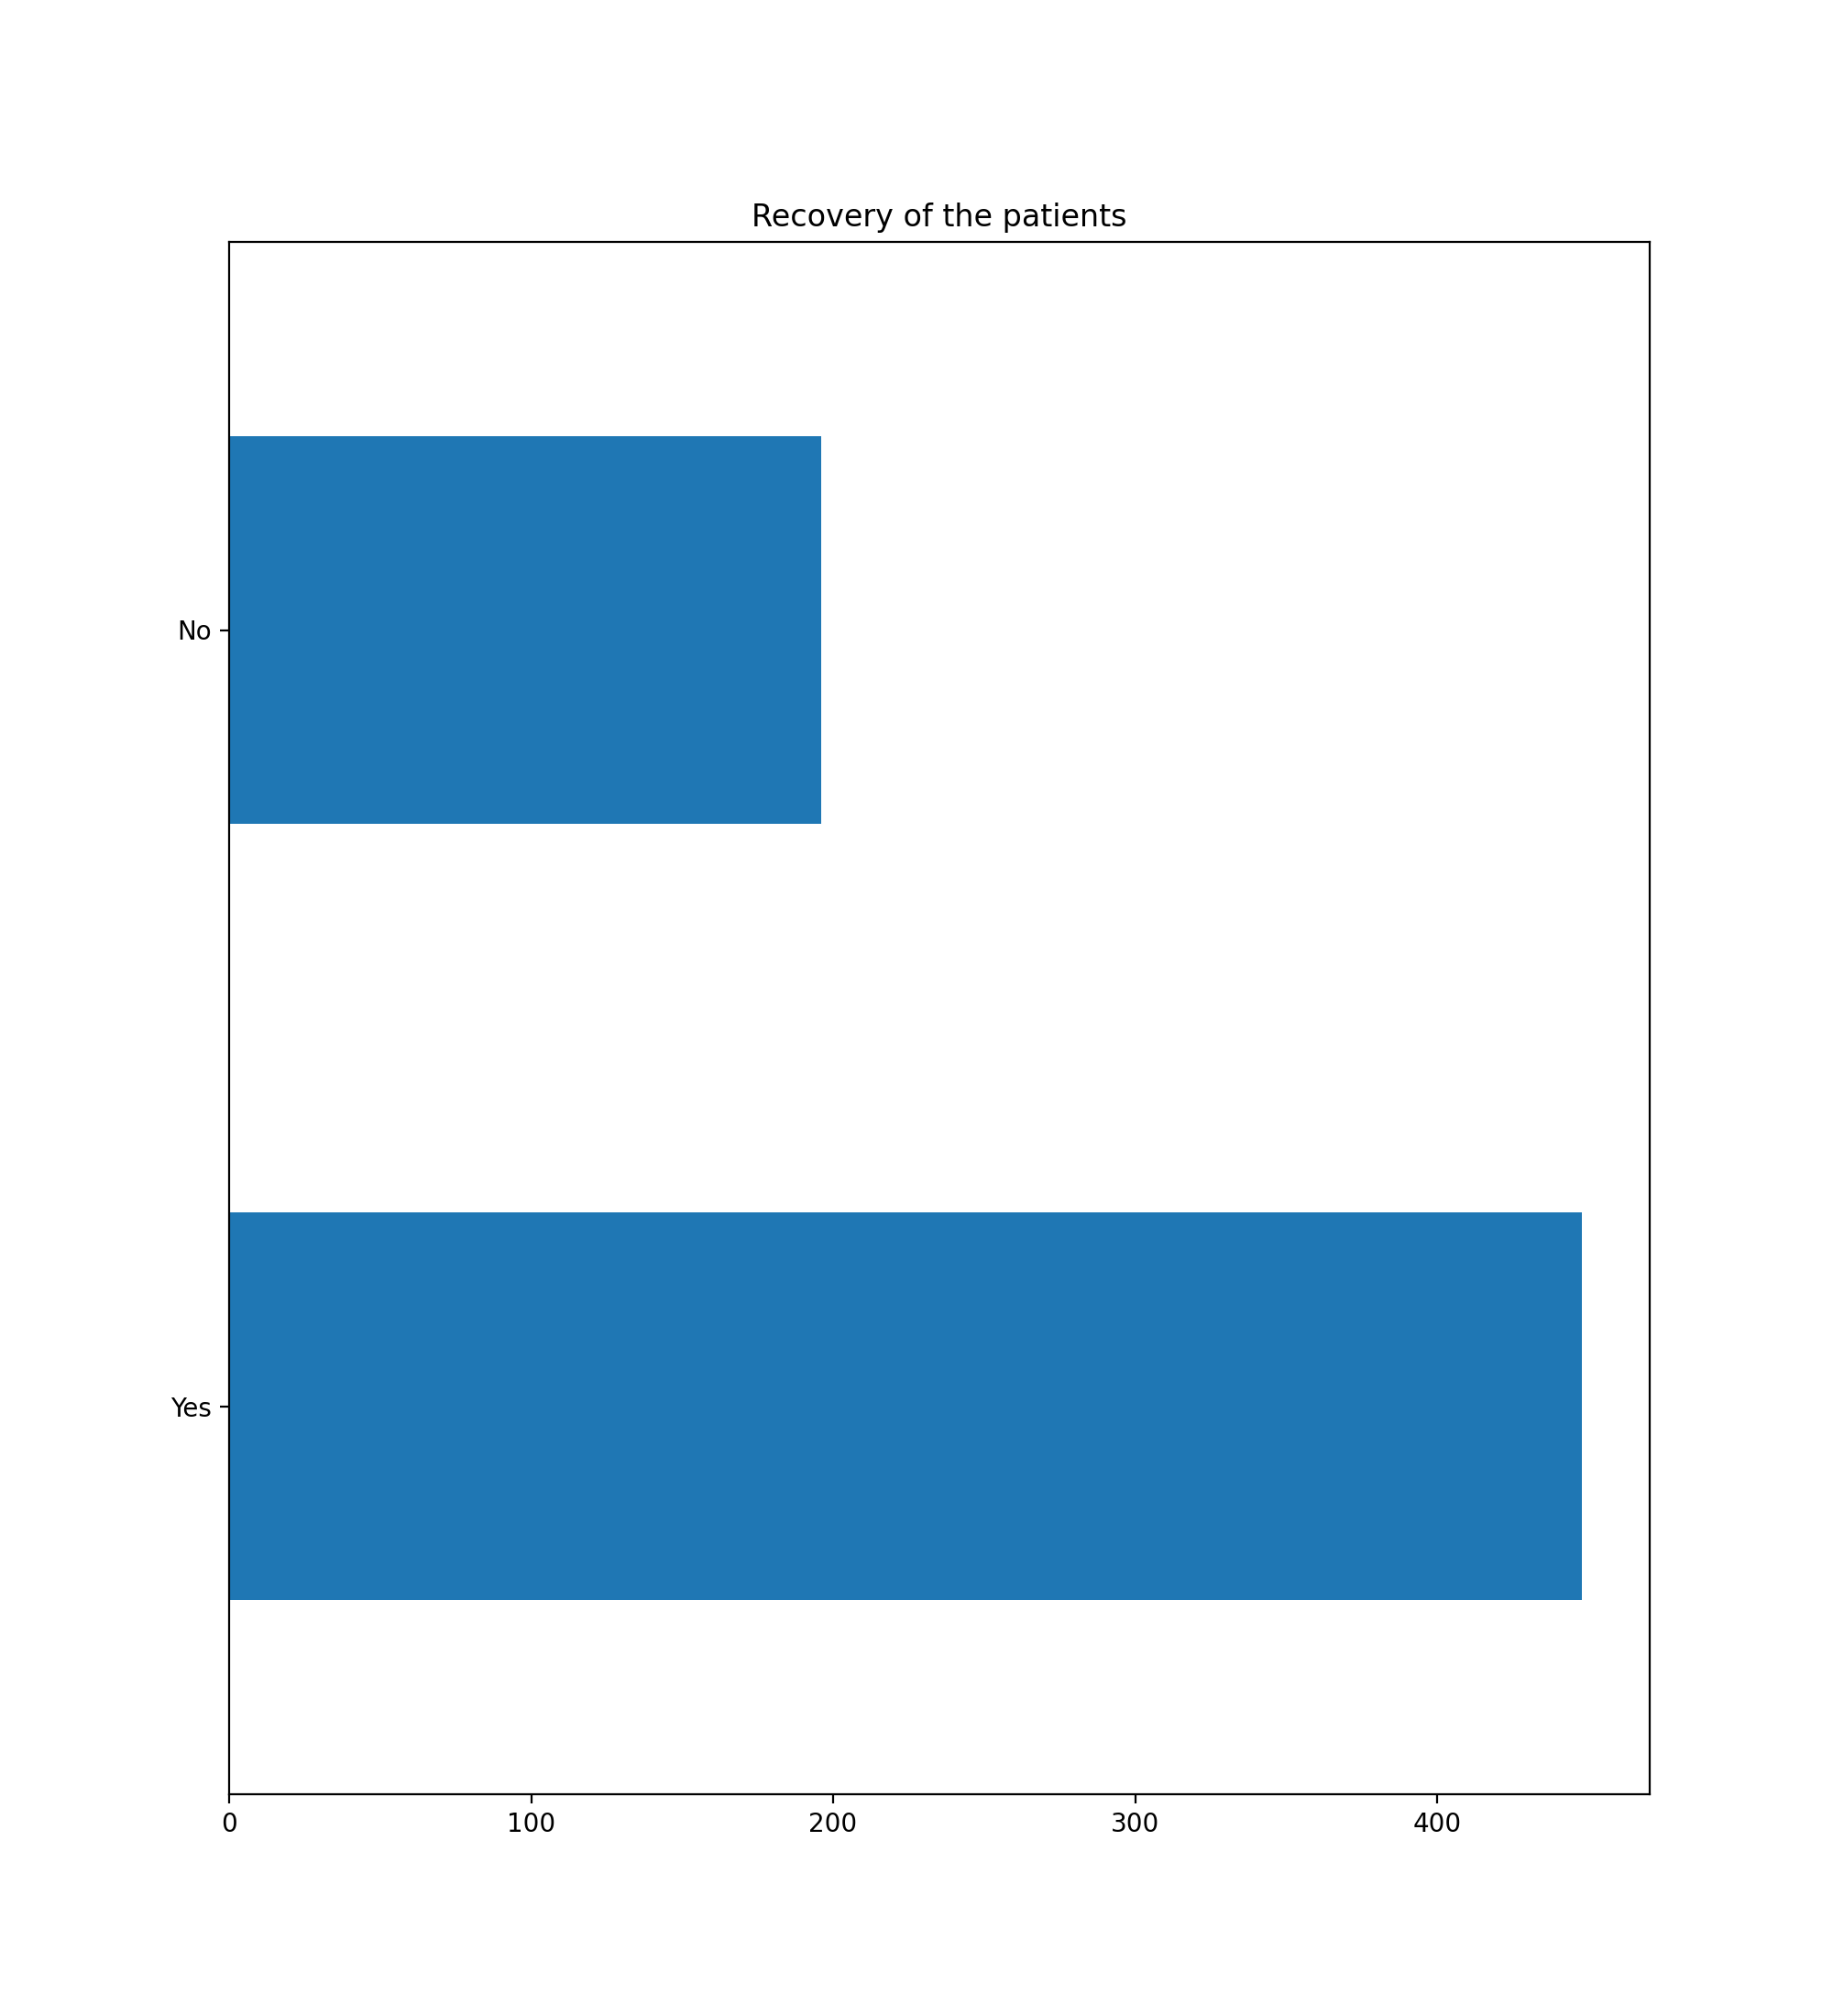

In [55]:
x_corr['recovery Gradual/Slowly'].value_counts().plot(kind='barh',title="Recovery of the patients")

<Axes: title={'center': 'Final Diagnosis'}>

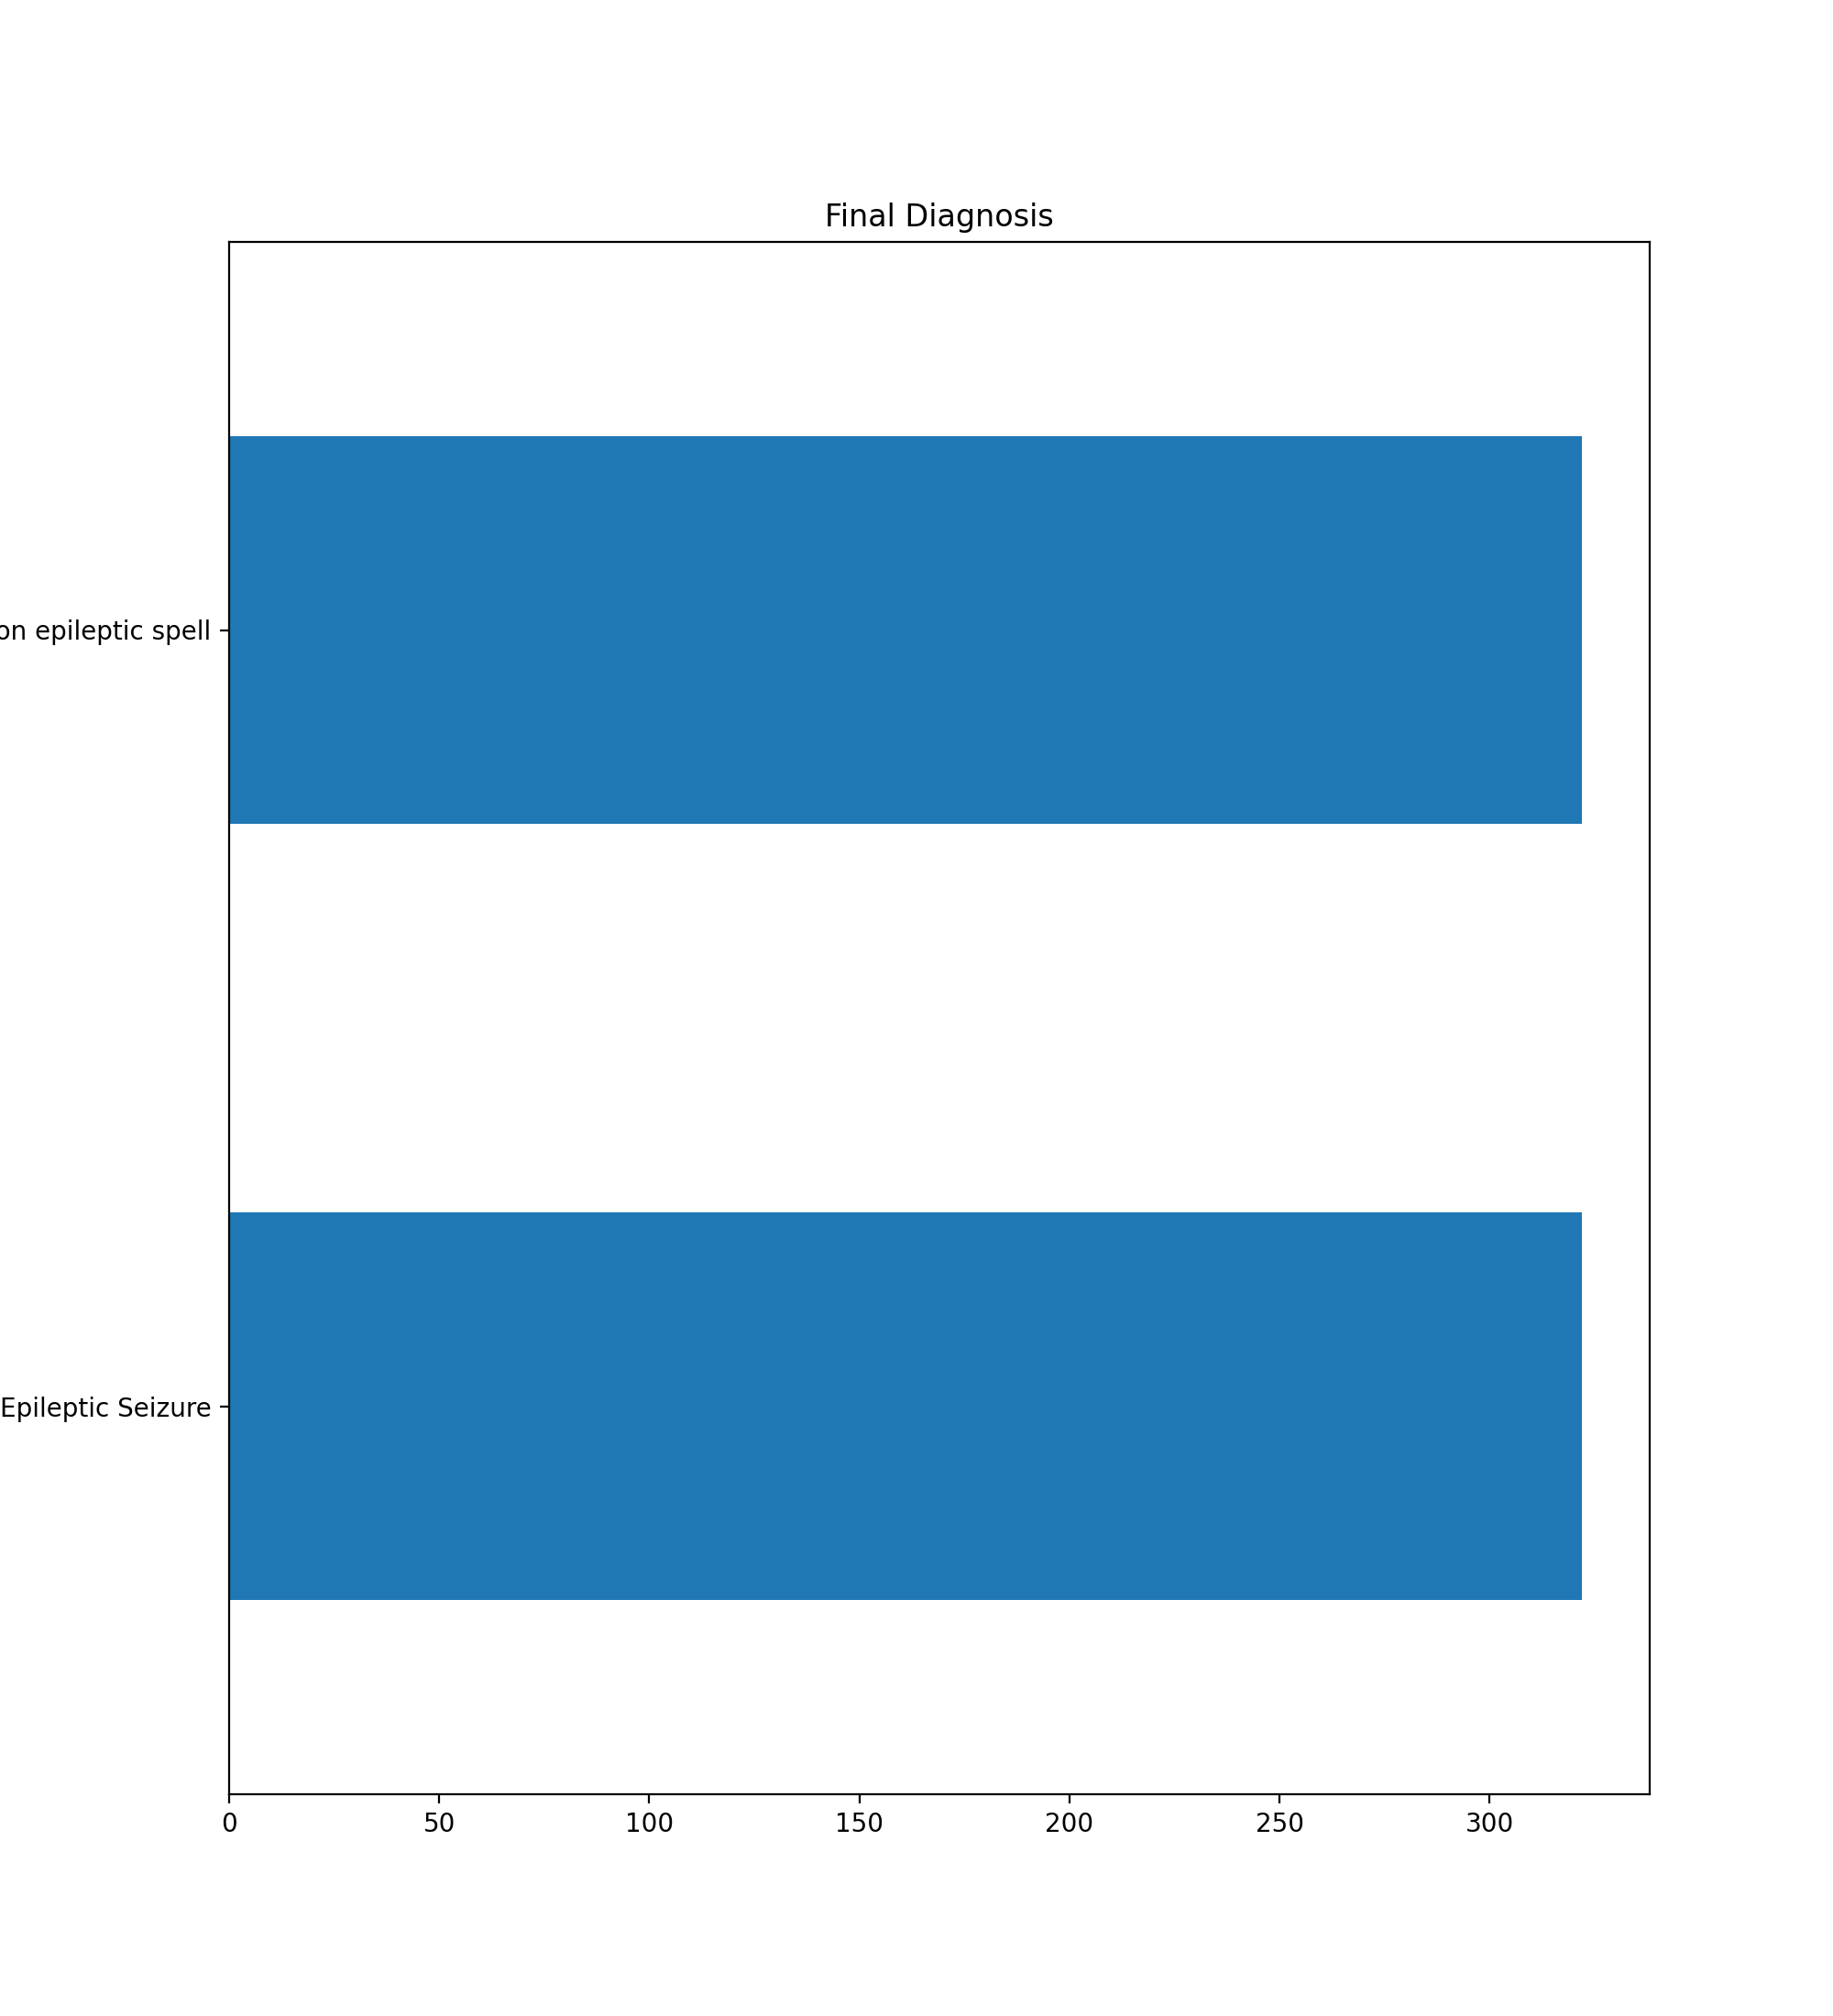

In [56]:
x_corr['Final_Diagnosis'].value_counts().plot(kind='barh',title="Final Diagnosis")

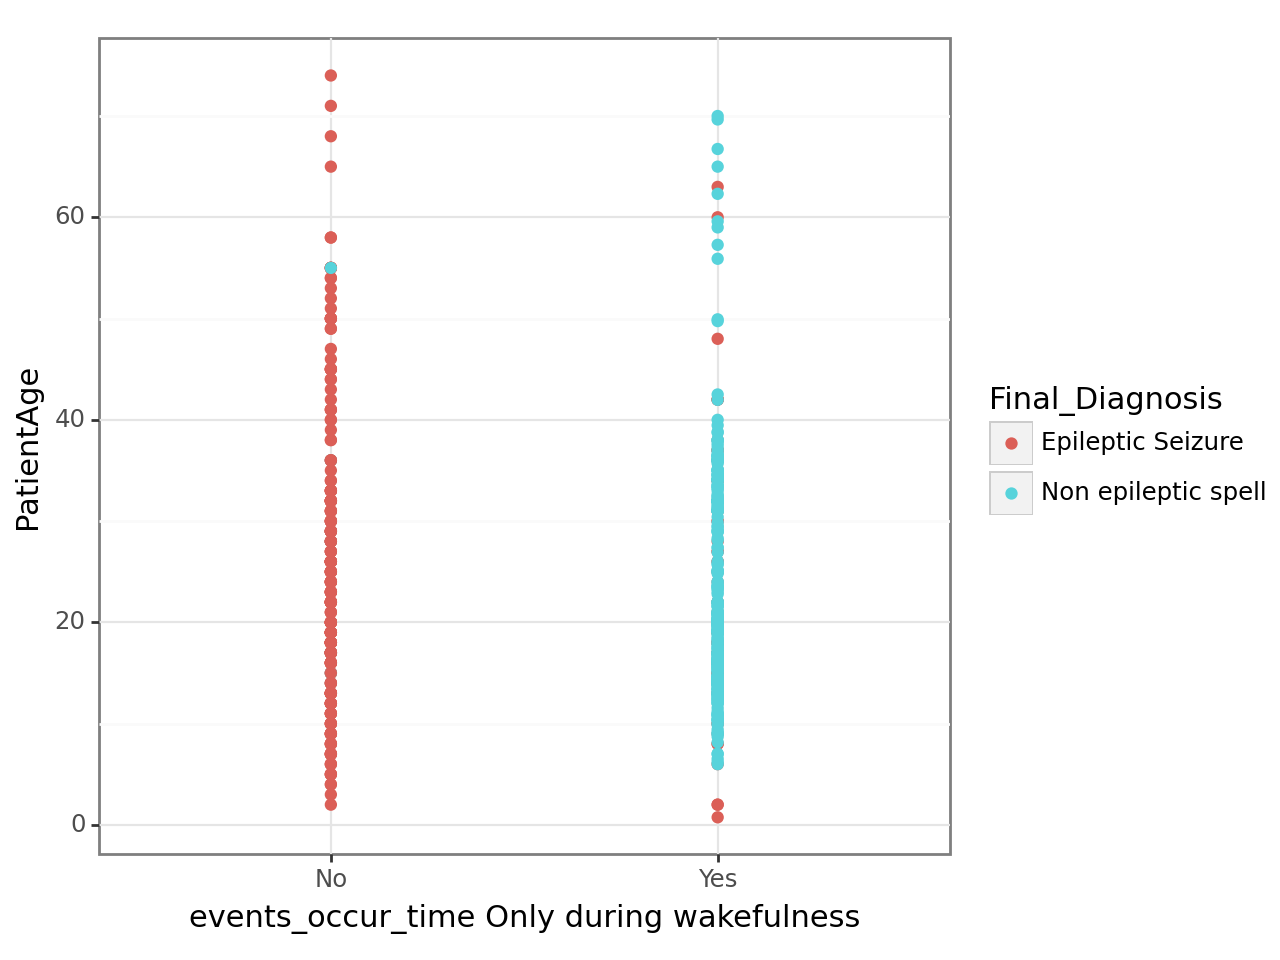

In [57]:
print(
    p9.ggplot(x_corr, p9.aes(x='events_occur_time Only during wakefulness', y='PatientAge')) +
    p9.geom_point(p9.aes(color='Final_Diagnosis')) +
    p9.theme_bw())

In [58]:
#mapping xtraining data
import string

numeric_col=['PatientAge']

numeric_mappings = {}
columns = list(x_train)

#print(columns)
for c in numeric_col:
  if c in columns:
    columns.remove(c)

for col in columns:
  rowval=set()
  for j in x_train[col]:
    rowval.add(j)

  enumval=[k for k in range(len(rowval))]
  x_train[col].replace(list(rowval),enumval,inplace =True)
  x_train_smote[col].replace(list(rowval),enumval,inplace =True)
  x_test[col].replace(list(rowval),enumval,inplace =True)

  ind = 0
  for rowvals in rowval:
    numeric_mappings[rowvals] = enumval[ind]
    ind+=1



In [59]:
x_train_smote

PatientAge  Gender  eyes_closed_during_event  \
0     39.000000       1                         0   
1     24.000000       1                         0   
2      6.000000       0                         0   
3     18.000000       1                         0   
4     31.000000       1                         0   
..          ...     ...                       ...   
639   59.597481       0                         0   
640    9.886103       1                         1   
641   23.470074       0                         0   
642   18.612575       0                         1   
643   21.579484       0                         1   

     weeping_before_during_after_episode  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
..                                   ...   
639                                    0   
640                                    0   
641                                    0   
642                                    0   
643                                    0   

     patient_fall_suddenly_without_limb_movements  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
..                                            ...   
639                                             0   
640                                             1   
641                                             1   
642                                             1   
643                                             1   

     Was_patient_hyperventilating  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   
..                            ...   
639                             0   
640                             0   
641                             1   
642                             1   
643                             1   

     loss_consciousness_after_urination_defecation  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
639                                              0   
640                                              0   
641                                              0   
642                                              0   
643                                              0   

     side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                                    0                   
1                                                    0                   
2                                                    0                   
3                                                    0                   
4                                                    0                   
..                                                 ...                   
639                                                  0                   
640                                                  0                   
641                                                  0                   
642                                                  0                   
643                                                  0                   

     observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                          0                                                0   
1                          0                             

In [60]:
#numeric mapping y column
# mapping to numerical value
numeric_mappings = {}

for col in y_train:
  rowval=set()
  for j in y_train:
    rowval.add(j)

  enumval=[k for k in range(len(rowval))]
  ind = 0
  for rowvals in rowval:
    numeric_mappings[rowvals] = enumval[ind]
    ind+=1
  y_train = [numeric_mappings[v] for v in y_train]
  y_train_smote = [numeric_mappings[v] for v in y_train_smote]
  y_test = [numeric_mappings[v] for v in y_test]


In [ ]:
# accuracy_dict={
#     'Random Forest':list(),
#     'Logistic Regression':list(),
#     'SVC':list(),
#     'Decision Tree':list(),
#     'KNN':list()}

In [61]:
x_test_df = x_test.copy()
# x_test_df['Final_Diagnosis'] = y_train
x_test_df.to_excel("/content/Testing_data.xlsx")

In [62]:
x_train_df = x_train_smote.copy()
#x_train_df['Final_Diagnosis'] = y_train
x_train_df.to_excel("/content/Training data.xlsx")

In [ ]:
#xgb after balanced
# plot feature importance using built-in function
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot

# model = XGBClassifier()
# model.fit(x_train_smote, y_train_smote)
# # plot feature importance
# correlations['fscore']=model.feature_importances_
# plot_importance(model)
# pyplot.rcParams['figure.figsize'] = [10, 10]
# pyplot.show()
# xbg before balacing
# model = XGBClassifier()
# model.fit(x_train, y_train)

# correlations['fscore']=model.feature_importances_
# plot_importance(model)
# pyplot.rcParams['figure.figsize'] = [10, 10]
# pyplot.show()

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train, y_train)


SelectKBest(k='all', score_func=<function chi2 at 0x7a941322acb0>)

In [64]:
fs.scores_

array([3.10392265e-01, 3.29716485e+00, 1.13831763e+02, 2.58552019e+01,
       5.12521707e+01, 7.67529816e+01, 7.08113970e+00, 5.29714089e+01,
       2.57606034e+01, 1.31925466e+01, 4.91731906e+00, 6.46096219e+00,
       1.68651935e+00, 2.61587313e+01, 4.05686365e+01, 9.93986000e-01,
       7.98407072e+00, 9.97239476e-03, 4.21347556e-01, 1.94411910e+00,
       7.35541753e-01, 7.54721909e+00, 2.58552019e+01, 1.37520704e+00,
       1.03405347e+01, 2.02029413e+01, 1.99447895e-02, 5.76288628e+00,
       3.68370915e+01, 8.33765171e+01, 8.94409938e-01, 5.94808018e+01,
       1.45124407e+01, 2.32563626e+01, 6.30704619e+00, 5.35221552e+00,
       1.40869565e+01])

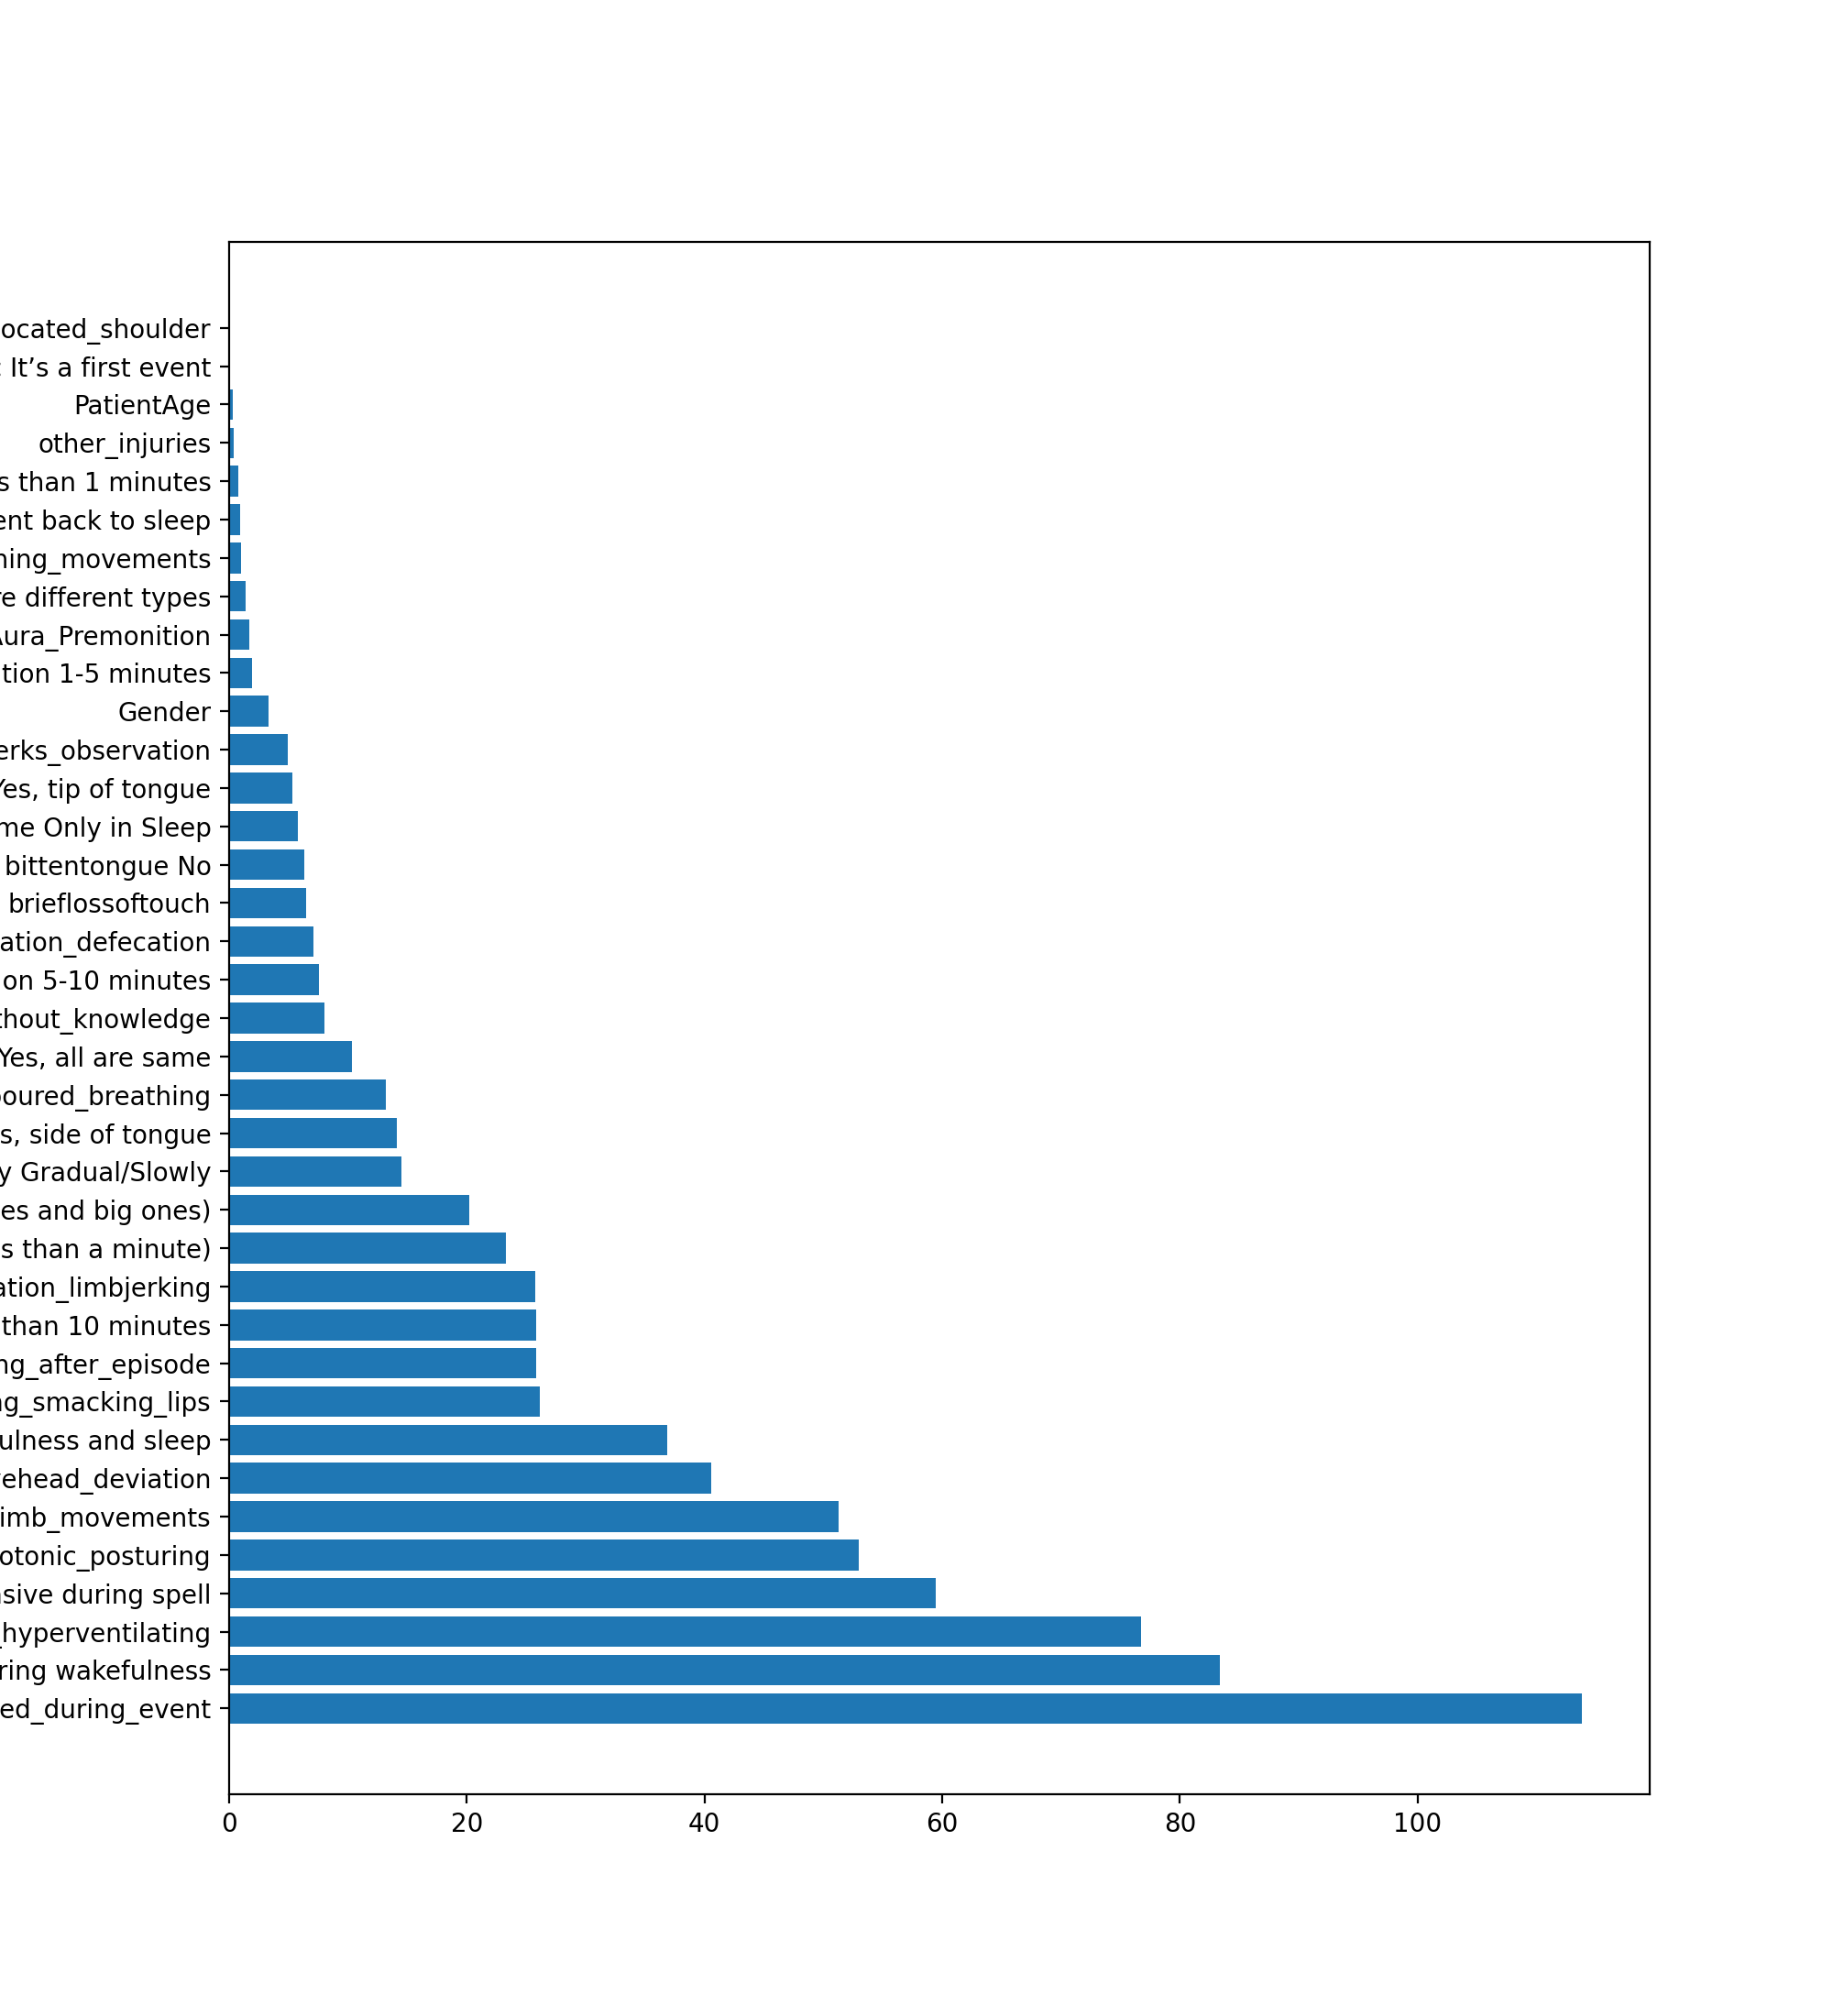

In [65]:
from matplotlib import pyplot
feature = []
for f in x_train.keys():
  feature.append(f)

f_mp = pd.Series()

for i in range(len(feature)):
  f_mp[feature[i]] = fs.scores_[i]

f_mp = f_mp.sort_values(ascending = False)

sc = []
feature = []

for k in f_mp.keys():
  feature.append(k)
  sc.append(f_mp[k])

pyplot.barh([feature[i] for i in range(len(fs.scores_))], sc)
pyplot.rcParams['figure.figsize'] = [10, 10]
pyplot.show()

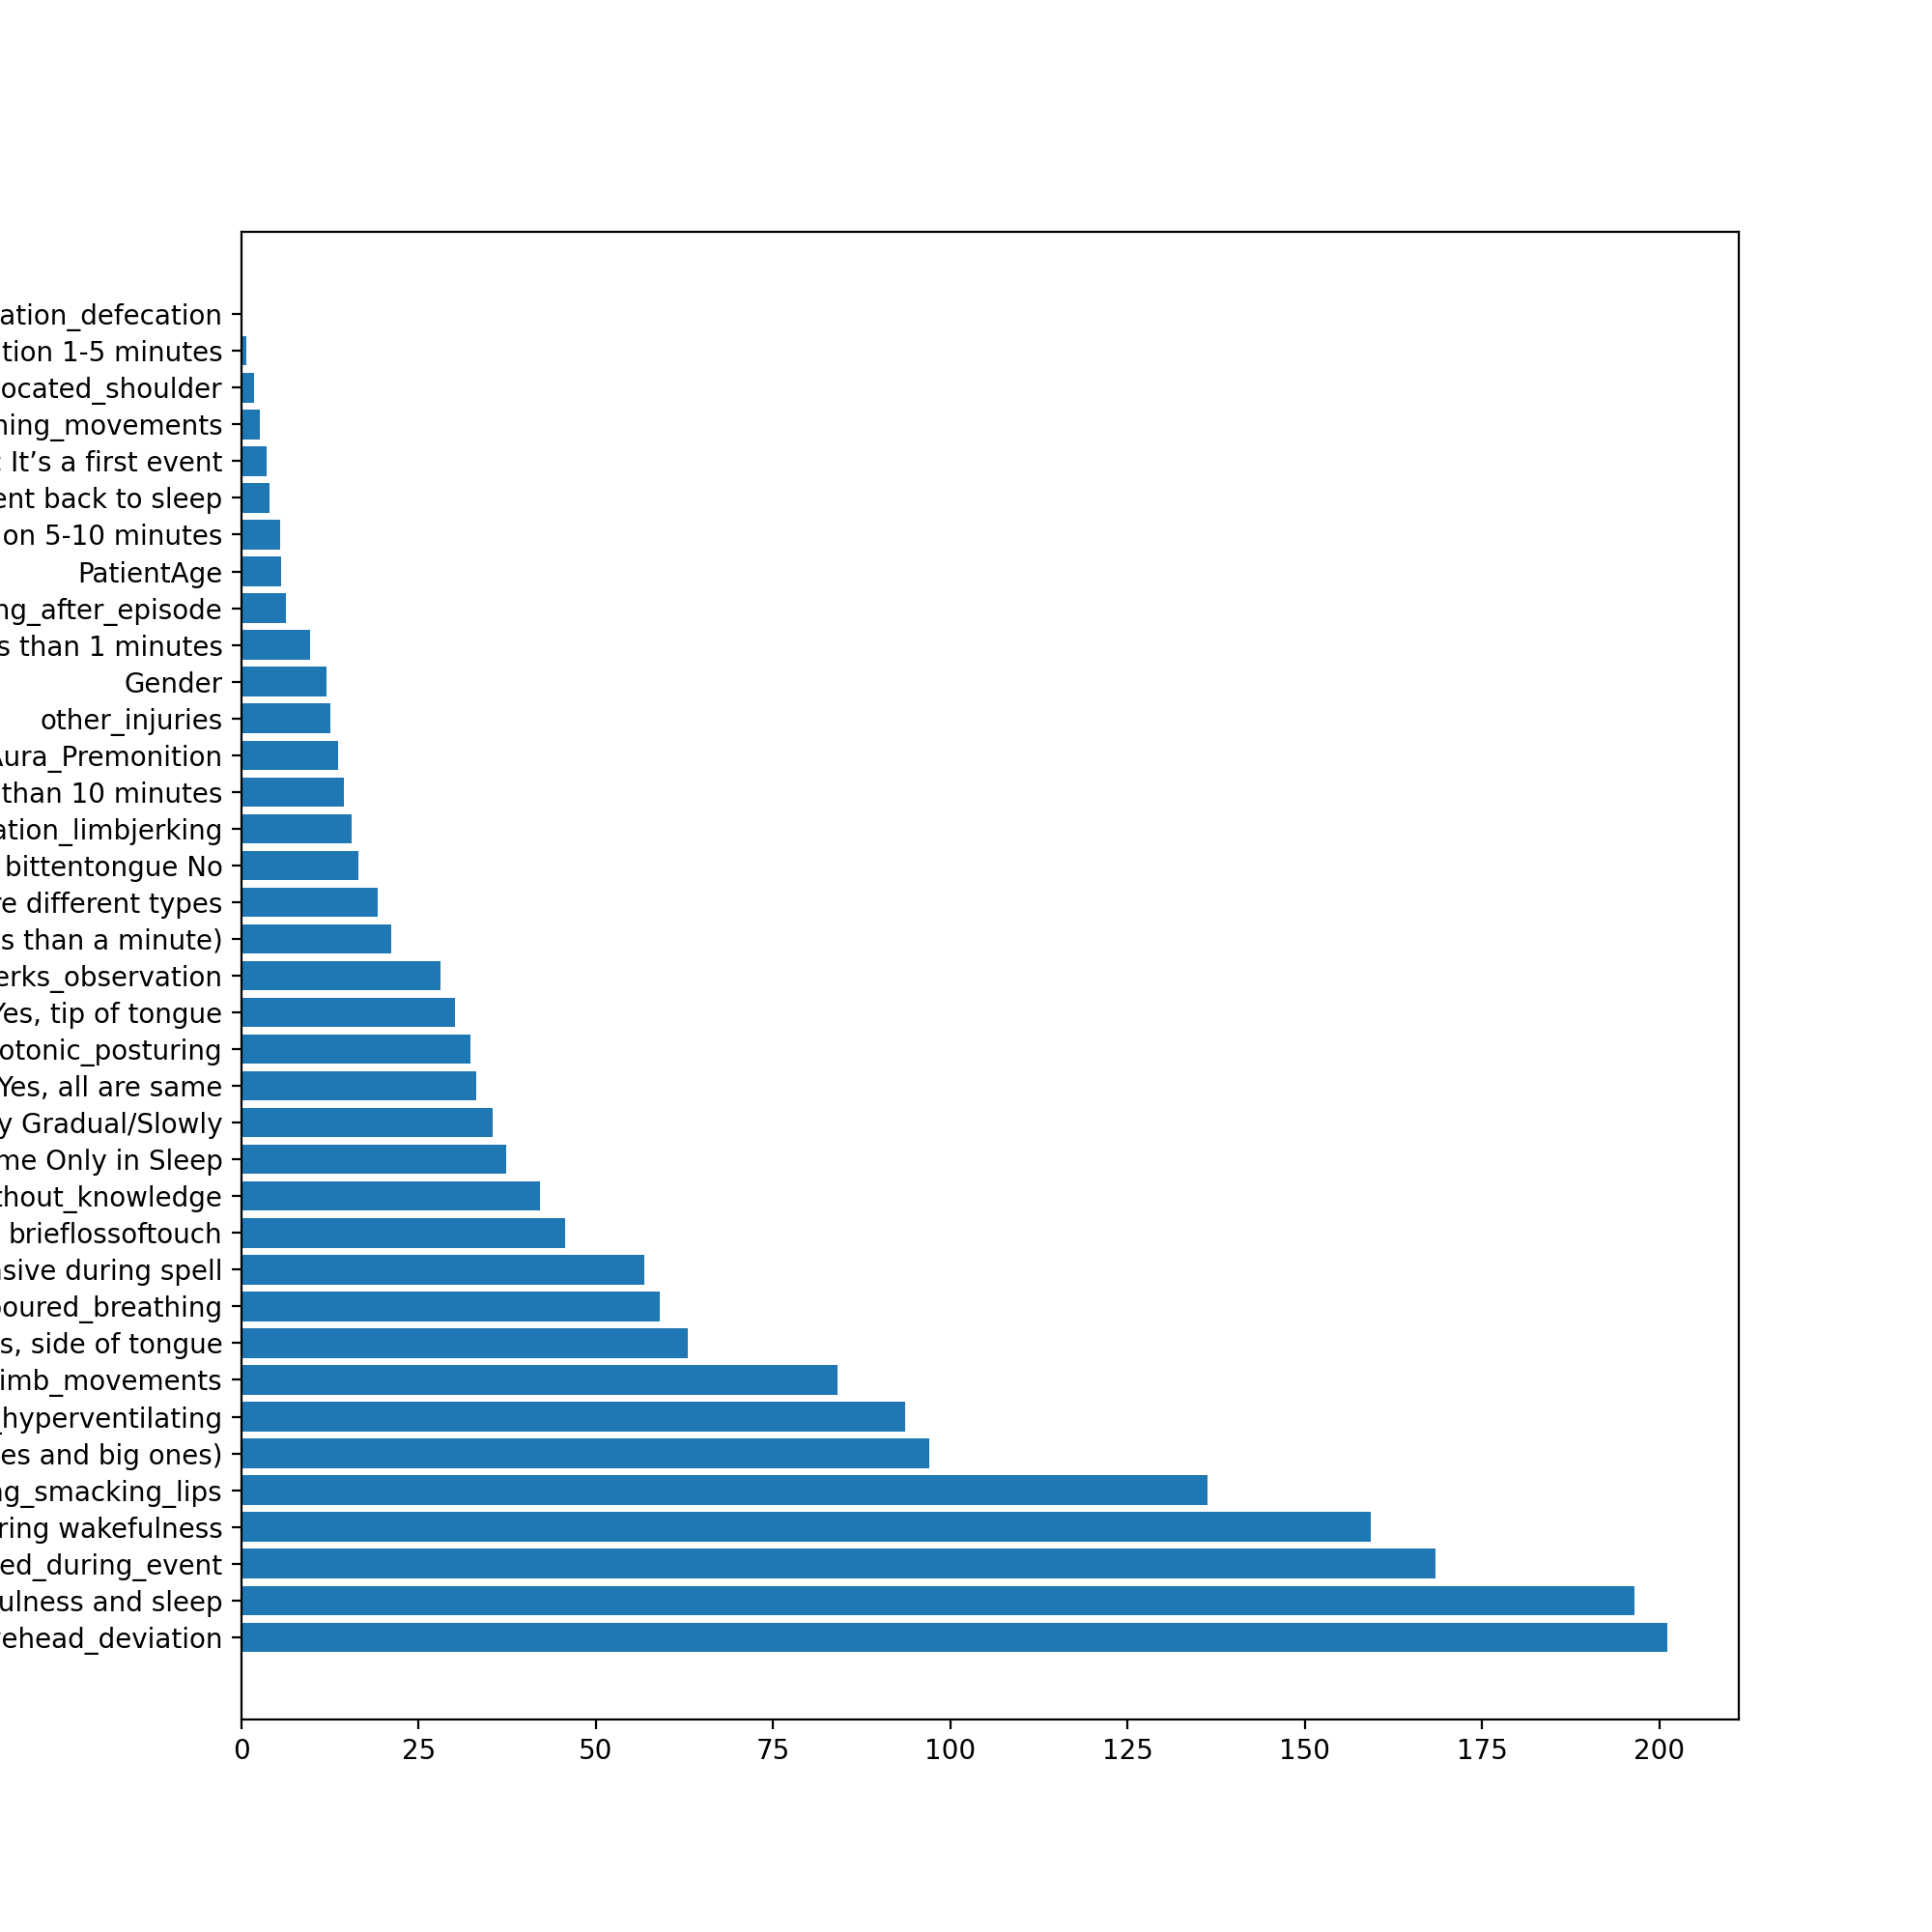

In [66]:
correlations['fscore'] = []

fs.fit(x_train_smote, y_train_smote)

for i in range(len(fs.scores_)):
	correlations['fscore'].append(fs.scores_[i])

feature = []
for f in x_train.keys():
  feature.append(f)

f_mp = pd.Series()

for i in range(len(feature)):
  f_mp[feature[i]] = fs.scores_[i]

f_mp = f_mp.sort_values(ascending = False)

sc = []
feature = []

for k in f_mp.keys():
  feature.append(k)
  sc.append(f_mp[k])

pyplot.barh([feature[i] for i in range(len(fs.scores_))], sc)
pyplot.rcParams['figure.figsize'] = [10, 10]
pyplot.show()

In [67]:
# correlation_df=[]
# correlation_df.append(pd.DataFrame(correlations['original']))
# correlation_df.append(pd.DataFrame(correlations['smote']))
# correlation_df.append(pd.DataFrame(correlations['fscore']))

len(compare_original_smote)

38

In [68]:
len(correlations['fscore'])

37

In [69]:
del compare_original_smote['Final_Diagnosis']
# correlations['smote'].drop('Final_Diagnosis', inplace = True)

len(compare_original_smote)

37

In [70]:
# after this snippet,
# 0 - f
# 1 - smote corr
# 2 - train corr

ind = 0

for k in compare_original_smote.keys():
  compare_original_smote[k].append(correlations['fscore'][ind])
  ind+=1

for array in compare_original_smote.values():
  array[0], array[2] = array[2], array[0]

sorted_value_index = np.argsort(compare_original_smote.values())
dictionary_keys = list(compare_original_smote.keys())
sorted_dict = {dictionary_keys[i]: sorted(
    compare_original_smote.values())[i] for i in range(len(dictionary_keys))}

print(sorted_dict)

{'PatientAge': [0.14285714285714285, 0.0, 0.09833869740305952], 'Gender': [0.627906976744186, 0.053148742285018064, 0.1400303199067439], 'eyes_closed_during_event': [1.8, 0.0, 0.0], 'weeping_before_during_after_episode': [2.5714285714285716, 0.03579454957458062, 0.0], 'patient_fall_suddenly_without_limb_movements': [3.6, 0.048905289595835635, 0.0], 'Was_patient_hyperventilating': [4.0, 0.044311044364221154, 0.0], 'loss_consciousness_after_urination_defecation': [5.487804878048781, 0.07989090520736825, 0.11793827857896193], 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing': [5.65267711053135, 0.03665995237728891, 0.010284166236475328], 'observation_limbjerking': [6.25, 0.08072316820291038, 0.2360149405233213], 'observe_postevent_stridulous_laboured_breathing': [9.618181818181819, 0.11578521830528146, 0.0], 'upper_limb_jerks_observation': [11.964630225080386, 0.18236765808043645, 0.11901567515472682], 'brieflossoftouch': [12.565217391304348, 0.12803785036191973, 0.0], '

In [71]:
sorted_pd = pd.DataFrame(sorted_dict)
sorted_pd

PatientAge    Gender  eyes_closed_during_event  \
0    0.142857  0.627907                       1.8   
1    0.000000  0.053149                       0.0   
2    0.098339  0.140030                       0.0   

   weeping_before_during_after_episode  \
0                             2.571429   
1                             0.035795   
2                             0.000000   

   patient_fall_suddenly_without_limb_movements  Was_patient_hyperventilating  \
0                                      3.600000                      4.000000   
1                                      0.048905                      0.044311   
2                                      0.000000                      0.000000   

   loss_consciousness_after_urination_defecation  \
0                                       5.487805   
1                                       0.079891   
2                                       0.117938   

   side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                           5.652677                   
1                                           0.036660                   
2                                           0.010284                   

   observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                 6.250000                                         9.618182   
1                 0.080723                                         0.115785   
2                 0.236015                                         0.000000   

   ...  events_occur_time Only in Sleep  \
0  ...                        59.000000   
1  ...                         0.309934   
2  ...                         0.182629   

   events_occur_time Both during wakefulness and sleep  \
0                                          63.000000     
1                                           0.321908     
2                                           0.191025     

   events_occur_time Only during wakefulness  \
0                                  84.027778   
1                                   0.404615   
2                                   0.368621   

   recovery Didn’t recover went back to sleep  \
0                                   93.633333   
1                                    0.417192   
2                                    0.446162   

   recovery Responsive during spell  recovery Gradual/Slowly  \
0                         97.039604               136.243243   
1                          0.416933                 0.519320   
2                          0.250347                 0.315704   

   recovery Abrupt/Sudden (less than a minute)  bittentongue No  \
0                                   159.292428       168.491228   
1                                     0.777669         0.632433   
2                                     0.556680         0.571286   

   bittentongue Yes, tip of tongue  bittentongue Yes, side of tongue  
0                       196.462963                        201.169014  
1                         0.673595                          0.679274  
2                         0.446040                          0.464699  

[3 rows x 37 columns]

In [72]:
less_f = []
for col in sorted_pd:
  if sorted_pd[col][0]<0.05:
    less_f.append(col)


In [73]:
intersection_f_cor = []
for ele in less_correlation:
  if ele in less_f:
    intersection_f_cor.append(ele)

In [74]:
sorted_pd.drop(intersection_f_cor, axis = 1, inplace = True)
sorted_pd

PatientAge    Gender  eyes_closed_during_event  \
0    0.142857  0.627907                       1.8   
1    0.000000  0.053149                       0.0   
2    0.098339  0.140030                       0.0   

   weeping_before_during_after_episode  \
0                             2.571429   
1                             0.035795   
2                             0.000000   

   patient_fall_suddenly_without_limb_movements  Was_patient_hyperventilating  \
0                                      3.600000                      4.000000   
1                                      0.048905                      0.044311   
2                                      0.000000                      0.000000   

   loss_consciousness_after_urination_defecation  \
0                                       5.487805   
1                                       0.079891   
2                                       0.117938   

   side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                           5.652677                   
1                                           0.036660                   
2                                           0.010284                   

   observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                 6.250000                                         9.618182   
1                 0.080723                                         0.115785   
2                 0.236015                                         0.000000   

   ...  events_occur_time Only in Sleep  \
0  ...                        59.000000   
1  ...                         0.309934   
2  ...                         0.182629   

   events_occur_time Both during wakefulness and sleep  \
0                                          63.000000     
1                                           0.321908     
2                                           0.191025     

   events_occur_time Only during wakefulness  \
0                                  84.027778   
1                                   0.404615   
2                                   0.368621   

   recovery Didn’t recover went back to sleep  \
0                                   93.633333   
1                                    0.417192   
2                                    0.446162   

   recovery Responsive during spell  recovery Gradual/Slowly  \
0                         97.039604               136.243243   
1                          0.416933                 0.519320   
2                          0.250347                 0.315704   

   recovery Abrupt/Sudden (less than a minute)  bittentongue No  \
0                                   159.292428       168.491228   
1                                     0.777669         0.632433   
2                                     0.556680         0.571286   

   bittentongue Yes, tip of tongue  bittentongue Yes, side of tongue  
0                       196.462963                        201.169014  
1                         0.673595                          0.679274  
2                         0.446040                          0.464699  

[3 rows x 37 columns]

In [75]:
print(less_f)
print(less_correlation)
print(intersection_f_cor)

[]
['PatientAge', 'loss_consciousness_after_urination_defecation', 'violent_thrashing_movements', 'dislocated_shoulder', 'Stereotypic It’s a first event', 'recovery Didn’t recover went back to sleep']
[]


In [76]:
sorted_pd

PatientAge    Gender  eyes_closed_during_event  \
0    0.142857  0.627907                       1.8   
1    0.000000  0.053149                       0.0   
2    0.098339  0.140030                       0.0   

   weeping_before_during_after_episode  \
0                             2.571429   
1                             0.035795   
2                             0.000000   

   patient_fall_suddenly_without_limb_movements  Was_patient_hyperventilating  \
0                                      3.600000                      4.000000   
1                                      0.048905                      0.044311   
2                                      0.000000                      0.000000   

   loss_consciousness_after_urination_defecation  \
0                                       5.487805   
1                                       0.079891   
2                                       0.117938   

   side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing  \
0                                           5.652677                   
1                                           0.036660                   
2                                           0.010284                   

   observation_limbjerking  observe_postevent_stridulous_laboured_breathing  \
0                 6.250000                                         9.618182   
1                 0.080723                                         0.115785   
2                 0.236015                                         0.000000   

   ...  events_occur_time Only in Sleep  \
0  ...                        59.000000   
1  ...                         0.309934   
2  ...                         0.182629   

   events_occur_time Both during wakefulness and sleep  \
0                                          63.000000     
1                                           0.321908     
2                                           0.191025     

   events_occur_time Only during wakefulness  \
0                                  84.027778   
1                                   0.404615   
2                                   0.368621   

   recovery Didn’t recover went back to sleep  \
0                                   93.633333   
1                                    0.417192   
2                                    0.446162   

   recovery Responsive during spell  recovery Gradual/Slowly  \
0                         97.039604               136.243243   
1                          0.416933                 0.519320   
2                          0.250347                 0.315704   

   recovery Abrupt/Sudden (less than a minute)  bittentongue No  \
0                                   159.292428       168.491228   
1                                     0.777669         0.632433   
2                                     0.556680         0.571286   

   bittentongue Yes, tip of tongue  bittentongue Yes, side of tongue  
0                       196.462963                        201.169014  
1                         0.673595                          0.679274  
2                         0.446040                          0.464699  

[3 rows x 37 columns]

In [77]:
x_train.drop(intersection_f_cor, axis=1,inplace=True)
x_test.drop(intersection_f_cor, axis=1,inplace=True)
x_train_smote.drop(intersection_f_cor, axis=1,inplace=True)

In [78]:
x_test = x_test.replace('Yes', 1)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


accuracy_df = pd.DataFrame(columns=['Model','Before Smote','K fold before smote','confusion matrix before','Sensitivity before smote','Specificity before smote','After Smote','K fold after smote','Sensitivity after smote','Specificity after smote','confusion matrix after'])
dict_classifiers = {'Random Forest': RandomForestClassifier(),
                    'Logistic Regression': LogisticRegression(),
                    'SVC': SVC(),
                    'Decision Tree': DecisionTreeClassifier(),
                    'KNN': KNeighborsClassifier()
                    }
for clf_name, clf in dict_classifiers.items():
  #for validation
  cv = KFold(n_splits=10, random_state=42, shuffle=True)

  #before smote
  clf.fit(x_train, y_train)
  prediction1 = clf.predict(x_test)
  score1=accuracy_score(prediction1, y_test)
  fold_score1 = cross_val_score(clf, x_train, y_train, cv=cv)

  #confusion matrix
  cm1 = metrics.confusion_matrix(y_test, prediction1)
  cm_df1 = pd.DataFrame(cm1,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

  TP = cm1[1][1]
  TN = cm1[0][0]
  FP = cm1[0][1]
  FN = cm1[1][0]
  conf_sensitivity1 = (TP / float(TP + FN))
  conf_specificity1 = (TN / float(TN + FP))


  #after smote
  clf.fit(x_train_smote, y_train_smote)
  prediction2 = clf.predict(x_test)
  score2=accuracy_score(prediction2, y_test)
  fold_score2 = cross_val_score(clf, x_train_smote, y_train_smote, cv=cv)
  cm2 = metrics.confusion_matrix(y_test, prediction2)
  cm_df2 = pd.DataFrame(cm2,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

  TP = cm2[1][1]
  TN = cm2[0][0]
  FP = cm2[0][1]
  FN = cm2[1][0]

  conf_sensitivity2 = (TP / float(TP + FN))
  conf_specificity2 = (TN / float(TN + FP))

  # print(clf_name)
  # print("Before smote ",fold_score1,'\n',fold_score1.mean())
  # print("After smote ",fold_score2,'\n',fold_score2.mean(),'\n')

  new_row={
      'Model':clf_name,
       'Before Smote':score1,
       'K fold before smote':fold_score1.mean(),
       'confusion matrix before':cm_df1,
       'Sensitivity before smote':conf_sensitivity1,
       'Specificity before smote': conf_specificity1,
       'After Smote':score2 ,
       'K fold after smote': fold_score2.mean(),
       'Sensitivity after smote':conf_sensitivity2,
       'Specificity after smote': conf_specificity2,
       'confusion matrix after':cm_df2
  }
  accuracy_df=accuracy_df.append(new_row, ignore_index=True)

  # accuracy_dict[clf_name].append(score1)
  #print(clf_name,score1)
  # score2=accuracy_score(prediction2, y_test)
  # accuracy_dict[clf_name].append(score2)
  #print(clf_name,score2)


accuracy_df

Model  Before Smote  K fold before smote  \
0        Random Forest      0.969697             0.956603   
1  Logistic Regression      0.979798             0.954231   
2                  SVC      0.787879             0.817308   
3        Decision Tree      0.949495             0.908846   
4                  KNN      0.949495             0.903590   

                             confusion matrix before  \
0                   Predicted Negative  Predicted...   
1                   Predicted Negative  Predicted...   
2                   Predicted Negative  Predicted...   
3                   Predicted Negative  Predicted...   
4                   Predicted Negative  Predicted...   

   Sensitivity before smote  Specificity before smote  After Smote  \
0                  0.987179                  0.904762     0.969697   
1                  0.987179                  0.952381     0.969697   
2                  1.000000                  0.000000     0.878788   
3                  0.961538                  0.904762     0.929293   
4                  1.000000                  0.761905     0.909091   

   K fold after smote  Sensitivity after smote  Specificity after smote  \
0            0.973654                 0.974359                 0.952381   
1            0.975168                 0.961538                 1.000000   
2            0.912885                 0.884615                 0.857143   
3            0.965865                 0.935897                 0.904762   
4            0.920841                 0.935897                 0.809524   

                              confusion matrix after  
0                   Predicted Negative  Predicted...  
1                   Predicted Negative  Predicted...  
2                   Predicted Negative  Predicted...  
3                   Predicted Negative  Predicted...  
4                   Predicted Negative  Predicted...

In [80]:
accuracy_df.to_excel("/content/Results.xlsx")

Calculating Confidence Score on x_test and training data used x_train and y_train

In [81]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def calculate_k_fold_score_and_confidence(clf, x_train, y_train, x_test):
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    fold_scores = cross_val_score(clf, x_train, y_train, cv=cv)

    clf.fit(x, y)

    if hasattr(clf, 'predict_proba'):
        confidence_scores = clf.predict_proba(x_test)
        max_confidence_scores = confidence_scores.max(axis=1)
    elif hasattr(clf, 'decision_function'):
        decision_scores = clf.decision_function(x_test)
        max_confidence_scores = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    else:
        raise ValueError("Classifier does not support either predict_proba or decision_function.")

    return fold_scores, max_confidence_scores

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Data', 'K-Fold Value', 'Confidence Score'])

for clf_name, clf in dict_classifiers.items():
    # Calculate k-fold scores and confidence scores for testing data
    fold_scores, max_confidence_scores = calculate_k_fold_score_and_confidence(clf, x_train, y_train, x_test)

    # Add results to the DataFrame
    for fold_num, (k_fold_score, max_confidence_score) in enumerate(zip(fold_scores, max_confidence_scores), start=1):
        result_row = {
            'Model': clf_name,
            'Data': 'Test',
            'K-Fold Value': k_fold_score,
            'Confidence Score': max_confidence_score
        }
        results_df = results_df.append(result_row, ignore_index=True)

# Display the combined results
print(results_df)
# Calculate the average values for each model
average_results = results_df.groupby('Model').mean().reset_index()

# Calculate the average Confidence Score for each model
average_confidence_scores = results_df.groupby('Model')['Confidence Score'].mean().reset_index()

# Merge the two DataFrames to include the average Confidence Score
average_results = pd.merge(average_results, average_confidence_scores, on='Model')

# Display the average results
print(average_results)



                  Model  Data  K-Fold Value  Confidence Score
0         Random Forest  Test      1.000000          0.670000
1         Random Forest  Test      0.925000          0.960000
2         Random Forest  Test      1.000000          0.970000
3         Random Forest  Test      1.000000          0.940000
4         Random Forest  Test      0.974359          0.890000
5         Random Forest  Test      0.897436          1.000000
6         Random Forest  Test      0.923077          0.620000
7         Random Forest  Test      0.948718          0.970000
8         Random Forest  Test      0.923077          1.000000
9         Random Forest  Test      0.948718          1.000000
10  Logistic Regression  Test      1.000000          0.681896
11  Logistic Regression  Test      0.925000          0.963300
12  Logistic Regression  Test      1.000000          0.974658
13  Logistic Regression  Test      0.925000          0.980509
14  Logistic Regression  Test      0.948718          0.860383
15  Logi

In [82]:
results_df

Model  Data  K-Fold Value  Confidence Score
0         Random Forest  Test      1.000000          0.670000
1         Random Forest  Test      0.925000          0.960000
2         Random Forest  Test      1.000000          0.970000
3         Random Forest  Test      1.000000          0.940000
4         Random Forest  Test      0.974359          0.890000
5         Random Forest  Test      0.897436          1.000000
6         Random Forest  Test      0.923077          0.620000
7         Random Forest  Test      0.948718          0.970000
8         Random Forest  Test      0.923077          1.000000
9         Random Forest  Test      0.948718          1.000000
10  Logistic Regression  Test      1.000000          0.681896
11  Logistic Regression  Test      0.925000          0.963300
12  Logistic Regression  Test      1.000000          0.974658
13  Logistic Regression  Test      0.925000          0.980509
14  Logistic Regression  Test      0.948718          0.860383
15  Logistic Regression  Test      0.897436          0.998650
16  Logistic Regression  Test      0.897436          0.730916
17  Logistic Regression  Test      1.000000          0.926769
18  Logistic Regression  Test      0.948718          0.990956
19  Logistic Regression  Test      1.000000          0.993513
20                  SVC  Test      0.875000          0.635241
21                  SVC  Test      0.725000          0.676571
22                  SVC  Test      0.800000          0.710587
23                  SVC  Test      0.850000          0.741254
24                  SVC  Test      0.846154          0.629403
25                  SVC  Test      0.820513          0.804566
26                  SVC  Test      0.692308          0.434848
27                  SVC  Test      0.897436          0.705922
28                  SVC  Test      0.820513          0.785163
29                  SVC  Test      0.846154          0.825999
30        Decision Tree  Test      0.925000          1.000000
31        Decision Tree  Test      0.825000          1.000000
32        Decision Tree  Test      0.925000          1.000000
33        Decision Tree  Test      0.950000          1.000000
34        Decision Tree  Test      0.974359          1.000000
35        Decision Tree  Test      0.923077          1.000000
36        Decision Tree  Test      0.923077          1.000000
37        Decision Tree  Test      0.923077          1.000000
38        Decision Tree  Test      0.871795          1.000000
39        Decision Tree  Test      0.897436          1.000000
40                  KNN  Test      0.950000          1.000000
41                  KNN  Test      0.825000          0.800000
42                  KNN  Test      0.875000          0.800000
43                  KNN  Test      0.950000          1.000000
44                  KNN  Test      0.948718          0.800000
45                  KNN  Test      0.871795          1.000000
46                  KNN  Test      0.923077          0.600000
47                  KNN  Test      0.923077          1.000000
48                  KNN  Test      0.897436          1.000000
49                  KNN  Test      0.871795          1.000000

In [83]:
average_results

Model  K-Fold Value  Confidence Score_x  Confidence Score_y
0        Decision Tree      0.913782            1.000000            1.000000
1                  KNN      0.903590            0.900000            0.900000
2  Logistic Regression      0.954231            0.910155            0.910155
3        Random Forest      0.954038            0.902000            0.902000
4                  SVC      0.817308            0.694955            0.694955

In [90]:
#mapping xtraining data
import string

numeric_col=['PatientAge']

numeric_mappings = {}
columns = list(x)

#print(columns)
for c in numeric_col:
  if c in columns:
    columns.remove(c)

for col in columns:
  rowval=set()
  for j in x[col]:
    rowval.add(j)

  enumval=[k for k in range(len(rowval))]
  x[col].replace(list(rowval),enumval,inplace =True)
  ind = 0
  for rowvals in rowval:
    numeric_mappings[rowvals] = enumval[ind]
    ind+=1



In [92]:
#numeric mapping y column
# mapping to numerical value
numeric_mappings = {}

for col in y:
  rowval=set()
  for j in y:
    rowval.add(j)

  enumval=[k for k in range(len(rowval))]
  ind = 0
  for rowvals in rowval:
    numeric_mappings[rowvals] = enumval[ind]
    ind+=1
  y = [numeric_mappings[v] for v in y]

Calculating Confidence Score on new test data and training data used x_train and y_train

In [84]:
print(x_train.columns)

Index(['PatientAge', 'Gender', 'eyes_closed_during_event',
       'weeping_before_during_after_episode',
       'patient_fall_suddenly_without_limb_movements',
       'Was_patient_hyperventilating',
       'loss_consciousness_after_urination_defecation',
       'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing',
       'observation_limbjerking',
       'observe_postevent_stridulous_laboured_breathing',
       'upper_limb_jerks_observation', 'brieflossoftouch',
       'fixed_Aura_Premonition', 'staring_blankly_chewing_smacking_lips',
       'posturing_limbeyehead_deviation', 'violent_thrashing_movements',
       'urine_without_knowledge', 'dislocated_shoulder', 'other_injuries',
       'EventDuration 1-5 minutes', 'EventDuration Less than 1 minutes',
       'EventDuration 5-10 minutes', 'EventDuration More than 10 minutes',
       'Stereotypic No, they are different types',
       'Stereotypic Yes, all are same',
       'Stereotypic Two different types (small ones and b

In [96]:
# before smote
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

testing_data = pd.read_excel("/content/Copy of Testing_data(2).xlsx")
testing_data.drop(testing_data .columns[0], axis=1, inplace=True)
testing_data.rename(columns={'side-to-side_head_nodding_pelvic_thrusting_Opisthotonic_posturing': 'side_to_side_head_nodding_pelvic_thrusting_Opisthotonic_posturing'}, inplace=True)
# Get the column order from x_train
column_order = x.columns.tolist()

# Reorder the columns in testing_data to match the order in x_train
testing_data = testing_data[column_order]


def calculate_k_fold_score_and_confidence(clf, x, y, testing_data):
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    fold_scores = cross_val_score(clf, x, y, cv=cv)

    clf.fit(x, y)

    if hasattr(clf, 'predict_proba'):
        confidence_scores = clf.predict_proba(testing_data)
        max_confidence_scores = confidence_scores.max(axis=1)
    elif hasattr(clf, 'decision_function'):
        decision_scores = clf.decision_function(testing_data)
        max_confidence_scores = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    else:
        raise ValueError("Classifier does not support either predict_proba or decision_function.")

    return fold_scores, max_confidence_scores

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Data', 'K-Fold Value', 'Confidence Score'])

for clf_name, clf in dict_classifiers.items():
    # Calculate k-fold scores and confidence scores for testing data
    fold_scores, max_confidence_scores = calculate_k_fold_score_and_confidence(clf, x, y, testing_data)

    # Add results to the DataFrame
    for fold_num, (k_fold_score, max_confidence_score) in enumerate(zip(fold_scores, max_confidence_scores), start=1):
        result_row = {
            'Model': clf_name,
            'Data': 'Test',
            'K-Fold Value': k_fold_score,
            'Confidence Score': max_confidence_score
        }
        results_df = results_df.append(result_row, ignore_index=True)

# Display the combined results
print(results_df)
# Calculate the average values for each model
average_results = results_df.groupby('Model').mean().reset_index()

# Calculate the average Confidence Score for each model
average_confidence_scores = results_df.groupby('Model')['Confidence Score'].mean().reset_index()

# Merge the two DataFrames to include the average Confidence Score
average_results = pd.merge(average_results, average_confidence_scores, on='Model')

# Display the average results
print(average_results)



                  Model  Data  K-Fold Value  Confidence Score
0         Random Forest  Test      0.960000          0.700000
1         Random Forest  Test      0.980000          0.590000
2         Random Forest  Test      0.980000          0.690000
3         Random Forest  Test      0.938776          0.560000
4         Random Forest  Test      0.979592          0.680000
5         Random Forest  Test      0.918367          0.510000
6         Random Forest  Test      0.959184          0.750000
7         Random Forest  Test      0.979592          0.560000
8         Random Forest  Test      0.979592          0.630000
9         Random Forest  Test      0.979592          0.510000
10  Logistic Regression  Test      0.980000          0.975998
11  Logistic Regression  Test      0.980000          0.689661
12  Logistic Regression  Test      0.980000          0.903965
13  Logistic Regression  Test      0.959184          0.892023
14  Logistic Regression  Test      0.979592          0.978874
15  Logi